# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Mohamad Fikri Aulya Nor
- Email: mohfikri.aulyanor@gmail.com
- Id Dicoding: nairkivm

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.constants import Constants
from utils.utils import DataUtils
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error
import joblib
import xgboost as xgb
from xgboost import XGBClassifier

### Menyiapkan data yang akan diguankan

In [2]:
# Initialize the constants
c = Constants()

# Extract all data into dictionary of pandas DataFrames
data = {}
for source_ in c.source.keys():
    data[source_] = pd.read_csv(c.source[source_], delimiter=';')
    print(f"Loaded '{source_}' data")

Loaded 'data' data


In [3]:
# Preview the data
data['data'].head()

Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1                      1   
2                         122.0            1                     37   
3                         122.0            1                     38   
4                         100.0            1                     37   

   Fathers_qualification  ...  Curricular_units_2nd_sem_credited  \
0                     12  ...                                  0   
1                      3  ...                                  0   
2                     37  ...                                  0   
3                     37  ...                                  0   
4                     38  ...                                  0   

   Curricular_units_2nd_sem_enrolled  Curricular_units_2nd_sem_evaluations  \
0                                  0                                     0   
1                                  6                                     6   
2                                  6                                     0   
3                                  6                                    10   
4                                  6                                     6   

   Curricular_units_2nd_sem_approved  Curricular_units_2nd_sem_grade  \
0                                  0                        0.000000   
1                                  6                       13.666667   
2                                  0                        0.000000   
3                                  5                       12.400000   
4                                  6                       13.000000   

   Curricular_units_2nd_sem_without_evaluations  Unemployment_rate  \
0                                             0               10.8   
1                                             0               13.9   
2                                             0               10.8   
3                                             0                9.4   
4                                             0               13.9   

   Inflation_rate   GDP    Status  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

## Data Understanding

Data Assessment for 'data':
 > Data shape:  (4424, 37)
 > No column should be dropped v
 > All requirements columns are exists v
 > All column types match the requirements v
 > There is no missing value columns v
 > There is no duplicated data v


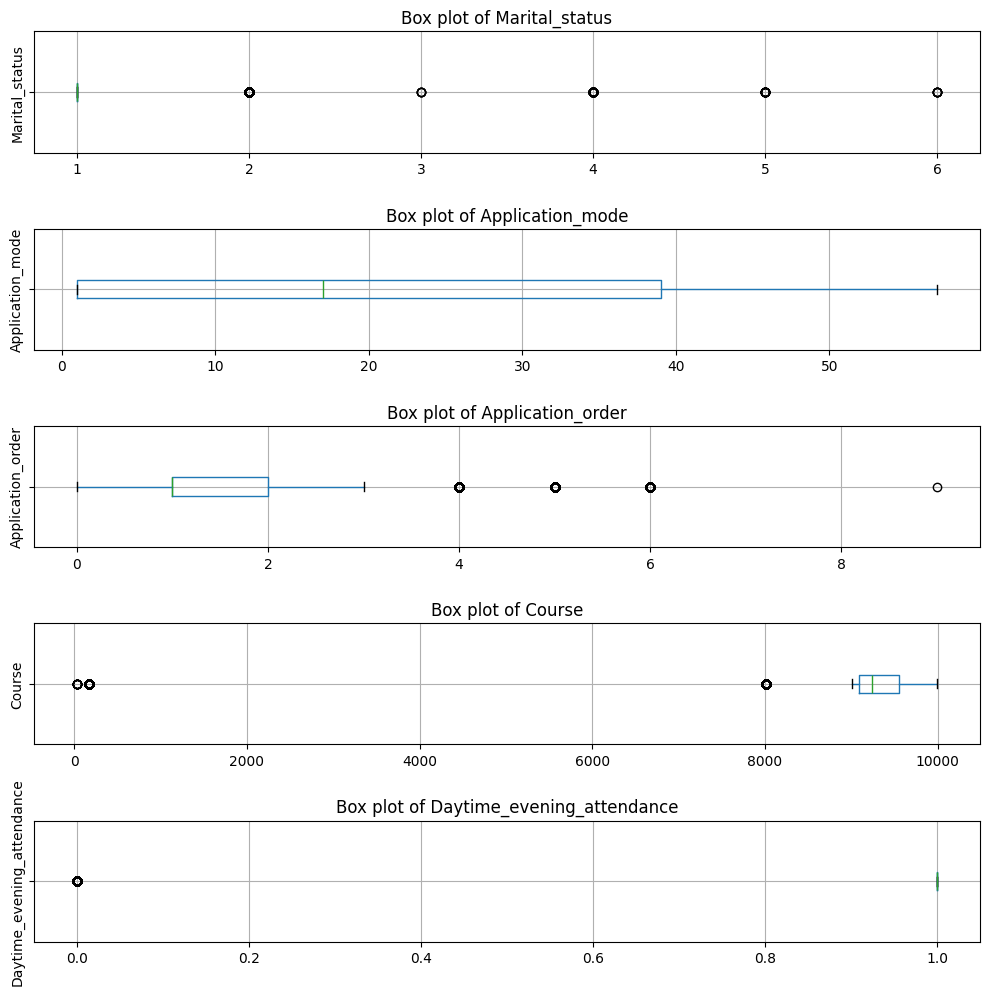

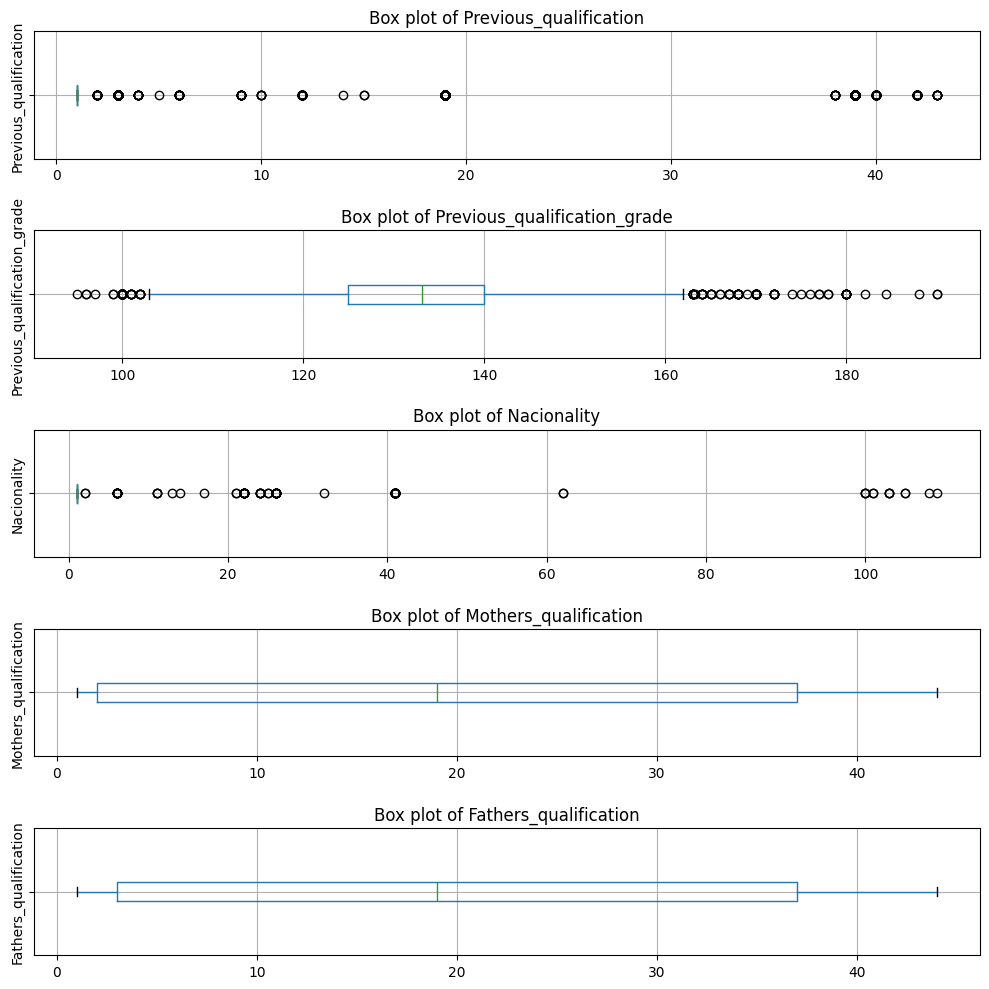

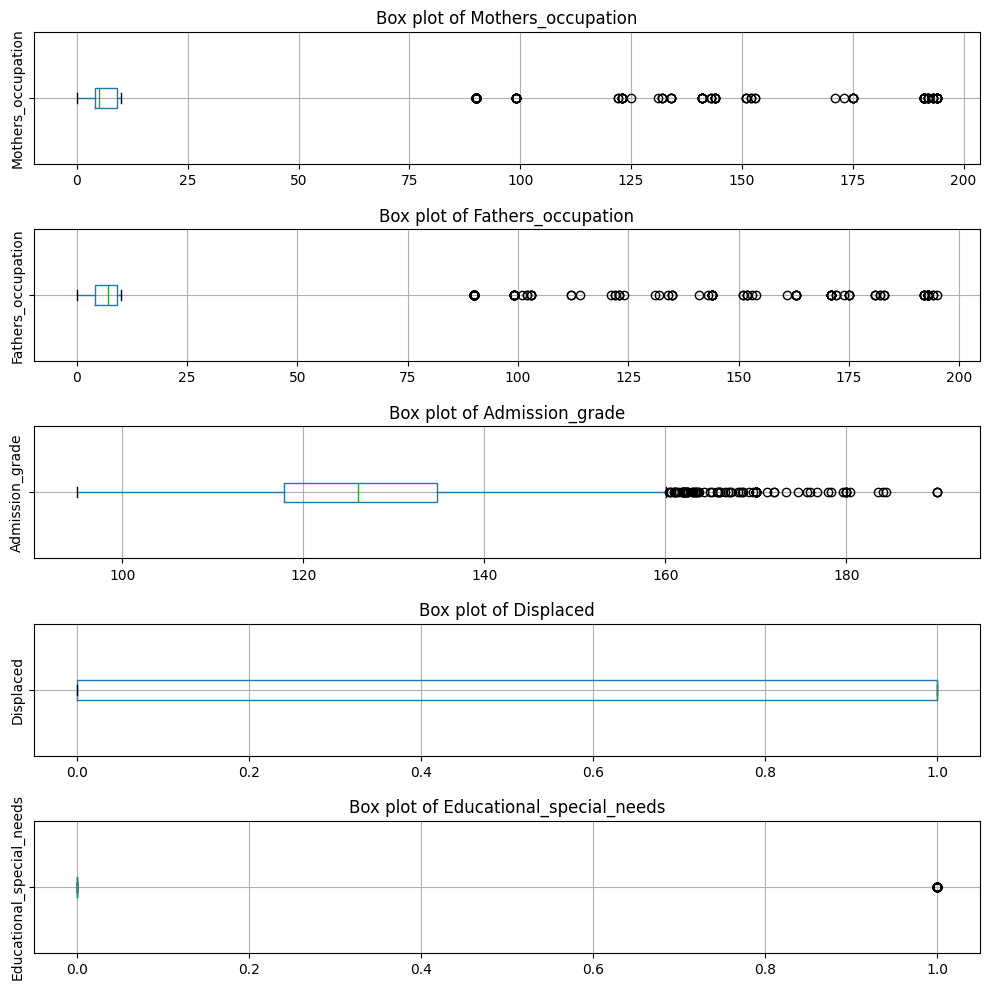

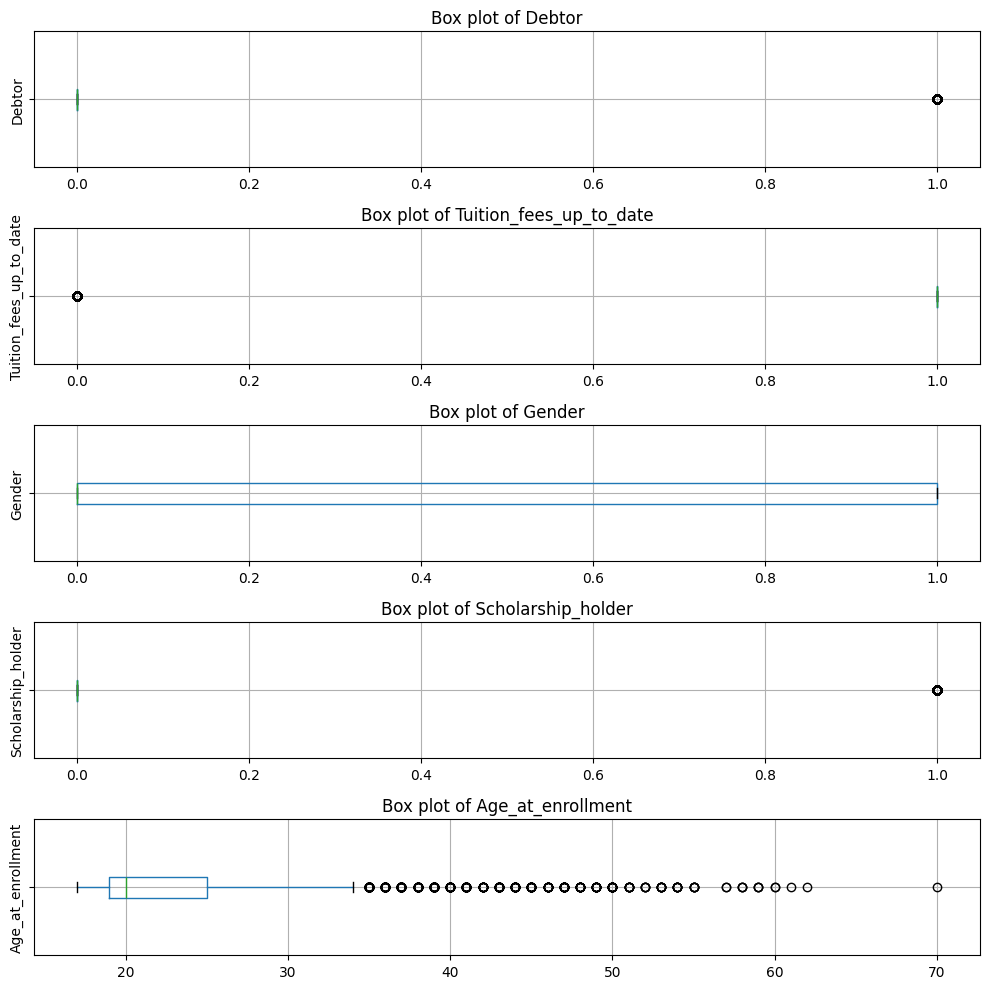

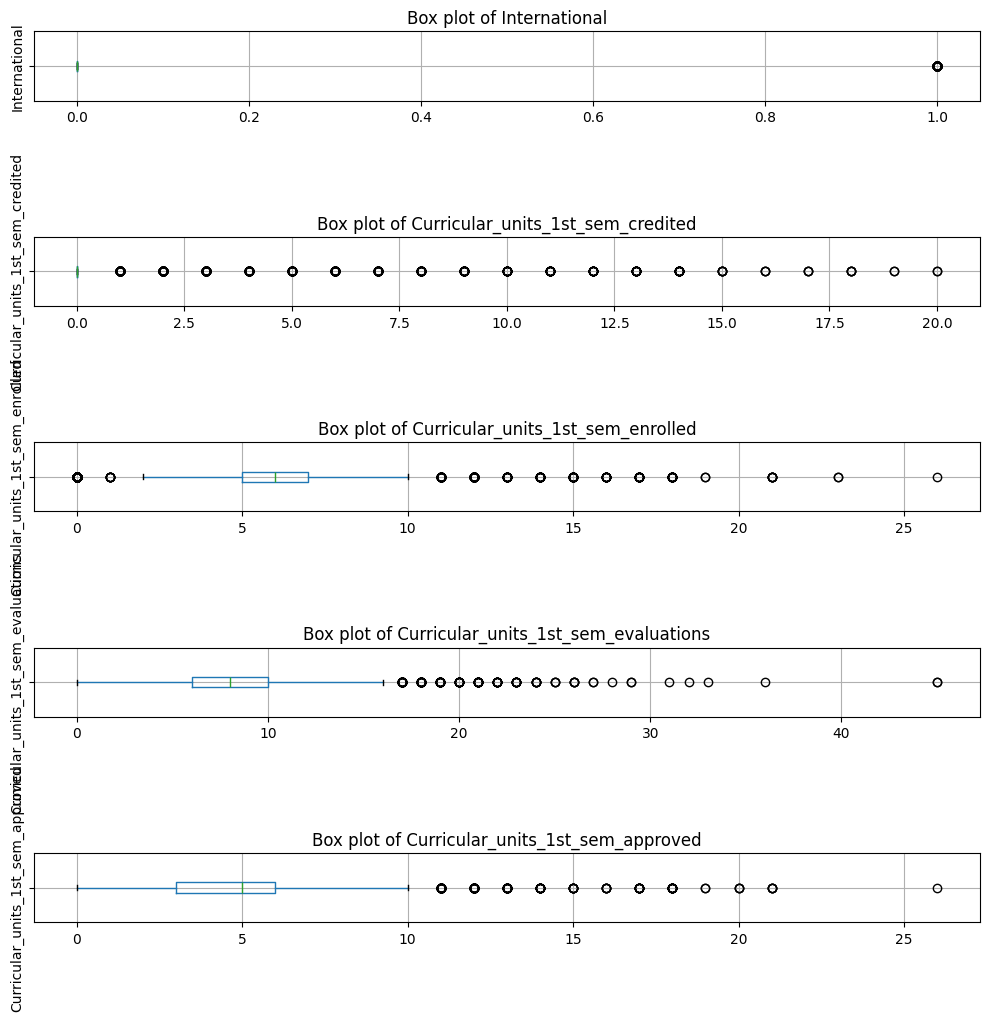

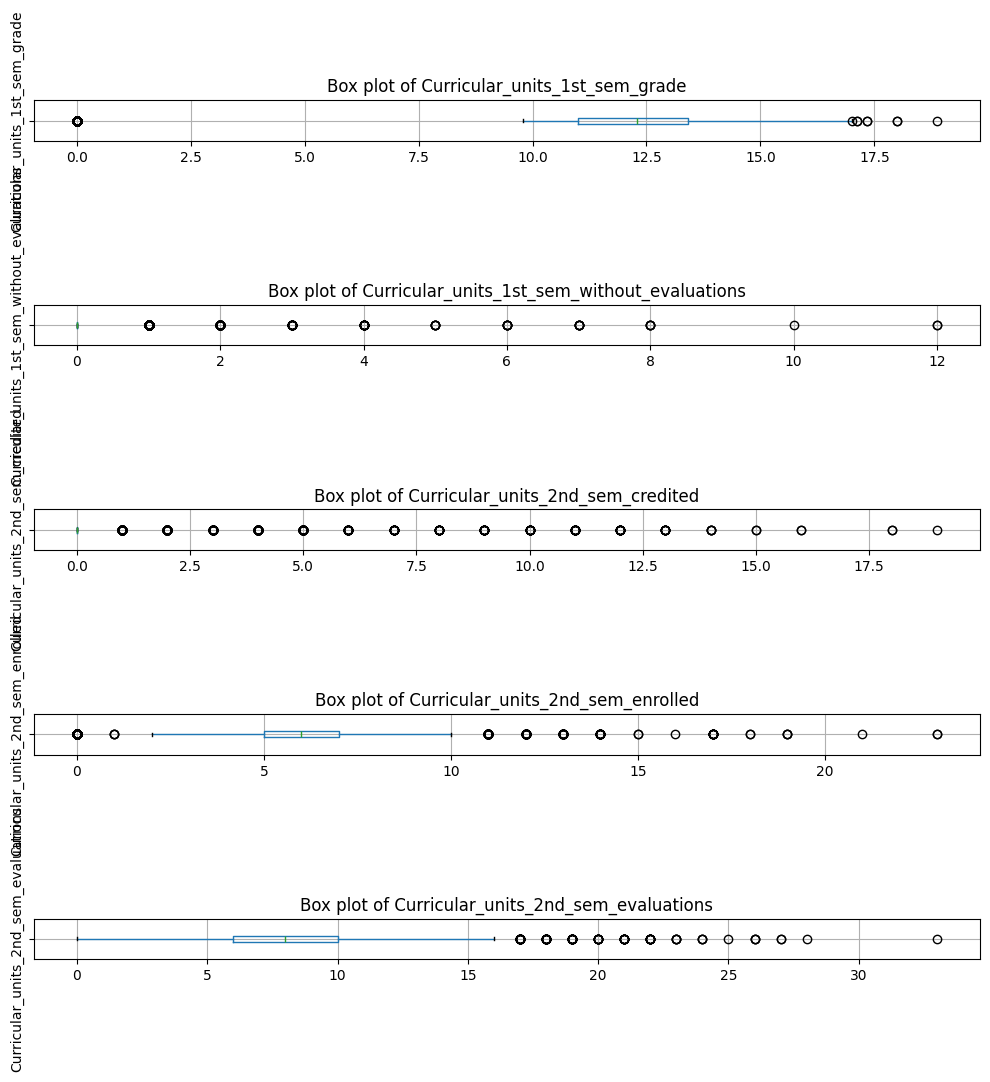

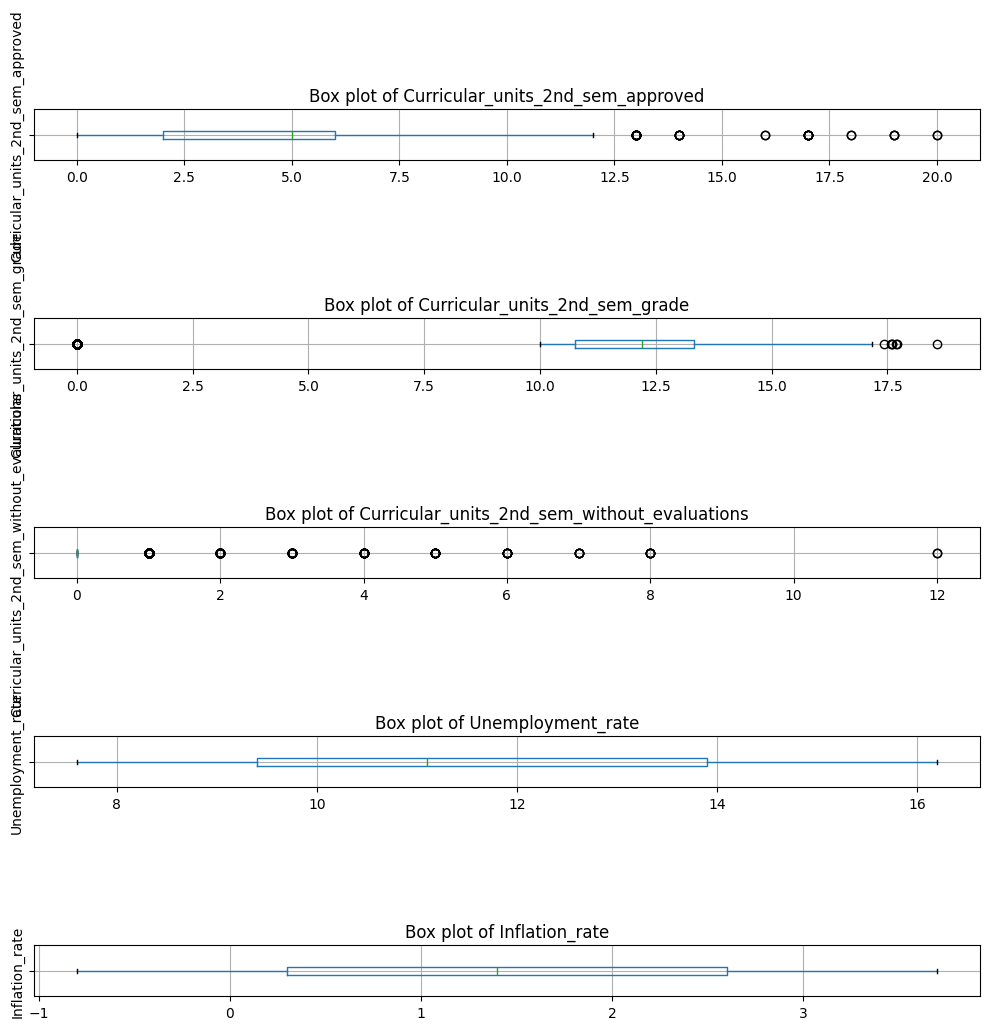

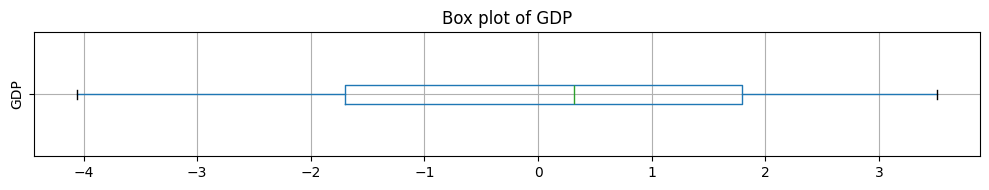

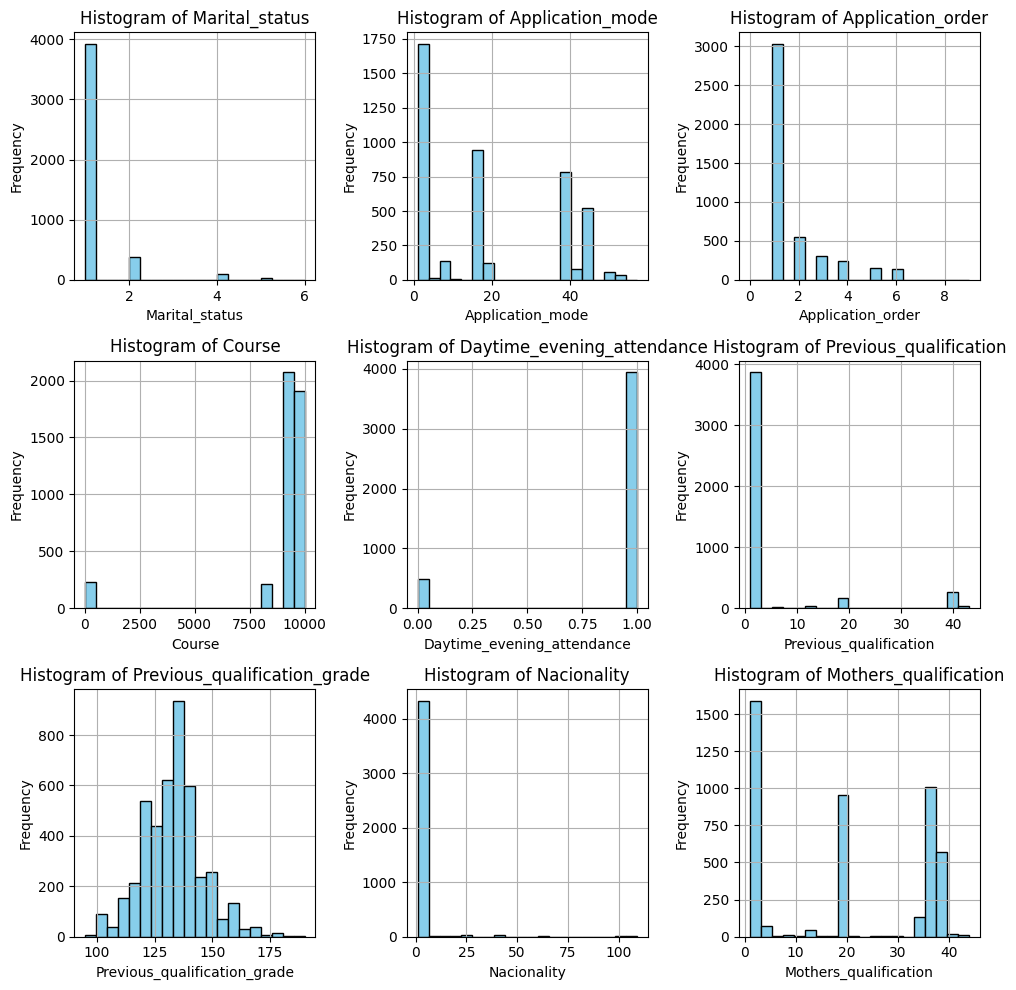

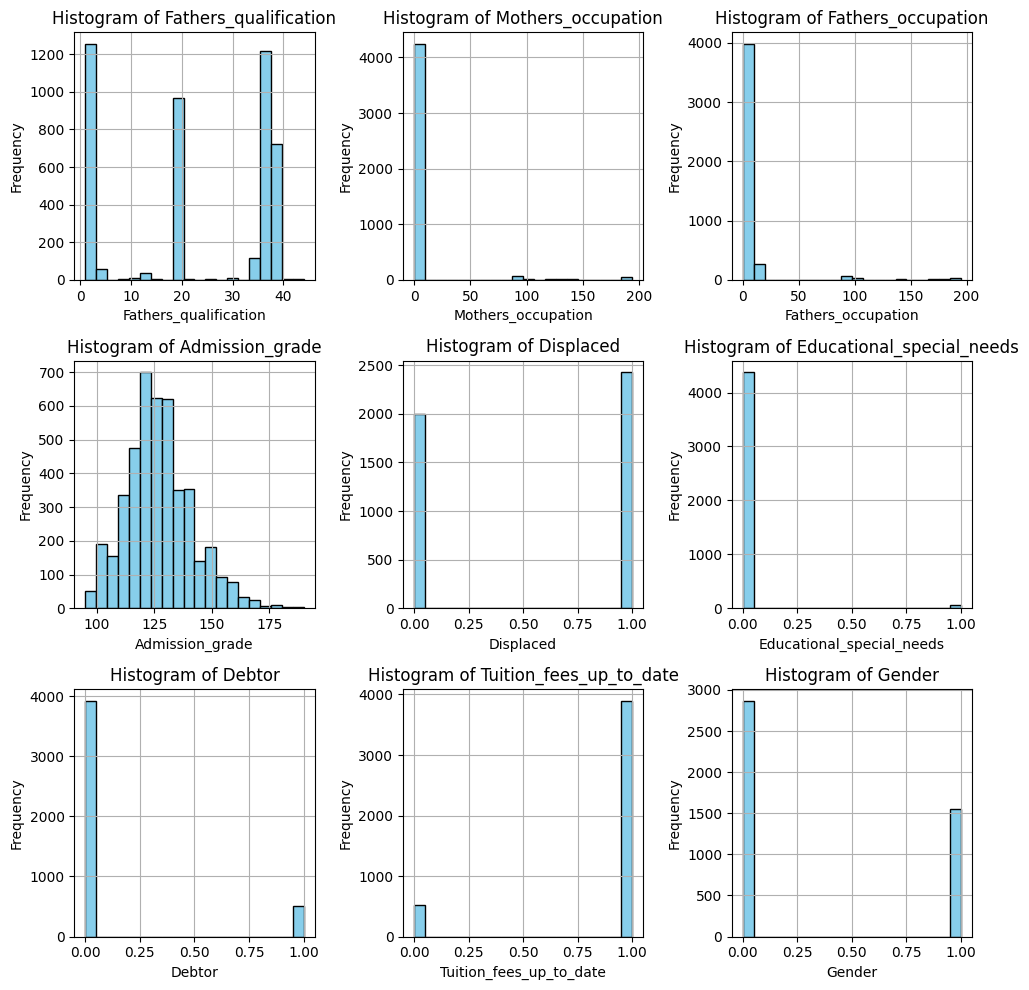

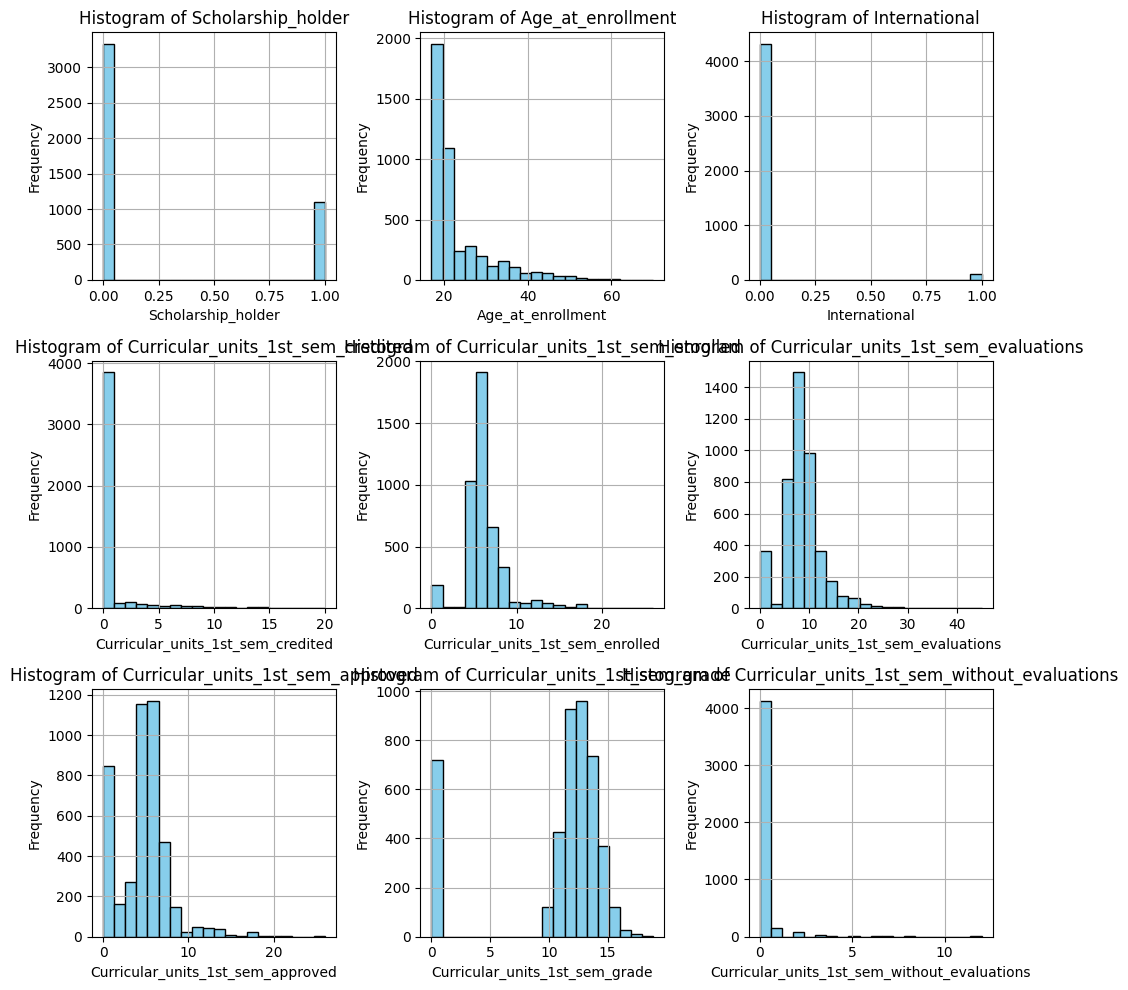

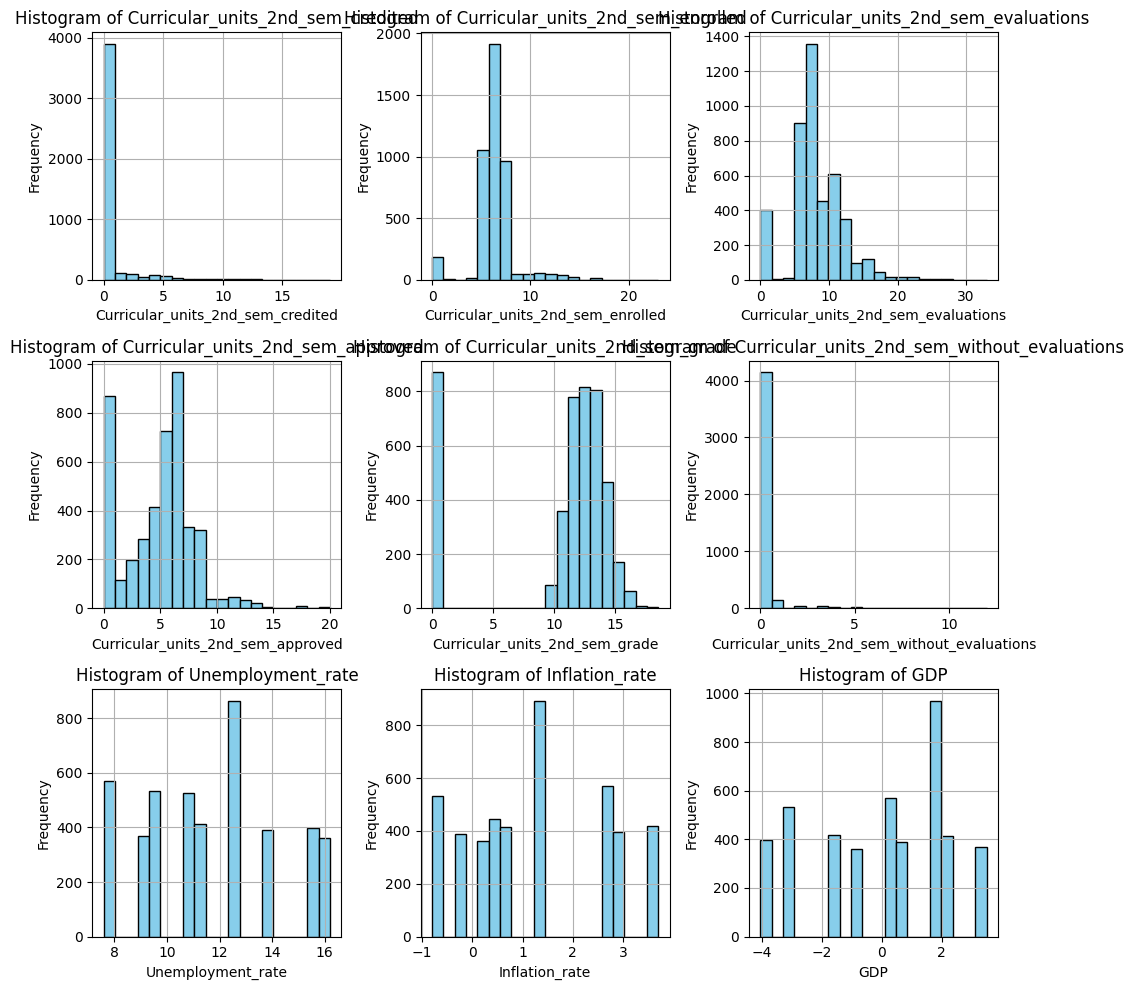

In [4]:
# Initialize DataUtils
u = DataUtils()

# Assess the data using asses_data
u.asses_data(data['data'], 'data')

In [5]:
# Viewing summary of numerical data
data['data'].describe().T

count         mean  \
Marital_status                                4424.0     1.178571   
Application_mode                              4424.0    18.669078   
Application_order                             4424.0     1.727848   
Course                                        4424.0  8856.642631   
Daytime_evening_attendance                    4424.0     0.890823   
Previous_qualification                        4424.0     4.577758   
Previous_qualification_grade                  4424.0   132.613314   
Nacionality                                   4424.0     1.873192   
Mothers_qualification                         4424.0    19.561935   
Fathers_qualification                         4424.0    22.275316   
Mothers_occupation                            4424.0    10.960895   
Fathers_occupation                            4424.0    11.032324   
Admission_grade                               4424.0   126.978119   
Displaced                                     4424.0     0.548373   
Educational_special_needs                     4424.0     0.011528   
Debtor                                        4424.0     0.113698   
Tuition_fees_up_to_date                       4424.0     0.880651   
Gender                                        4424.0     0.351718   
Scholarship_holder                            4424.0     0.248418   
Age_at_enrollment                             4424.0    23.265145   
International                                 4424.0     0.024864   
Curricular_units_1st_sem_credited             4424.0     0.709991   
Curricular_units_1st_sem_enrolled             4424.0     6.270570   
Curricular_units_1st_sem_evaluations          4424.0     8.299051   
Curricular_units_1st_sem_approved             4424.0     4.706600   
Curricular_units_1st_sem_grade                4424.0    10.640822   
Curricular_units_1st_sem_without_evaluations  4424.0     0.137658   
Curricular_units_2nd_sem_credited             4424.0     0.541817   
Curricular_units_2nd_sem_enrolled             4424.0     6.232143   
Curricular_units_2nd_sem_evaluations          4424.0     8.063291   
Curricular_units_2nd_sem_approved             4424.0     4.435805   
Curricular_units_2nd_sem_grade                4424.0    10.230206   
Curricular_units_2nd_sem_without_evaluations  4424.0     0.150316   
Unemployment_rate                             4424.0    11.566139   
Inflation_rate                                4424.0     1.228029   
GDP                                           4424.0     0.001969   

                                                      std    min      25%  \
Marital_status                                   0.605747   1.00     1.00   
Application_mode                                17.484682   1.00     1.00   
Application_order                                1.313793   0.00     1.00   
Course                                        2063.566416  33.00  9085.00   
Daytime_evening_attendance                       0.311897   0.00     1.00   
Previous_qualification                          10.216592   1.00     1.00   
Previous_qualification_grade                    13.188332  95.00   125.00   
Nacionality                                      6.914514   1.00     1.00   
Mothers_qualification                           15.603186   1.00     2.00   
Fathers_qualification                           15.343108   1.00     3.00   
Mothers_occupation                              26.418253   0.00     4.00   
Fathers_occupation                              25.263040   0.00     4.00   
Admission_grade                                 14.482001  95.00   117.90   
Displaced                                        0.497711   0.00     0.00   
Educational_special_needs                        0.106760   0.00     0.00   
Debtor                                           0.317480   0.00     0.00   
Tuition_fees_up_to_date                          0.324235   0.00     1.00   
Gender                                           0.477560   0.00     0.00   
Scholarship_holder            

Show general distinction between 'Dropout' and 'Graduated'

In [6]:
df_dropout = data['data'].copy()

# Select the 'Dropout' status
df_dropout = df_dropout[df_dropout['Status'] == 'Dropout']

# Show statistics of the 'Dropout' status
df_dropout.describe().T

count         mean  \
Marital_status                                1421.0     1.261084   
Application_mode                              1421.0    23.712878   
Application_order                             1421.0     1.593244   
Course                                        1421.0  8755.629838   
Daytime_evening_attendance                    1421.0     0.854328   
Previous_qualification                        1421.0     5.311049   
Previous_qualification_grade                  1421.0   131.114075   
Nacionality                                   1421.0     1.957072   
Mothers_qualification                         1421.0    21.035186   
Fathers_qualification                         1421.0    22.683322   
Mothers_occupation                            1421.0    10.116115   
Fathers_occupation                            1421.0    10.141450   
Admission_grade                               1421.0   124.961365   
Displaced                                     1421.0     0.470795   
Educational_special_needs                     1421.0     0.011963   
Debtor                                        1421.0     0.219564   
Tuition_fees_up_to_date                       1421.0     0.678395   
Gender                                        1421.0     0.493315   
Scholarship_holder                            1421.0     0.094300   
Age_at_enrollment                             1421.0    26.068966   
International                                 1421.0     0.022519   
Curricular_units_1st_sem_credited             1421.0     0.609430   
Curricular_units_1st_sem_enrolled             1421.0     5.821253   
Curricular_units_1st_sem_evaluations          1421.0     7.751583   
Curricular_units_1st_sem_approved             1421.0     2.551724   
Curricular_units_1st_sem_grade                1421.0     7.256656   
Curricular_units_1st_sem_without_evaluations  1421.0     0.192118   
Curricular_units_2nd_sem_credited             1421.0     0.449683   
Curricular_units_2nd_sem_enrolled             1421.0     5.780436   
Curricular_units_2nd_sem_evaluations          1421.0     7.173821   
Curricular_units_2nd_sem_approved             1421.0     1.940183   
Curricular_units_2nd_sem_grade                1421.0     5.899339   
Curricular_units_2nd_sem_without_evaluations  1421.0     0.237861   
Unemployment_rate                             1421.0    11.616397   
Inflation_rate                                1421.0     1.283955   
GDP                                           1421.0    -0.150859   

                                                      std    min     25%  \
Marital_status                                   0.721958   1.00     1.0   
Application_mode                                17.150593   1.00     7.0   
Application_order                                1.215769   1.00     1.0   
Course                                        2278.779477  33.00  9085.0   
Daytime_evening_attendance                       0.352901   0.00     1.0   
Previous_qualification                          10.309934   1.00     1.0   
Previous_qualification_grade                    12.873354  95.00   122.0   
Nacionality                                      7.838977   1.00     1.0   
Mothers_qualification                           15.523817   1.00     3.0   
Fathers_qualification                           15.357099   1.00     3.0   
Mothers_occupation                              20.617131   0.00     4.0   
Fathers_occupation                              20.065256   0.00     4.0   
Admission_grade                                 15.125159  95.00   115.0   
Displaced                                        0.499322   0.00     0.0   
Educational_special_needs                        0.108759   0.00     0.0   
Debtor                                           0.414097   0.00     0.0   
Tuition_fees_up_to_date                          0.467257   0.00     0.0   
Gender                                           0.500131   0.00     0.0   
Scholarship_holder                               

In [7]:
df_graduate = data['data'].copy()

# Select the 'Graduate' status
df_graduate = df_graduate[df_graduate['Status'] == 'Graduate']

# Show statistics of the 'Graduate' status
df_graduate.describe().T

count         mean  \
Marital_status                                2209.0     1.134903   
Application_mode                              2209.0    15.018108   
Application_order                             2209.0     1.851064   
Course                                        2209.0  8917.248076   
Daytime_evening_attendance                    2209.0     0.909009   
Previous_qualification                        2209.0     4.031236   
Previous_qualification_grade                  2209.0   134.082707   
Nacionality                                   2209.0     1.745134   
Mothers_qualification                         2209.0    19.311453   
Fathers_qualification                         2209.0    22.499774   
Mothers_occupation                            2209.0    10.153010   
Fathers_occupation                            2209.0    10.373925   
Admission_grade                               2209.0   128.794432   
Displaced                                     2209.0     0.599366   
Educational_special_needs                     2209.0     0.010412   
Debtor                                        2209.0     0.045722   
Tuition_fees_up_to_date                       2209.0     0.986872   
Gender                                        2209.0     0.248076   
Scholarship_holder                            2209.0     0.377999   
Age_at_enrollment                             2209.0    21.783612   
International                                 2209.0     0.024445   
Curricular_units_1st_sem_credited             2209.0     0.847442   
Curricular_units_1st_sem_enrolled             2209.0     6.669534   
Curricular_units_1st_sem_evaluations          2209.0     8.276596   
Curricular_units_1st_sem_approved             2209.0     6.232232   
Curricular_units_1st_sem_grade                2209.0    12.643655   
Curricular_units_1st_sem_without_evaluations  2209.0     0.088275   
Curricular_units_2nd_sem_credited             2209.0     0.666818   
Curricular_units_2nd_sem_enrolled             2209.0     6.628339   
Curricular_units_2nd_sem_evaluations          2209.0     8.142146   
Curricular_units_2nd_sem_approved             2209.0     6.177003   
Curricular_units_2nd_sem_grade                2209.0    12.697276   
Curricular_units_2nd_sem_without_evaluations  2209.0     0.080579   
Unemployment_rate                             2209.0    11.639339   
Inflation_rate                                2209.0     1.197918   
GDP                                           2209.0     0.081833   

                                                      std    min          25%  \
Marital_status                                   0.525526   1.00     1.000000   
Application_mode                                16.627271   1.00     1.000000   
Application_order                                1.395516   0.00     1.000000   
Course                                        1919.444837  33.00  9085.000000   
Daytime_evening_attendance                       0.287662   0.00     1.000000   
Previous_qualification                           9.805602   1.00     1.000000   
Previous_qualification_grade                    13.342121  97.00   126.000000   
Nacionality                                      5.790637   1.00     1.000000   
Mothers_qualification                           15.590923   1.00     1.000000   
Fathers_qualification                           15.225751   1.00     3.000000   
Mothers_occupation                              24.902057   0.00     4.000000   
Fathers_occupation                              23.789204   0.00     4.000000   
Admission_grade                                 14.071440  95.00   119.700000   
Displaced                                        0.490138   0.00     0.000000   
Educational_special_needs                        0.101529   0.00     0.000000   
Debtor                                           0.208929   0.00     0.000000   
Tuition_fees_up_to_date                          0.113849   0.00     1.000000   
Gender                             

In [8]:
df_compare = pd.concat([df_dropout.describe().T[['mean']], df_graduate.describe().T[['mean']]], axis=1, keys=['Dropout', 'Graduate'])

df_compare['compare (%)'] = 100 * abs(df_compare[('Dropout', 'mean')] - df_compare[('Graduate', 'mean')]) / abs(df_compare[('Dropout', 'mean')])

df_compare.sort_values(by='compare (%)', ascending=False).head(10)

Dropout   Graduate compare (%)
                                                  mean       mean            
Scholarship_holder                            0.094300   0.377999  300.848294
Curricular_units_2nd_sem_approved             1.940183   6.177003  218.372198
GDP                                          -0.150859   0.081833  154.245125
Curricular_units_1st_sem_approved             2.551724   6.232232  144.236110
Curricular_units_2nd_sem_grade                5.899339  12.697276  115.232184
Debtor                                        0.219564   0.045722   79.175953
Curricular_units_1st_sem_grade                7.256656  12.643655   74.235286
Curricular_units_2nd_sem_without_evaluations  0.237861   0.080579   66.123256
Curricular_units_1st_sem_without_evaluations  0.192118   0.088275   54.051607
Gender                                        0.493315   0.248076   49.712401

Show the visual difference between dropout vs graduated

In [9]:
# Select all columns
columns = list(data['data'].columns)
columns.remove('Status')

# Define the number of columns per figure
columns_per_figure = 9

# Split numerical columns into chunks of 9
chunks = [columns[i:i + columns_per_figure] for i in range(0, len(columns), columns_per_figure)]

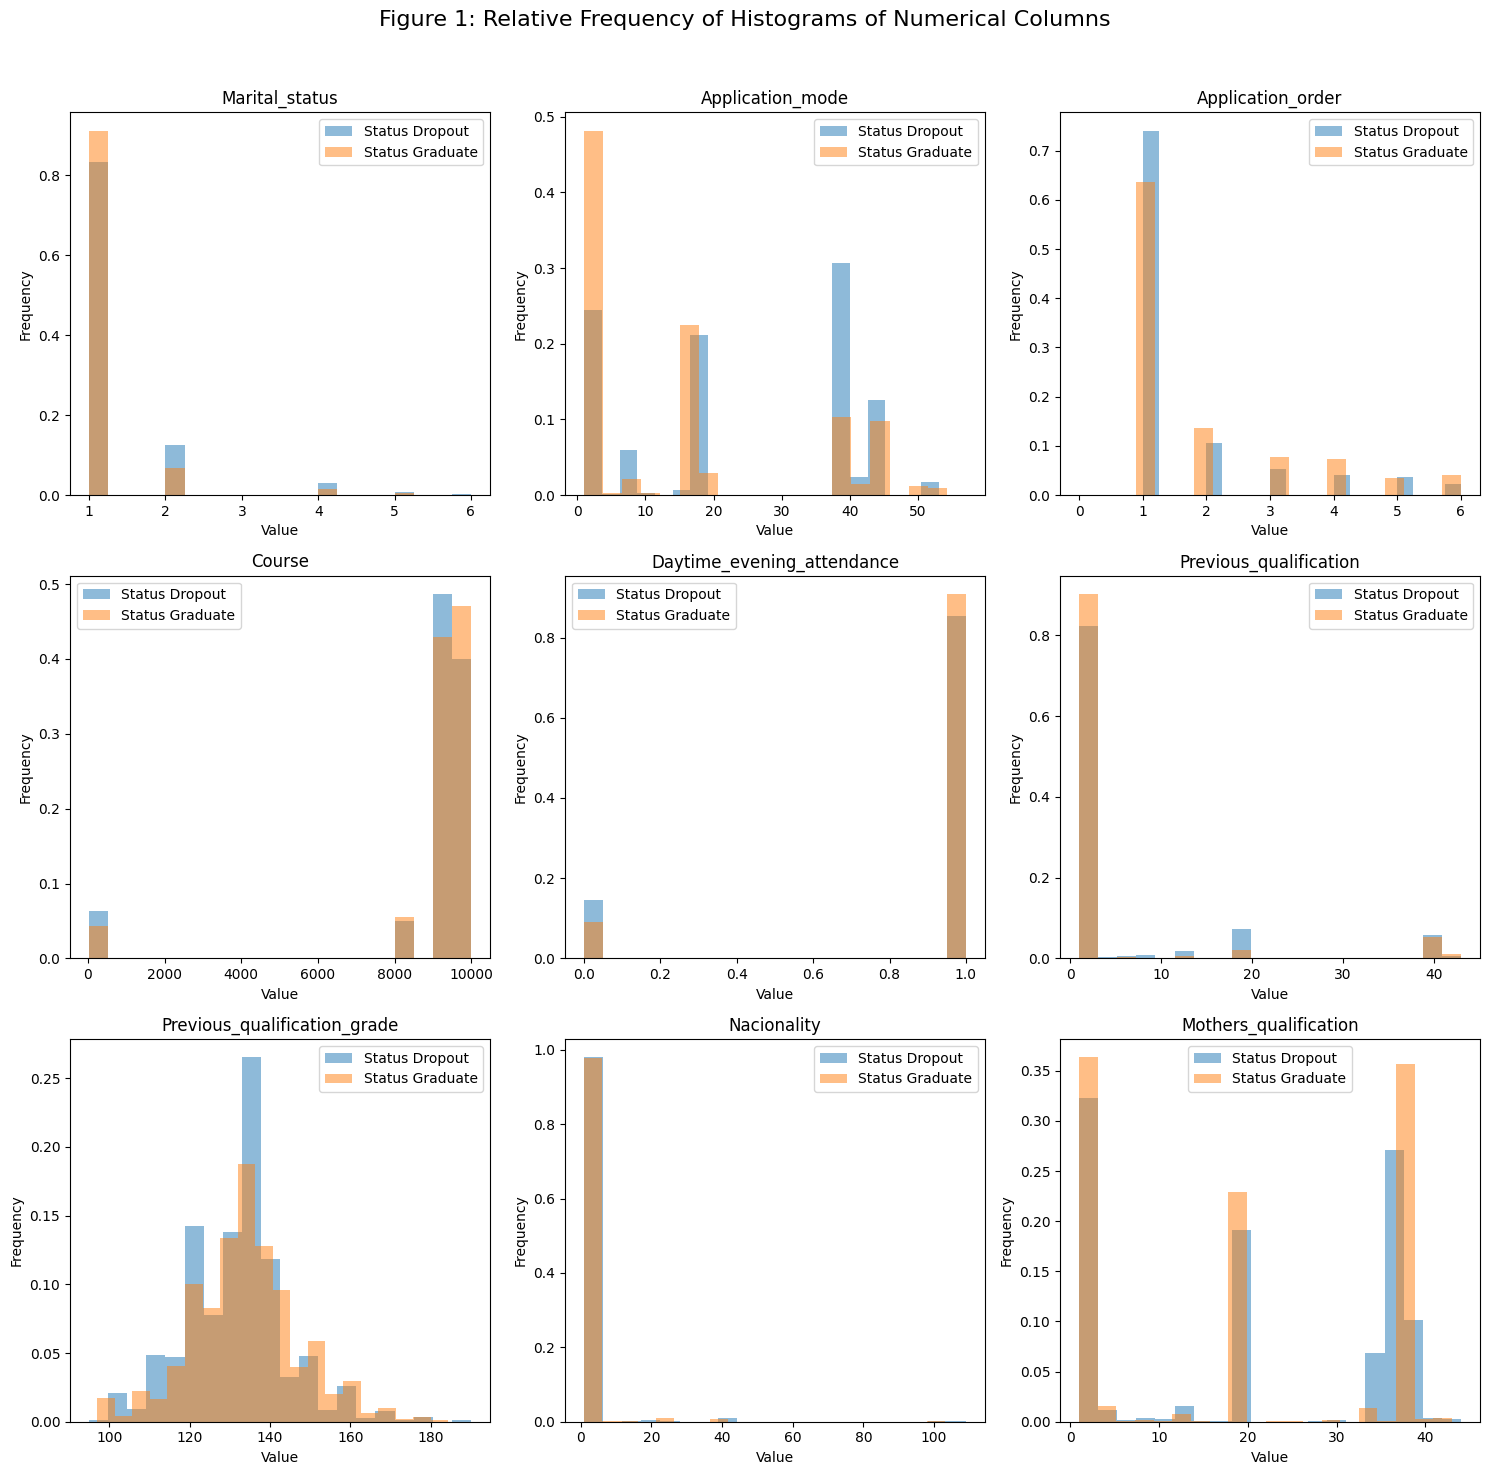

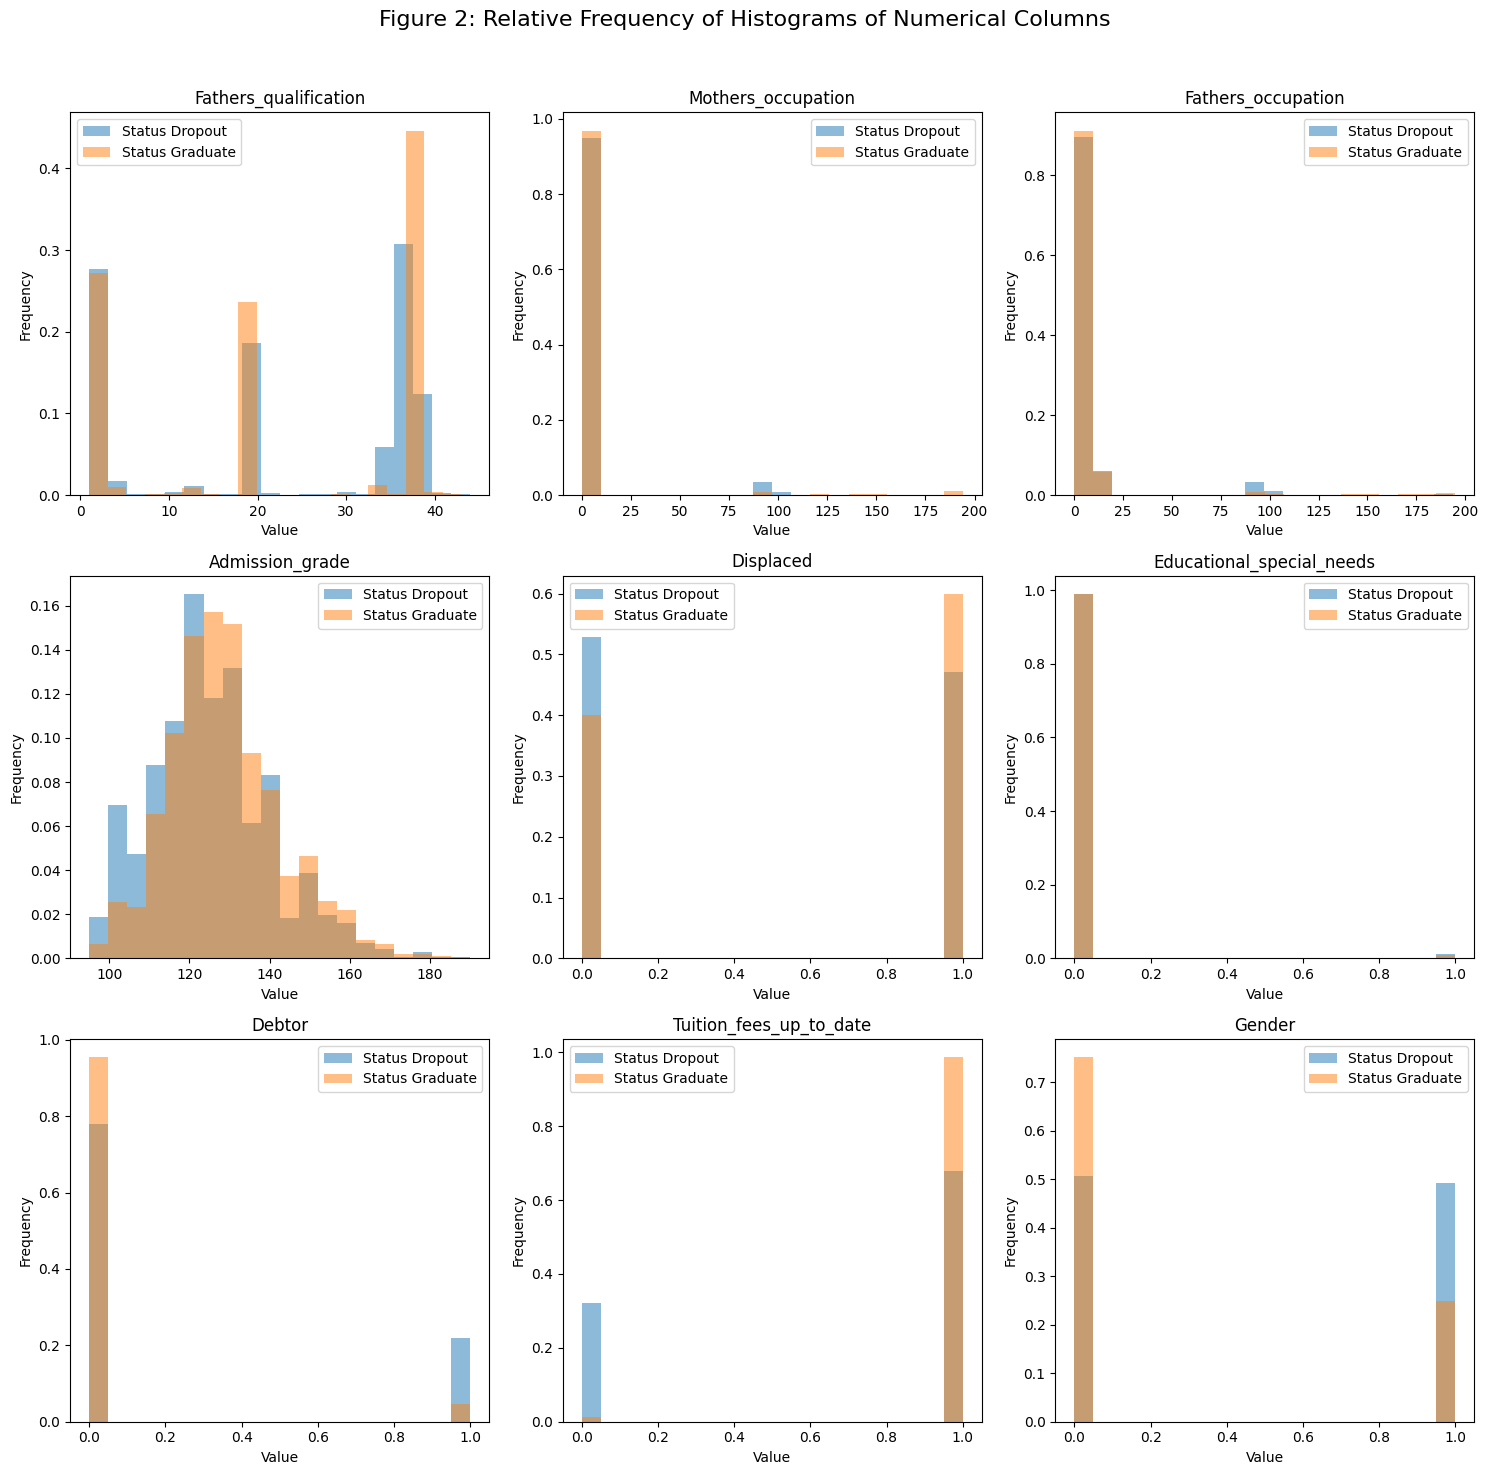

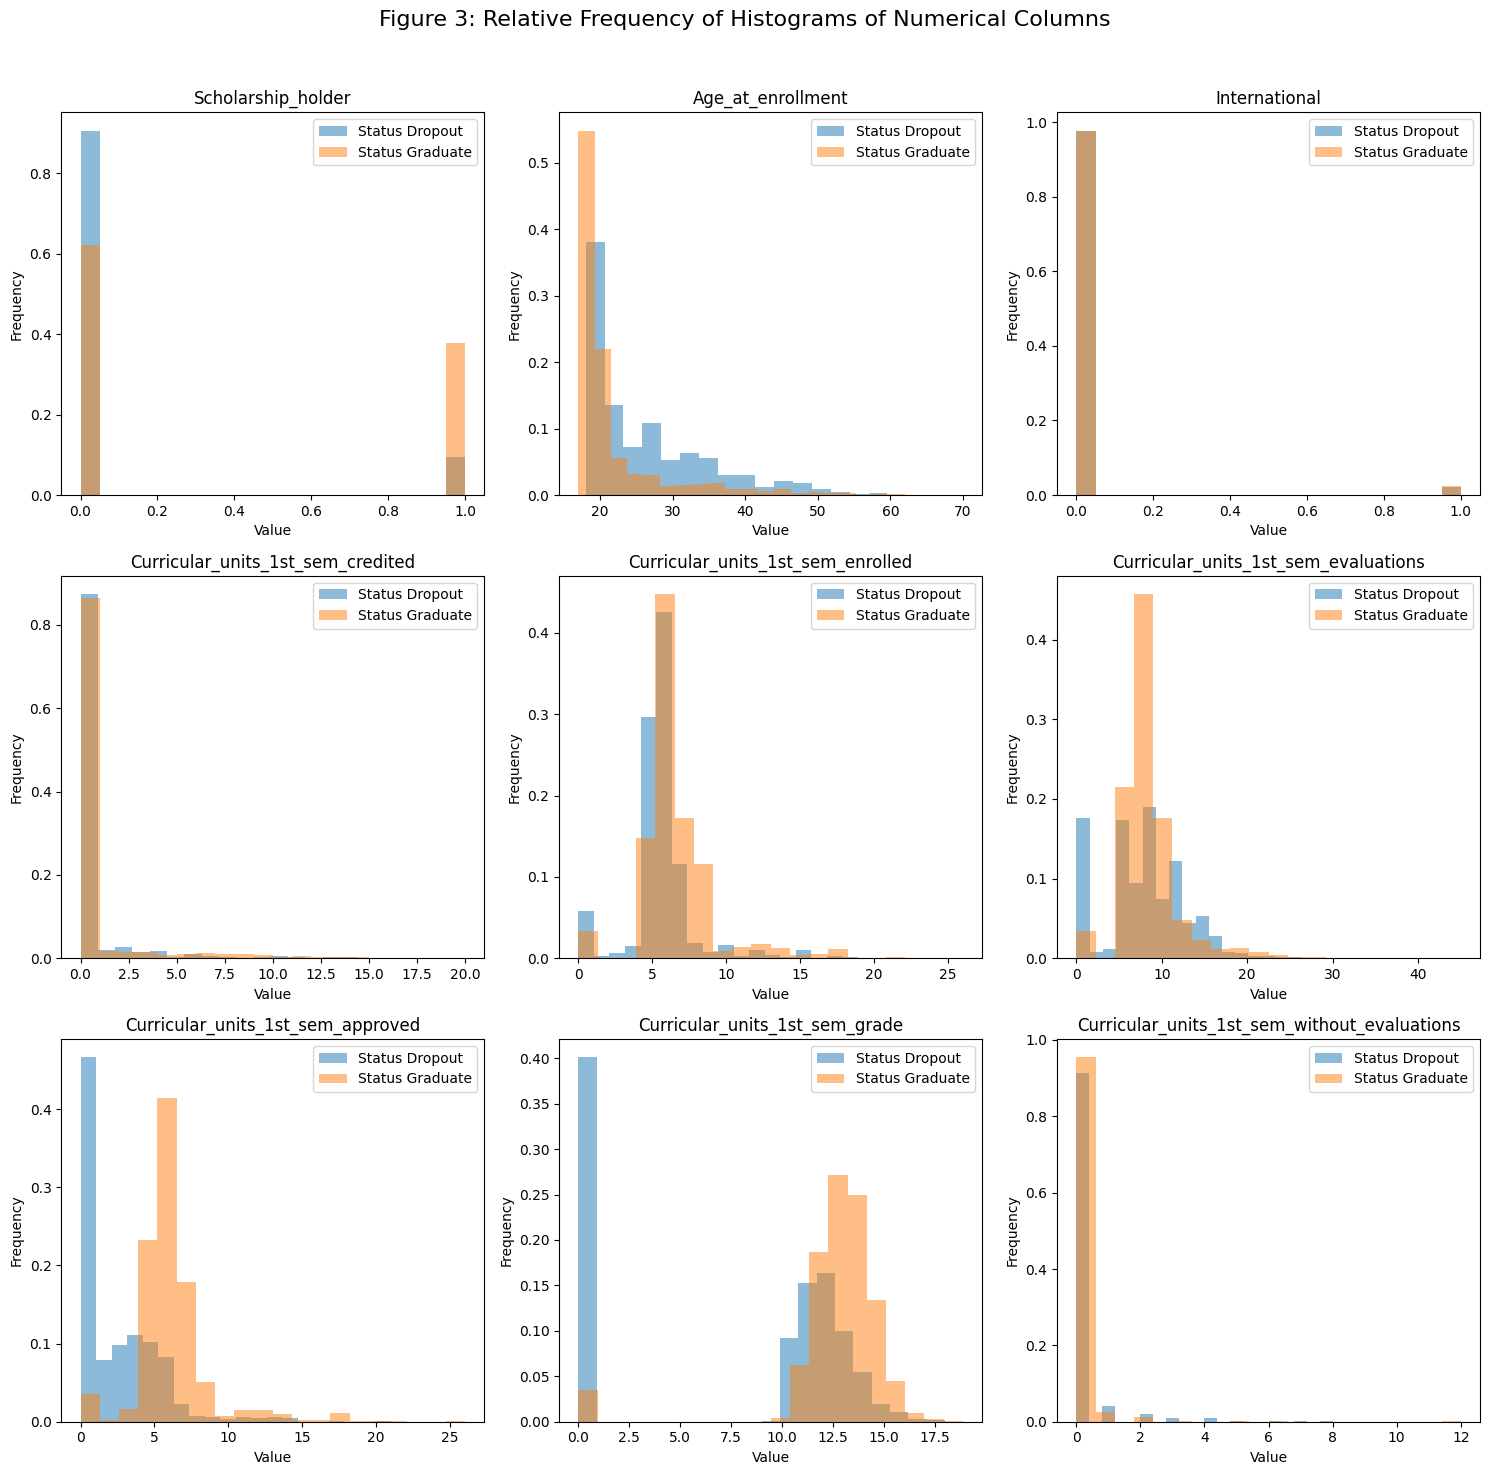

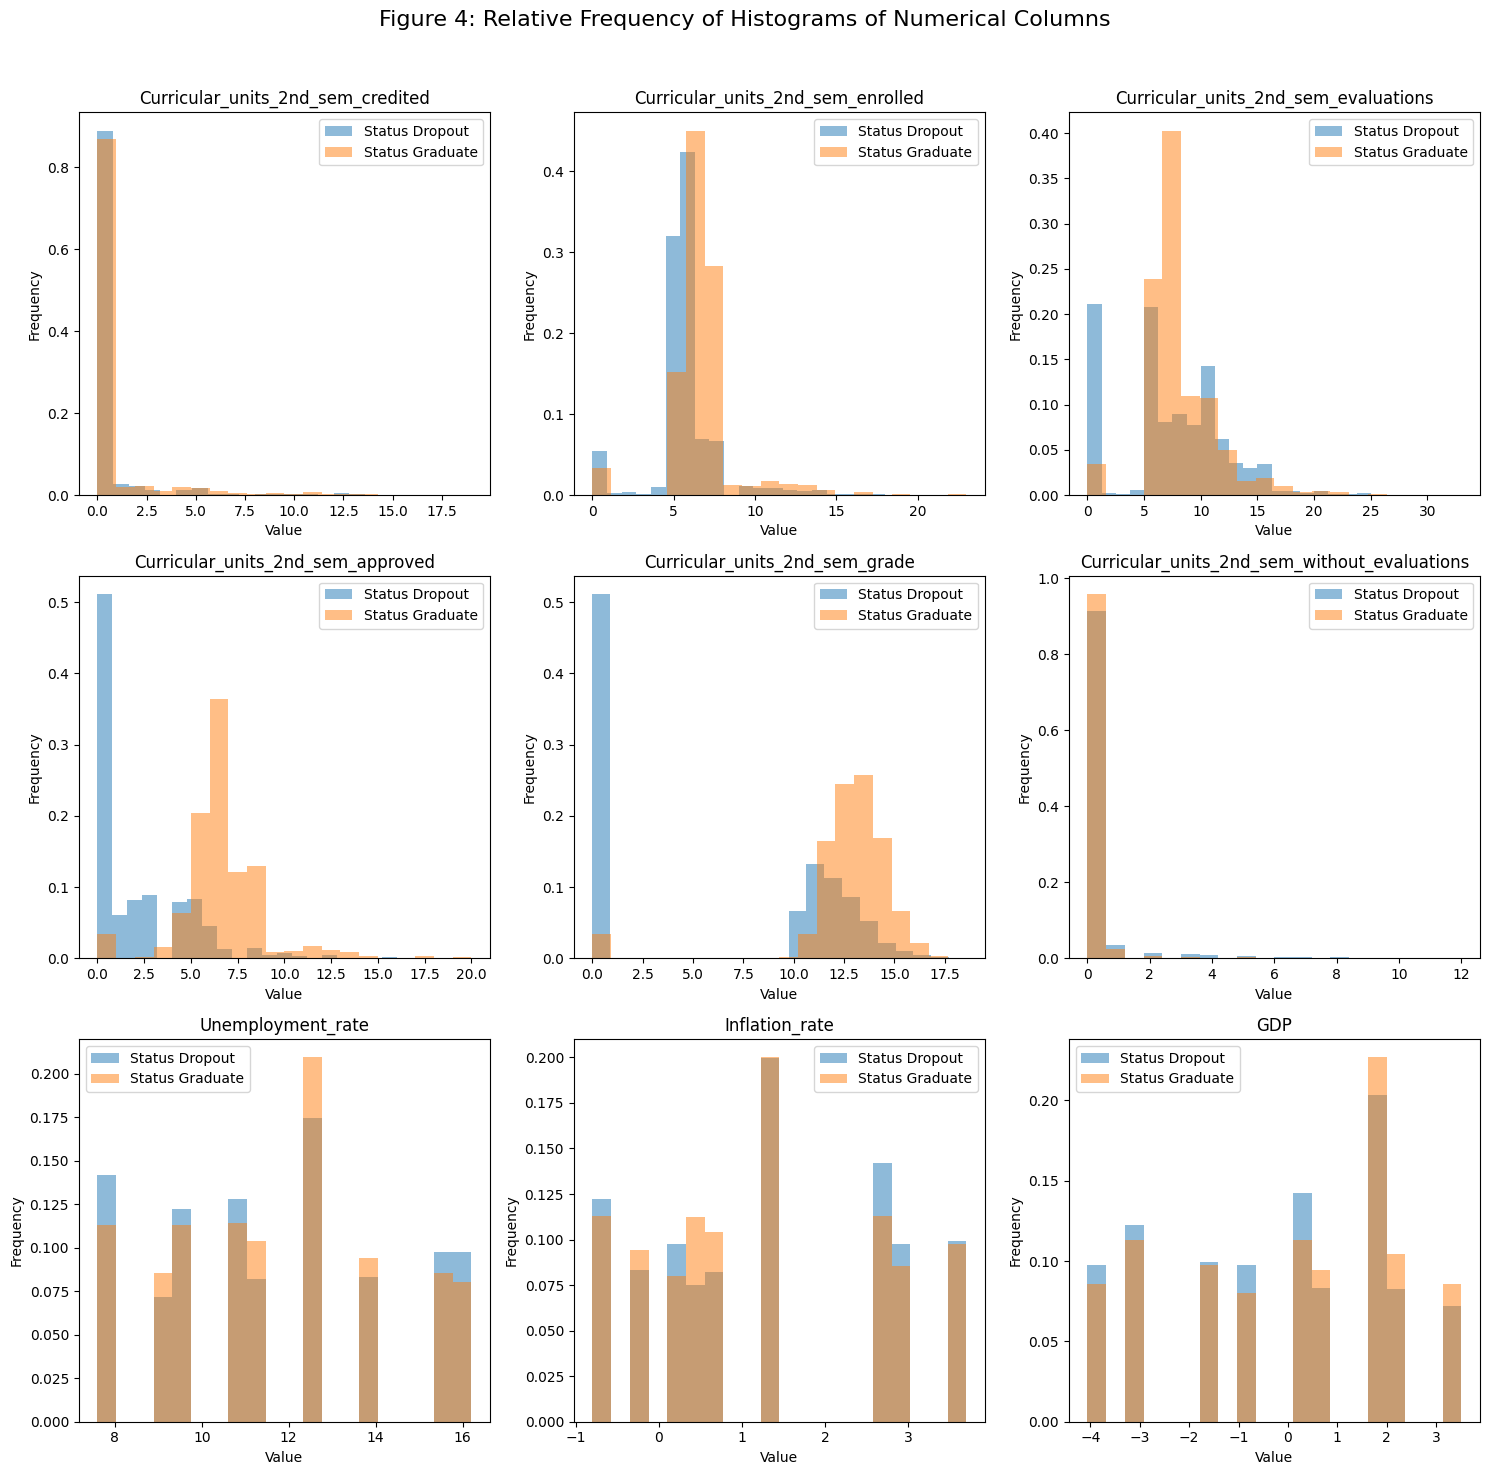

In [10]:
# Create a dummy dataframe
df_dummy = data['data'].copy()

# Filter out the 'Enrolled' status
df_dummy = df_dummy[df_dummy['Status'] != 'Enrolled']

# Convert categorical columns to category type
df_dummy['Status'] = df_dummy['Status'].astype('category')

# Loop through each chunk and create a figure
for i, chunk in enumerate(chunks):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    fig.suptitle(f'Figure {i + 1}: Relative Frequency of Histograms of Numerical Columns', fontsize=16)
    
    # Flatten axes for easier iteration
    axes = axes.flatten()
    
    for j, column in enumerate(chunk):
        ax = axes[j]
        for status_value in df_dummy['Status'].cat.categories:
            subset = df_dummy[df_dummy['Status'] == status_value][column]
            
            # Compute histogram counts
            counts, bins = np.histogram(subset, bins=20)
            
            # Compute relative frequency
            relative_freq = counts / counts.sum()
            
            # Plot histogram with relative frequency
            ax.bar(bins[:-1], relative_freq, width=np.diff(bins), alpha=0.5, label=f'Status {status_value}', align="edge")
        
        
        ax.set_title(column)
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
        ax.legend()
    
    # Hide unused subplots
    for k in range(len(chunk), len(axes)):
        fig.delaxes(axes[k])
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()

Show interesting features that show distinction

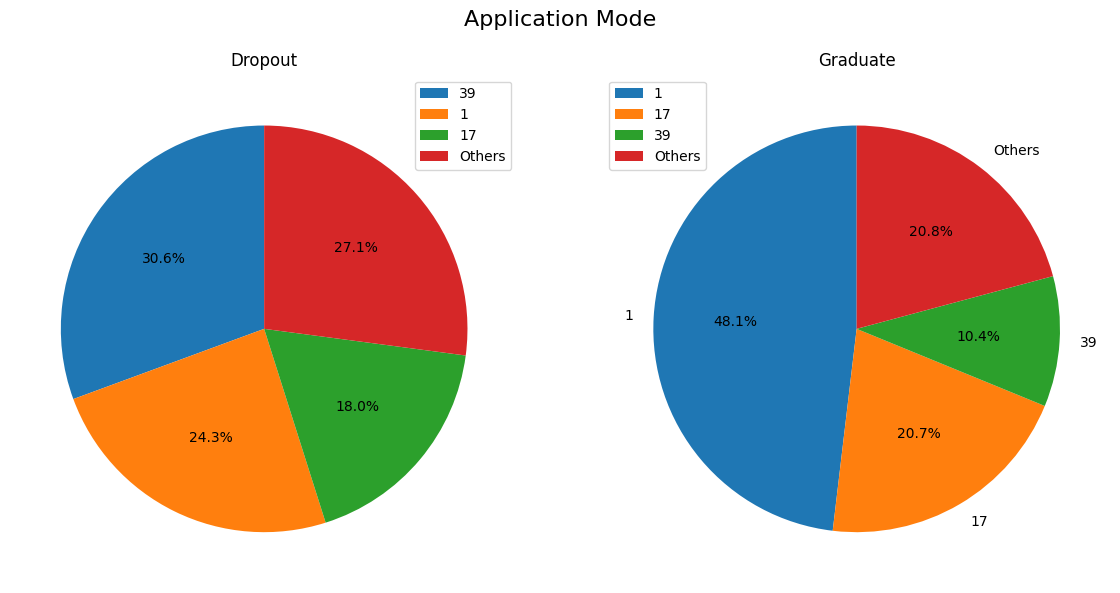

In [11]:
# 1. Application_mode

# Sample data (replace with your actual data)
df_dropout_counts = df_dropout['Application_mode'].value_counts()
df_graduate_counts = df_graduate['Application_mode'].value_counts()

# Function to group top 3 values and sum the rest as "Others"
def group_top_n(series, n=3):
    top_n = series.nlargest(n)
    others_sum = series.iloc[n:].sum()
    grouped_series = pd.concat([top_n, pd.Series({'Others': others_sum})], axis=0)
    return grouped_series

# Apply function to both datasets
dropout_grouped = group_top_n(df_dropout_counts)
graduate_grouped = group_top_n(df_graduate_counts)

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Application Mode', fontsize=16)

axes[0].pie(dropout_grouped, autopct='%1.1f%%', startangle=90)
axes[1].pie(graduate_grouped, labels=graduate_grouped.index, autopct='%1.1f%%', startangle=90)

axes[0].set_title('Dropout')
axes[1].set_title('Graduate')

axes[0].legend(labels=dropout_grouped.index, )
axes[1].legend(labels=graduate_grouped.index, )

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

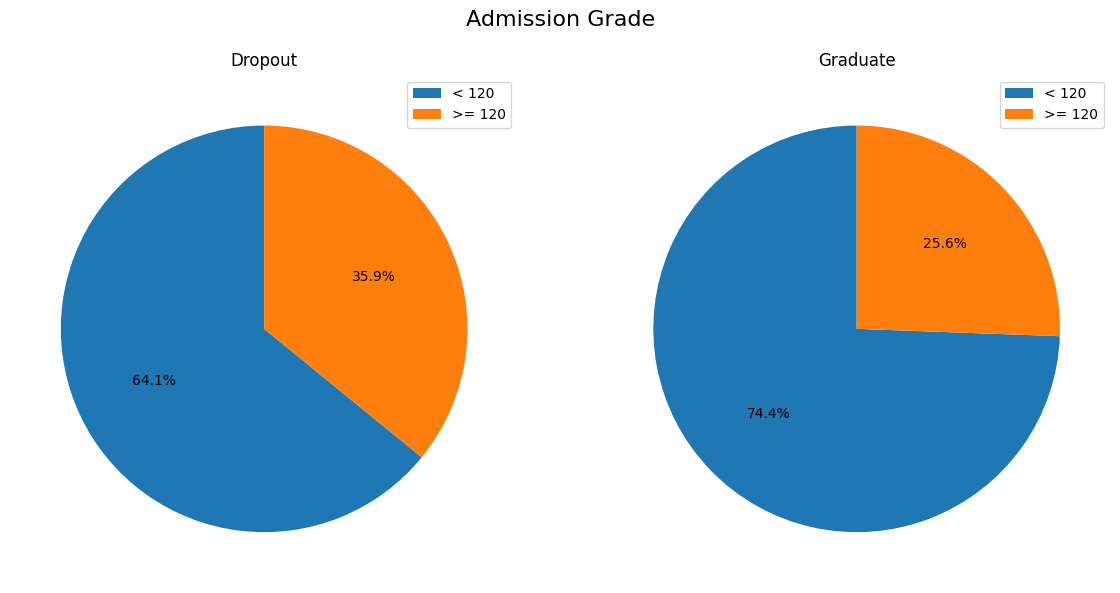

In [12]:
# 2. Admission_grade lower vs higher than 120

# Sample data (replace with your actual data)
df_dropout['Admission_grade_lower_than_120'] = df_dropout['Admission_grade'].apply(lambda x: 1 if x < 120 else 0)
df_graduate['Admission_grade_lower_than_120'] = df_graduate['Admission_grade'].apply(lambda x: 1 if x < 120 else 0)

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Admission Grade', fontsize=16)

axes[0].pie(df_dropout['Admission_grade_lower_than_120'].value_counts(), autopct='%1.1f%%', startangle=90)
axes[1].pie(df_graduate['Admission_grade_lower_than_120'].value_counts(), autopct='%1.1f%%', startangle=90)

axes[0].set_title('Dropout')
axes[1].set_title('Graduate')

axes[0].legend(labels=['< 120', '>= 120'], )
axes[1].legend(labels=['< 120', '>= 120'], )

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

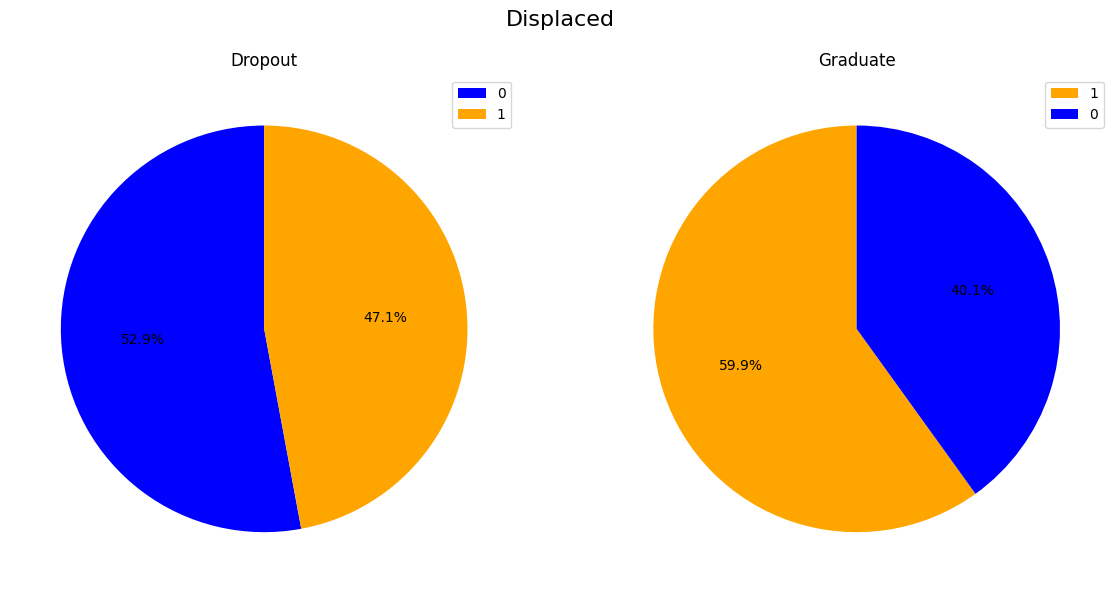

In [13]:
# 3. Displaced

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Displaced', fontsize=16)

axes[0].pie(df_dropout['Displaced'].value_counts(), autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
axes[1].pie(df_graduate['Displaced'].value_counts(), autopct='%1.1f%%', startangle=90, colors=['orange', 'blue'])

axes[0].set_title('Dropout')
axes[1].set_title('Graduate')

axes[0].legend(labels=df_dropout['Displaced'].value_counts().index, )
axes[1].legend(labels=df_graduate['Displaced'].value_counts().index, )

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

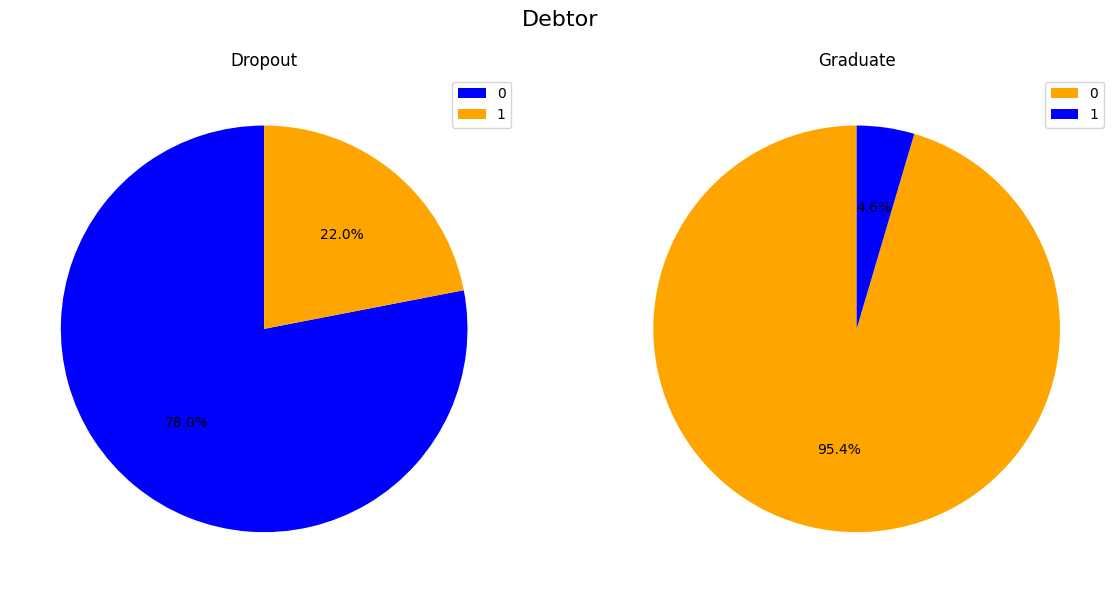

In [14]:
# 4. Debtor

col = 'Debtor'

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle(col, fontsize=16)

axes[0].pie(df_dropout[col].value_counts(), autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
axes[1].pie(df_graduate[col].value_counts(), autopct='%1.1f%%', startangle=90, colors=['orange', 'blue'])

axes[0].set_title('Dropout')
axes[1].set_title('Graduate')

axes[0].legend(labels=df_dropout[col].value_counts().index, )
axes[1].legend(labels=df_graduate[col].value_counts().index, )

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

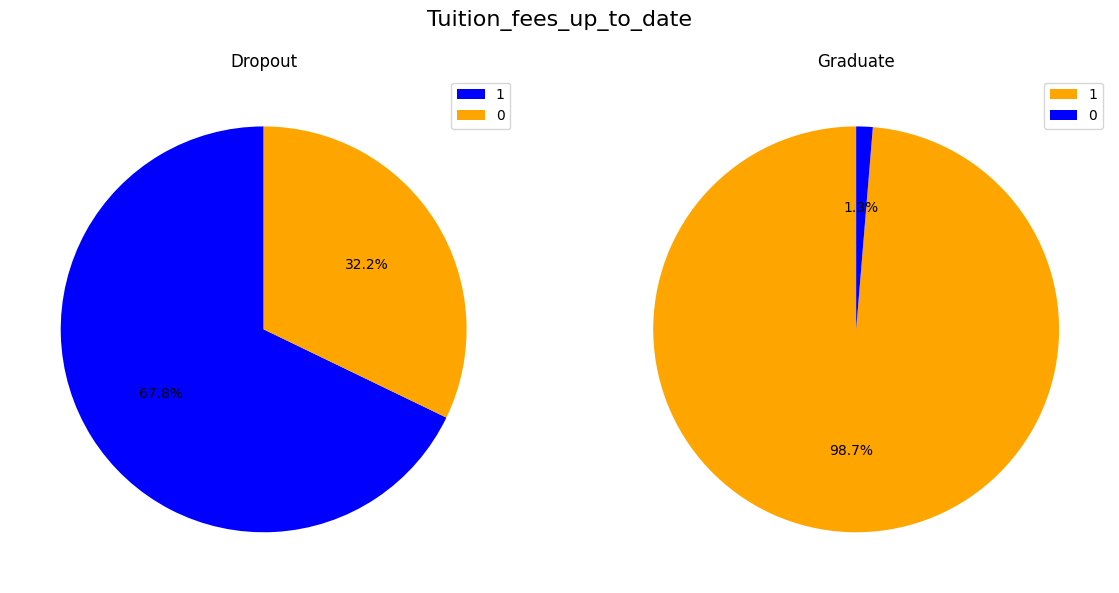

In [15]:
# 5. Tuition_fees_up_to_date

col = 'Tuition_fees_up_to_date'

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle(col, fontsize=16)

axes[0].pie(df_dropout[col].value_counts(), autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
axes[1].pie(df_graduate[col].value_counts(), autopct='%1.1f%%', startangle=90, colors=['orange', 'blue'])

axes[0].set_title('Dropout')
axes[1].set_title('Graduate')

axes[0].legend(labels=df_dropout[col].value_counts().index, )
axes[1].legend(labels=df_graduate[col].value_counts().index, )

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

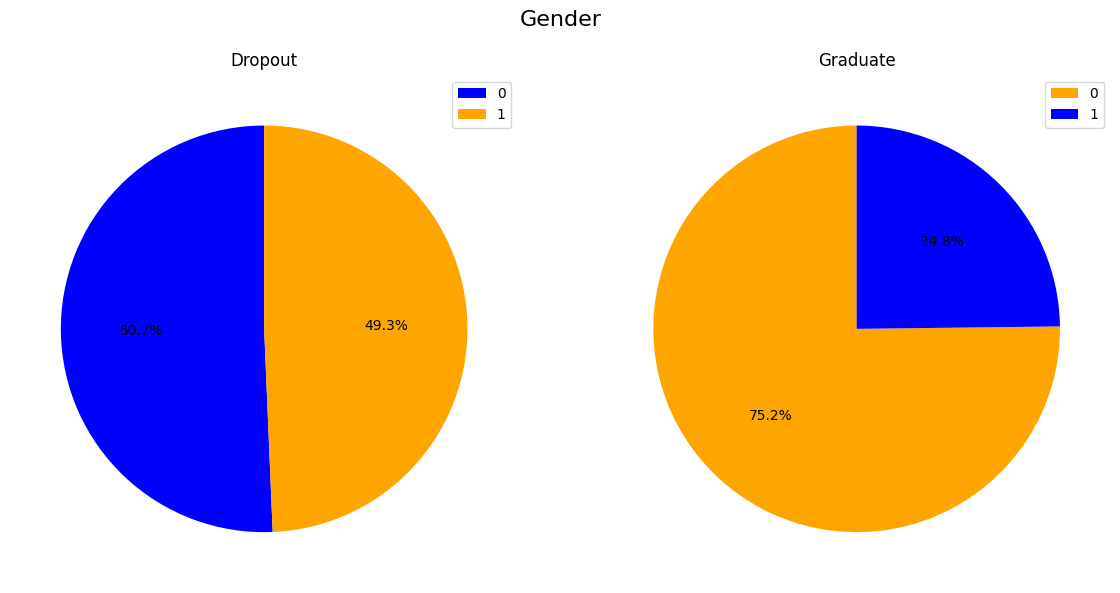

In [16]:
#6. Gender

col = 'Gender'

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle(col, fontsize=16)

axes[0].pie(df_dropout[col].value_counts(), autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
axes[1].pie(df_graduate[col].value_counts(), autopct='%1.1f%%', startangle=90, colors=['orange', 'blue'])

axes[0].set_title('Dropout')
axes[1].set_title('Graduate')

axes[0].legend(labels=df_dropout[col].value_counts().index, )
axes[1].legend(labels=df_graduate[col].value_counts().index, )

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

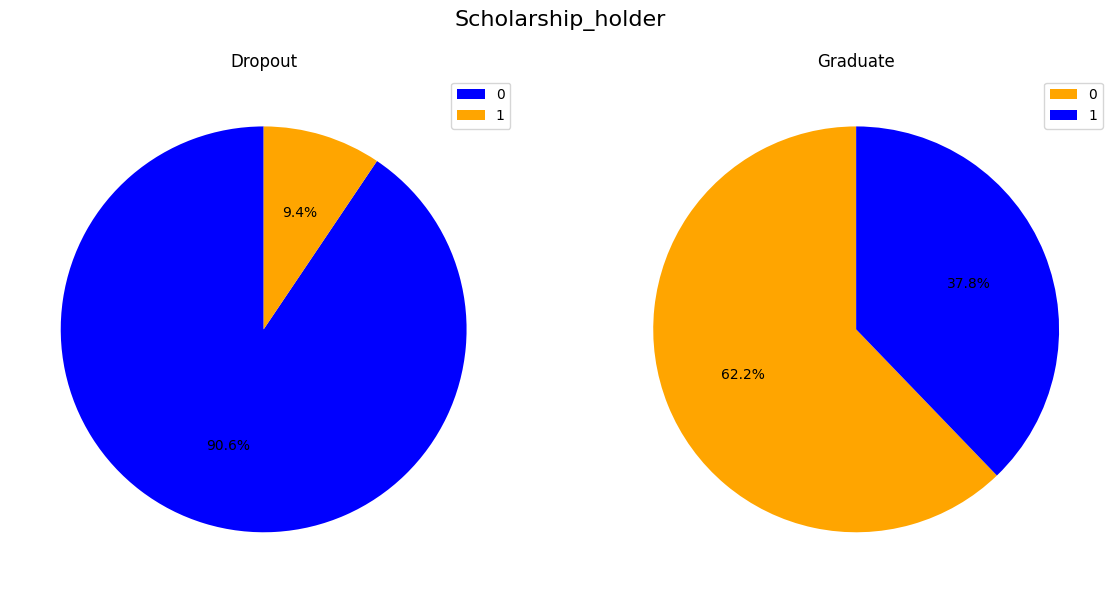

In [17]:
# 7. Scholarship_holder

col = 'Scholarship_holder'

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle(col, fontsize=16)

axes[0].pie(df_dropout[col].value_counts(), autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
axes[1].pie(df_graduate[col].value_counts(), autopct='%1.1f%%', startangle=90, colors=['orange', 'blue'])

axes[0].set_title('Dropout')
axes[1].set_title('Graduate')

axes[0].legend(labels=df_dropout[col].value_counts().index, )
axes[1].legend(labels=df_graduate[col].value_counts().index, )

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

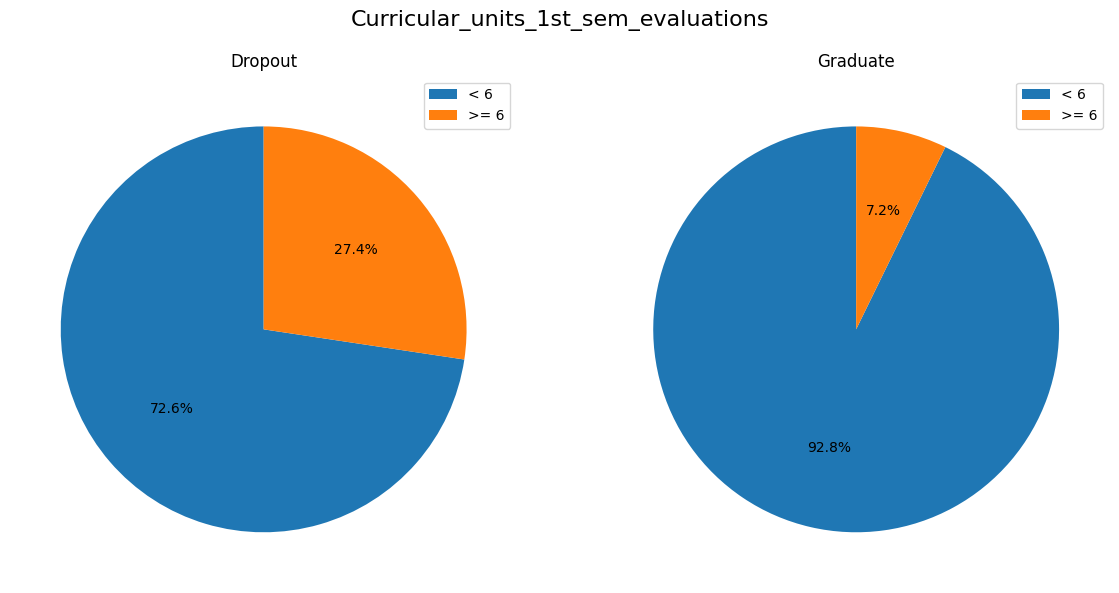

In [18]:
# 8. Curricular_units_1st_sem_evaluations lower vs higher than 6

# Sample data (replace with your actual data)
col = 'Curricular_units_1st_sem_evaluations'
limit = 6


df_dropout[f'{col}_lower_than_{str(limit)}'] = df_dropout[col].apply(lambda x: 1 if x < limit else 0)
df_graduate[f'{col}_lower_than_{str(limit)}'] = df_graduate[col].apply(lambda x: 1 if x < limit else 0)

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle(col, fontsize=16)

axes[0].pie(df_dropout[f'{col}_lower_than_{str(limit)}'].value_counts(), autopct='%1.1f%%', startangle=90)
axes[1].pie(df_graduate[f'{col}_lower_than_{str(limit)}'].value_counts(), autopct='%1.1f%%', startangle=90)

axes[0].set_title('Dropout')
axes[1].set_title('Graduate')

axes[0].legend(labels=[f'< {str(limit)}', f'>= {str(limit)}'], )
axes[1].legend(labels=[f'< {str(limit)}', f'>= {str(limit)}'], )

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

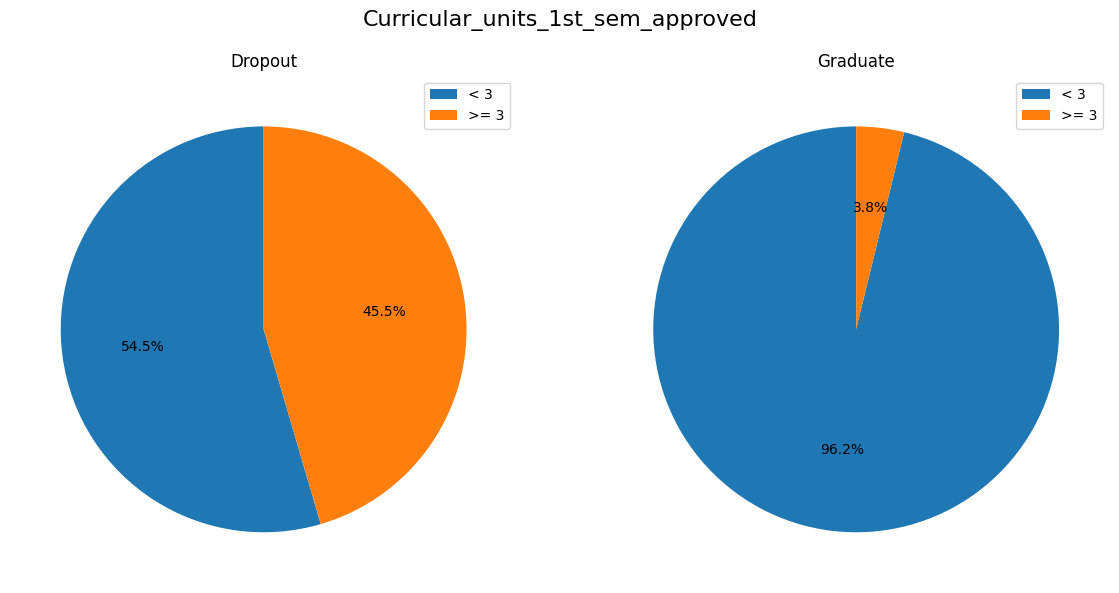

In [19]:
# 9. Curricular_units_1st_sem_approved lower vs higher than 3

# Sample data (replace with your actual data)
col = 'Curricular_units_1st_sem_approved'
limit = 3


df_dropout[f'{col}_lower_than_{str(limit)}'] = df_dropout[col].apply(lambda x: 1 if x < limit else 0)
df_graduate[f'{col}_lower_than_{str(limit)}'] = df_graduate[col].apply(lambda x: 1 if x < limit else 0)

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle(col, fontsize=16)

axes[0].pie(df_dropout[f'{col}_lower_than_{str(limit)}'].value_counts(), autopct='%1.1f%%', startangle=90)
axes[1].pie(df_graduate[f'{col}_lower_than_{str(limit)}'].value_counts(), autopct='%1.1f%%', startangle=90)

axes[0].set_title('Dropout')
axes[1].set_title('Graduate')

axes[0].legend(labels=[f'< {str(limit)}', f'>= {str(limit)}'], )
axes[1].legend(labels=[f'< {str(limit)}', f'>= {str(limit)}'], )

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

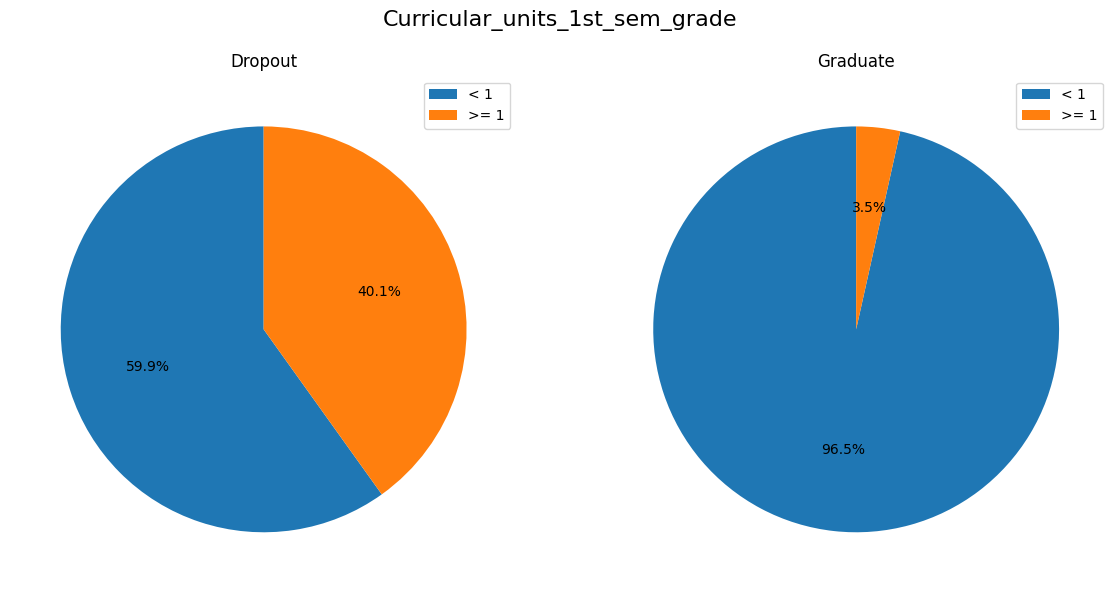

In [20]:
# 10 Curricular_units_1st_sem_grade lower vs higher than 1

# Sample data (replace with your actual data)
col = 'Curricular_units_1st_sem_grade'
limit = 1


df_dropout[f'{col}_lower_than_{str(limit)}'] = df_dropout[col].apply(lambda x: 1 if x < limit else 0)
df_graduate[f'{col}_lower_than_{str(limit)}'] = df_graduate[col].apply(lambda x: 1 if x < limit else 0)

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle(col, fontsize=16)

axes[0].pie(df_dropout[f'{col}_lower_than_{str(limit)}'].value_counts(), autopct='%1.1f%%', startangle=90)
axes[1].pie(df_graduate[f'{col}_lower_than_{str(limit)}'].value_counts(), autopct='%1.1f%%', startangle=90)

axes[0].set_title('Dropout')
axes[1].set_title('Graduate')

axes[0].legend(labels=[f'< {str(limit)}', f'>= {str(limit)}'], )
axes[1].legend(labels=[f'< {str(limit)}', f'>= {str(limit)}'], )

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

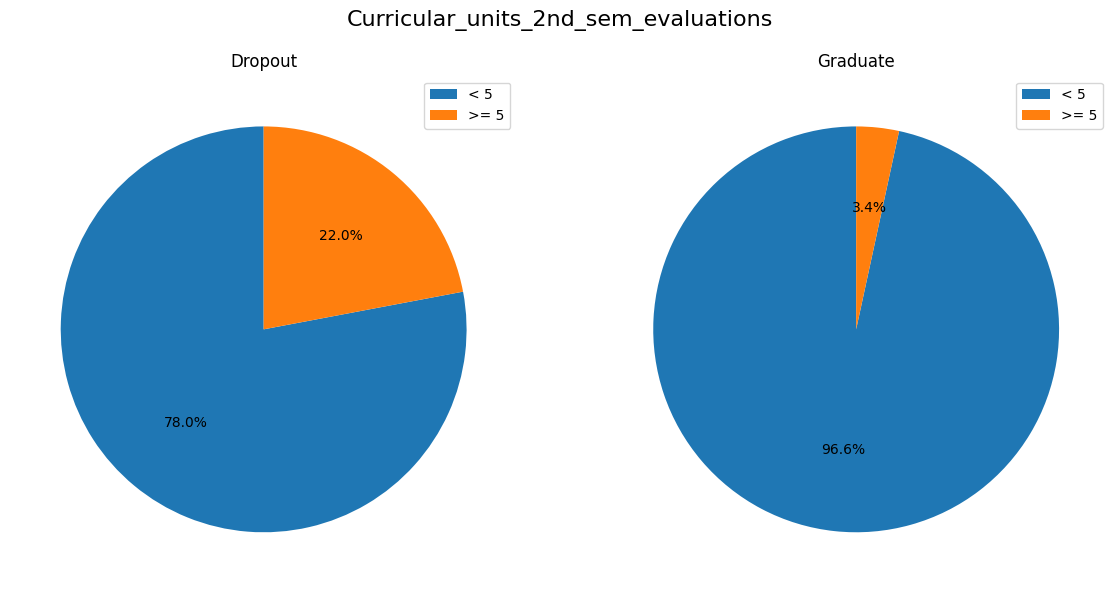

In [21]:
# 11. Curricular_units_2nd_sem_evaluations lower vs higher than 6

# Sample data (replace with your actual data)
col = 'Curricular_units_2nd_sem_evaluations'
limit = 5


df_dropout[f'{col}_lower_than_{str(limit)}'] = df_dropout[col].apply(lambda x: 1 if x < limit else 0)
df_graduate[f'{col}_lower_than_{str(limit)}'] = df_graduate[col].apply(lambda x: 1 if x < limit else 0)

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle(col, fontsize=16)

axes[0].pie(df_dropout[f'{col}_lower_than_{str(limit)}'].value_counts(), autopct='%1.1f%%', startangle=90)
axes[1].pie(df_graduate[f'{col}_lower_than_{str(limit)}'].value_counts(), autopct='%1.1f%%', startangle=90)

axes[0].set_title('Dropout')
axes[1].set_title('Graduate')

axes[0].legend(labels=[f'< {str(limit)}', f'>= {str(limit)}'], )
axes[1].legend(labels=[f'< {str(limit)}', f'>= {str(limit)}'], )

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

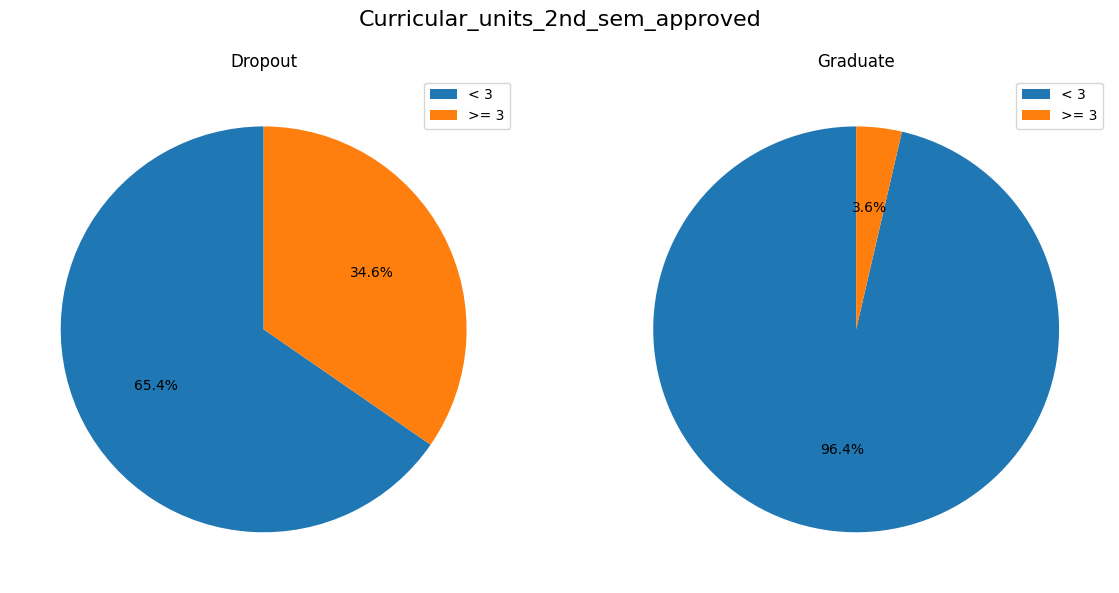

In [22]:
# 12. Curricular_units_2nd_sem_approved lower vs higher than 3

# Sample data (replace with your actual data)
col = 'Curricular_units_2nd_sem_approved'
limit = 3


df_dropout[f'{col}_lower_than_{str(limit)}'] = df_dropout[col].apply(lambda x: 1 if x < limit else 0)
df_graduate[f'{col}_lower_than_{str(limit)}'] = df_graduate[col].apply(lambda x: 1 if x < limit else 0)

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle(col, fontsize=16)

axes[0].pie(df_dropout[f'{col}_lower_than_{str(limit)}'].value_counts(), autopct='%1.1f%%', startangle=90)
axes[1].pie(df_graduate[f'{col}_lower_than_{str(limit)}'].value_counts(), autopct='%1.1f%%', startangle=90)

axes[0].set_title('Dropout')
axes[1].set_title('Graduate')

axes[0].legend(labels=[f'< {str(limit)}', f'>= {str(limit)}'], )
axes[1].legend(labels=[f'< {str(limit)}', f'>= {str(limit)}'], )

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

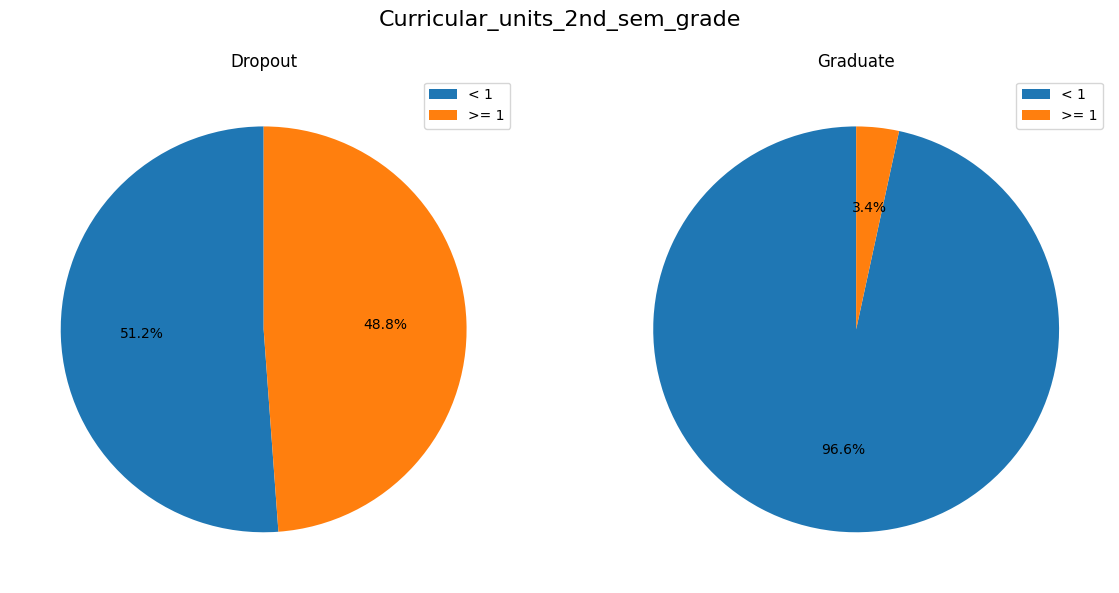

In [23]:
# 10 Curricular_units_2nd_sem_grade lower vs higher than 1

# Sample data (replace with your actual data)
col = 'Curricular_units_2nd_sem_grade'
limit = 1


df_dropout[f'{col}_lower_than_{str(limit)}'] = df_dropout[col].apply(lambda x: 1 if x < limit else 0)
df_graduate[f'{col}_lower_than_{str(limit)}'] = df_graduate[col].apply(lambda x: 1 if x < limit else 0)

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle(col, fontsize=16)

axes[0].pie(df_dropout[f'{col}_lower_than_{str(limit)}'].value_counts(), autopct='%1.1f%%', startangle=90)
axes[1].pie(df_graduate[f'{col}_lower_than_{str(limit)}'].value_counts(), autopct='%1.1f%%', startangle=90)

axes[0].set_title('Dropout')
axes[1].set_title('Graduate')

axes[0].legend(labels=[f'< {str(limit)}', f'>= {str(limit)}'], )
axes[1].legend(labels=[f'< {str(limit)}', f'>= {str(limit)}'], )

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

#### Students' Performance

A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. The data is used to build classification models to predict students' dropout and academic sucess.

| Column name | Description |
| --- | --- |
|Marital status | The marital status of the student. (Categorical) 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated |
| Application mode | The method of application used by the student. (Categorical) 1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)|
|Application order | The order in which the student applied. (Numerical) Application order (between 0 - first choice; and 9 last choice) |
|Course | The course taken by the student. (Categorical) 33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)|
|Daytime/evening attendance | Whether the student attends classes during the day or in the evening. (Categorical) 1 – daytime 0 - evening |
|Previous qualification| The qualification obtained by the student before enrolling in higher education. (Categorical) 1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle) |
|Previous qualification (grade) | Grade of previous qualification (between 0 and 200) |
| Nacionality | The nationality of the student. (Categorical) 1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian|
|Mother's qualification | The qualification of the student's mother. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)|
|Father's qualification | The qualification of the student's father. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 13 - 2nd year complementary high school course 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 20 - Complementary High School Course 22 - Technical-professional course 25 - Complementary High School Course - not concluded 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 31 - General Course of Administration and Commerce 33 - Supplementary Accounting and Administration 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle) |
| Mother's occupation | The occupation of the student's mother. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants |
| Father's occupation | The occupation of the student's father. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers |
| Admission grade | Admission grade (between 0 and 200) |
| Displaced | Whether the student is a displaced person. (Categorical) 	1 – yes 0 – no |
| Educational special needs | Whether the student has any special educational needs. (Categorical) 1 – yes 0 – no |
|Debtor | Whether the student is a debtor. (Categorical) 1 – yes 0 – no|
|Tuition fees up to date | Whether the student's tuition fees are up to date. (Categorical) 1 – yes 0 – no|
|Gender | The gender of the student. (Categorical) 1 – male 0 – female |
|Scholarship holder | Whether the student is a scholarship holder. (Categorical) 1 – yes 0 – no |
|Age at enrollment | The age of the student at the time of enrollment. (Numerical)|
|International | Whether the student is an international student. (Categorical) 1 – yes 0 – no|
|Curricular units 1st sem (credited) | The number of curricular units credited by the student in the first semester. (Numerical) |
| Curricular units 1st sem (enrolled) | The number of curricular units enrolled by the student in the first semester. (Numerical) |
| Curricular units 1st sem (evaluations) | The number of curricular units evaluated by the student in the first semester. (Numerical) |
| Curricular units 1st sem (approved) | The number of curricular units approved by the student in the first semester. (Numerical) |

## Acknowledgements
Realinho,Valentim, Vieira Martins,Mónica, Machado,Jorge, and Baptista,Luís. (2021). Predict students' dropout and academic success. UCI Machine Learning Repository. https://doi.org/10.24432/C5MC89. 

## Data Preparation / Preprocessing

In [24]:
# Create a copy of the data
df = data['data'].copy()

# Remove 'Enrolled' status
df = df[df['Status'] != 'Enrolled']

# Ensure 'Status' is treated as a categorical variable
df['Status'] = df['Status'].astype('category')

# Separate the 'Status' column from the rest of the DataFrame
X = df.drop(columns=['Status'])
y = df['Status']

In [25]:
# Create a text_columns list
text_columns = list(X.select_dtypes(include=['object']).columns)

# Add label encoded columns to text_columns
label_encoded_columns =[    
    'Course', 'Marital_status', 'Application_mode', 'Application_order',
    'Daytime_evening_attendance', 'Previous_qualification', 'Nacionality',
    'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation',
    'Fathers_occupation', 'Displaced', 'Educational_special_needs', 'Debtor',
    'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International'
]

text_columns.extend(label_encoded_columns)

for col in text_columns:
    # Perform one-hot encoding on 'text' columns
    dummies = pd.get_dummies(X[col].astype('object'), prefix=col).astype(int)

    # Concatenate the dummy variables to the original DataFrame
    X = pd.concat([X, dummies], axis=1)

    # Drop the original column
    X.drop(col, axis=1, inplace=True)

# Preview the updated DataFrame
X.head()

Previous_qualification_grade  Admission_grade  Age_at_enrollment  \
0                         122.0            127.3                 20   
1                         160.0            142.5                 19   
2                         122.0            124.8                 19   
3                         122.0            119.6                 20   
4                         100.0            141.5                 45   

   Curricular_units_1st_sem_credited  Curricular_units_1st_sem_enrolled  \
0                                  0                                  0   
1                                  0                                  6   
2                                  0                                  6   
3                                  0                                  6   
4                                  0                                  6   

   Curricular_units_1st_sem_evaluations  Curricular_units_1st_sem_approved  \
0                                     0                                  0   
1                                     6                                  6   
2                                     0                                  0   
3                                     8                                  6   
4                                     9                                  5   

   Curricular_units_1st_sem_grade  \
0                        0.000000   
1                       14.000000   
2                        0.000000   
3                       13.428571   
4                       12.333333   

   Curricular_units_1st_sem_without_evaluations  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Curricular_units_2nd_sem_credited  ...  Debtor_0  Debtor_1  \
0                                  0  ...         1         0   
1                                  0  ...         1         0   
2                                  0  ...         1         0   
3                                  0  ...         1         0   
4                                  0  ...         1         0   

   Tuition_fees_up_to_date_0  Tuition_fees_up_to_date_1  Gender_0  Gender_1  \
0                          0                          1         0         1   
1                          1                          0         0         1   
2                          1                          0         0         1   
3                          0                          1         1         0   
4                          0                          1         1         0   

   Scholarship_holder_0  Scholarship_holder_1  International_0  \
0                     1                     0                1   
1                     1                     0                1   
2                     1                     0                1   
3                     1                     0                1   
4                     1                     0                1   

   International_1  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 252 columns]

In [26]:
X.dtypes

Previous_qualification_grade         float64
Admission_grade                      float64
Age_at_enrollment                      int64
Curricular_units_1st_sem_credited      int64
Curricular_units_1st_sem_enrolled      int64
                                      ...   
Gender_1                               int64
Scholarship_holder_0                   int64
Scholarship_holder_1                   int64
International_0                        int64
International_1                        int64
Length: 252, dtype: object

Dropping features with high multicollinearity to avoid redundancy and bias

In [27]:
# Define correlation limit
limit = 0.9
high_correlated_columns = set()
retained_columns = set()

# Create a correlation matrix
correlation_matrix = X.corr(method='pearson')

# Identify features with high multicollinearity
for col in correlation_matrix.columns:
    if col in retained_columns:  # Skip already retained columns
        continue
    for key, val in correlation_matrix[col].items():
        if abs(val) > limit and col != key:  # Avoid self-correlation
            if key not in retained_columns:  # Retain one feature and drop the other
                high_correlated_columns.add(key)
                retained_columns.add(col)

print(f"Columns with high multicollinearity (>|{limit}|):\n", high_correlated_columns)

# Drop correlated columns from dataframe
if high_correlated_columns:
    X = X.drop(columns=high_correlated_columns)

# Preview the cleaned DataFrame
X.head()

Columns with high multicollinearity (>|0.9|):
 {'Tuition_fees_up_to_date_1', 'Debtor_1', 'Displaced_1', 'International_0', 'Previous_qualification_39', 'Curricular_units_2nd_sem_credited', 'Fathers_occupation_124', 'Fathers_qualification_18', 'International_1', 'Previous_qualification_42', 'Gender_1', 'Fathers_occupation_172', 'Scholarship_holder_1', 'Curricular_units_2nd_sem_enrolled', 'Educational_special_needs_1', 'Daytime_evening_attendance_1', 'Curricular_units_2nd_sem_approved'}


Previous_qualification_grade  Admission_grade  Age_at_enrollment  \
0                         122.0            127.3                 20   
1                         160.0            142.5                 19   
2                         122.0            124.8                 19   
3                         122.0            119.6                 20   
4                         100.0            141.5                 45   

   Curricular_units_1st_sem_credited  Curricular_units_1st_sem_enrolled  \
0                                  0                                  0   
1                                  0                                  6   
2                                  0                                  6   
3                                  0                                  6   
4                                  0                                  6   

   Curricular_units_1st_sem_evaluations  Curricular_units_1st_sem_approved  \
0                                     0                                  0   
1                                     6                                  6   
2                                     0                                  0   
3                                     8                                  6   
4                                     9                                  5   

   Curricular_units_1st_sem_grade  \
0                        0.000000   
1                       14.000000   
2                        0.000000   
3                       13.428571   
4                       12.333333   

   Curricular_units_1st_sem_without_evaluations  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Curricular_units_2nd_sem_evaluations  ...  Fathers_occupation_192  \
0                                     0  ...                       0   
1                                     6  ...                       0   
2                                     0  ...                       0   
3                                    10  ...                       0   
4                                     6  ...                       0   

   Fathers_occupation_193  Fathers_occupation_194  Fathers_occupation_195  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Displaced_0  Educational_special_needs_0  Debtor_0  \
0            0                            1         1   
1            0                            1         1   
2            0                            1         1   
3            0                            1         1   
4            1                            1         1   

   Tuition_fees_up_to_date_0  Gender_0  Scholarship_holder_0  
0                          0         0                     1  
1                          1         0                     1  
2                          1         0                     1  
3                          0         1                     1  
4                          0         1                     1  

[5 rows x 235 columns]

Drop Features with (Near-)Zero Variance

Features with very low or near-zero variance are features whose values hardly change across the entire dataset. In other words, these features do not have much variation and do not provide much useful information for the model.

<Axes: >

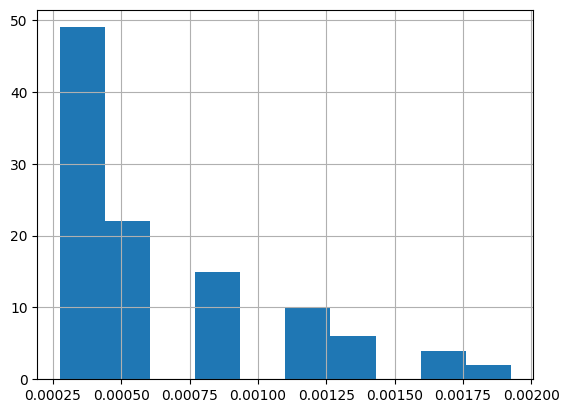

In [28]:
# Show the graph of variance
(X.var() / X.max())[(X.var() / X.max()) < 0.002].hist()

In [29]:
# Setting the variance limit
limit = 0.001
features = X.var()[X.var() / X.max() > limit].index
print(f"Fitur yang dipertahankan\n{features}")
print(f"Fitur yang didrop\n{X.var()[X.var() / X.max() <= limit].index}")

# Select features
X = X[features]

# Preview the cleaned DataFrame
X.head()

Fitur yang dipertahankan
Index(['Previous_qualification_grade', 'Admission_grade', 'Age_at_enrollment',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_evaluations',
       ...
       'Fathers_occupation_99', 'Fathers_occupation_144',
       'Fathers_occupation_192', 'Fathers_occupation_193', 'Displaced_0',
       'Educational_special_needs_0', 'Debtor_0', 'Tuition_fees_up_to_date_0',
       'Gender_0', 'Scholarship_holder_0'],
      dtype='object', length=149)
Fitur yang didrop
Index(['Marital_status_3', 'Application_mode_2', 'Application_mode_26',
       'Application_mode_27', 'Application_mode_57', 'Application_order_0',
       'Previous_qualification_5', 'Previous_qualification_14',
       'Previous_qualification_15', 'Nacionality_2'

Previous_qualification_grade  Admission_grade  Age_at_enrollment  \
0                         122.0            127.3                 20   
1                         160.0            142.5                 19   
2                         122.0            124.8                 19   
3                         122.0            119.6                 20   
4                         100.0            141.5                 45   

   Curricular_units_1st_sem_credited  Curricular_units_1st_sem_enrolled  \
0                                  0                                  0   
1                                  0                                  6   
2                                  0                                  6   
3                                  0                                  6   
4                                  0                                  6   

   Curricular_units_1st_sem_evaluations  Curricular_units_1st_sem_approved  \
0                                     0                                  0   
1                                     6                                  6   
2                                     0                                  0   
3                                     8                                  6   
4                                     9                                  5   

   Curricular_units_1st_sem_grade  \
0                        0.000000   
1                       14.000000   
2                        0.000000   
3                       13.428571   
4                       12.333333   

   Curricular_units_1st_sem_without_evaluations  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Curricular_units_2nd_sem_evaluations  ...  Fathers_occupation_99  \
0                                     0  ...                      0   
1                                     6  ...                      0   
2                                     0  ...                      0   
3                                    10  ...                      0   
4                                     6  ...                      0   

   Fathers_occupation_144  Fathers_occupation_192  Fathers_occupation_193  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   Displaced_0  Educational_special_needs_0  Debtor_0  \
0            0                            1         1   
1            0                            1         1   
2            0                            1         1   
3            0                            1         1   
4            1                            1         1   

   Tuition_fees_up_to_date_0  Gender_0  Scholarship_holder_0  
0                          0         0                     1  
1                          1         0                     1  
2                          1         0                     1  
3                          0         1                     1  
4                          0         1                     1  

[5 rows x 149 columns]

In [30]:
# Select all columns
columns = X.columns

# Define the number of columns per figure
columns_per_figure = 9

# Split numerical columns into chunks of 9
chunks = [columns[i:i + columns_per_figure] for i in range(0, len(columns), columns_per_figure)]

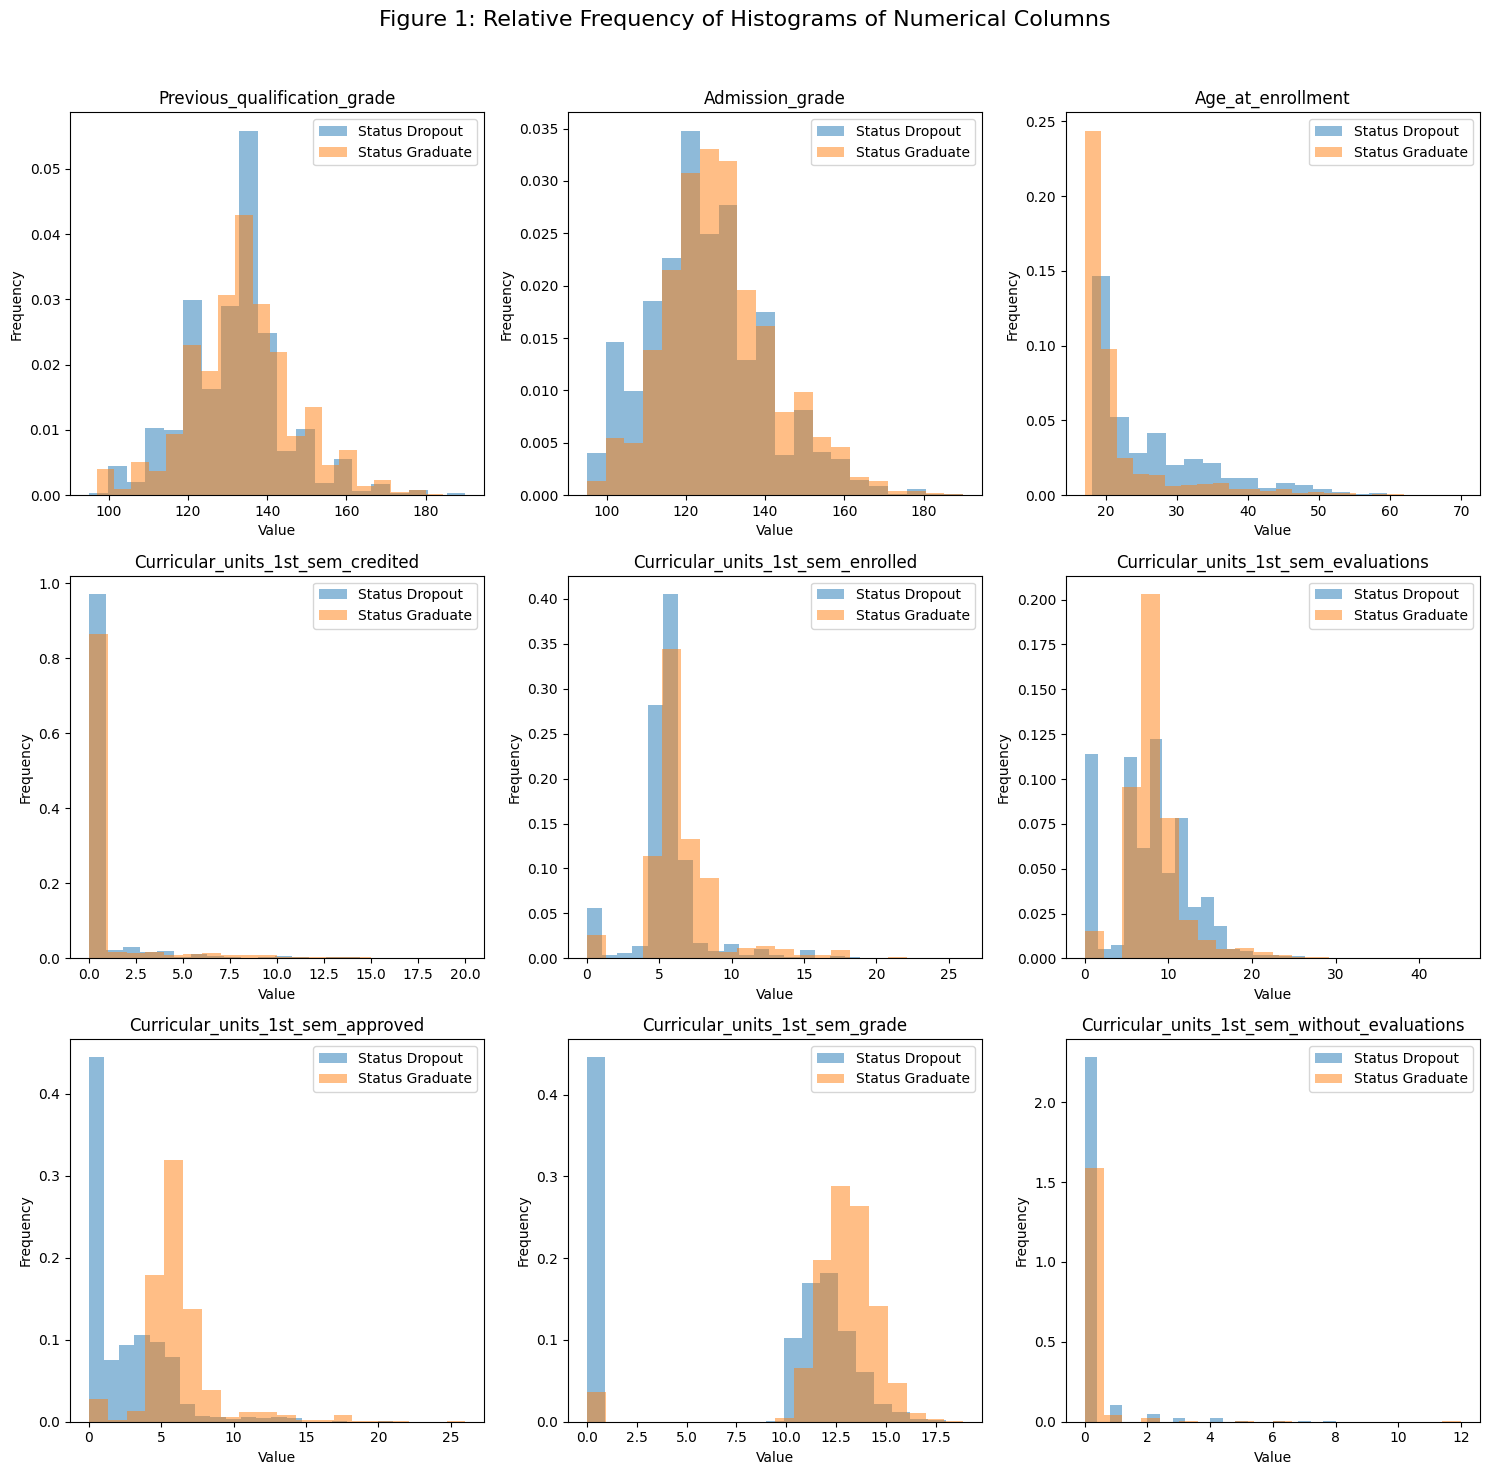

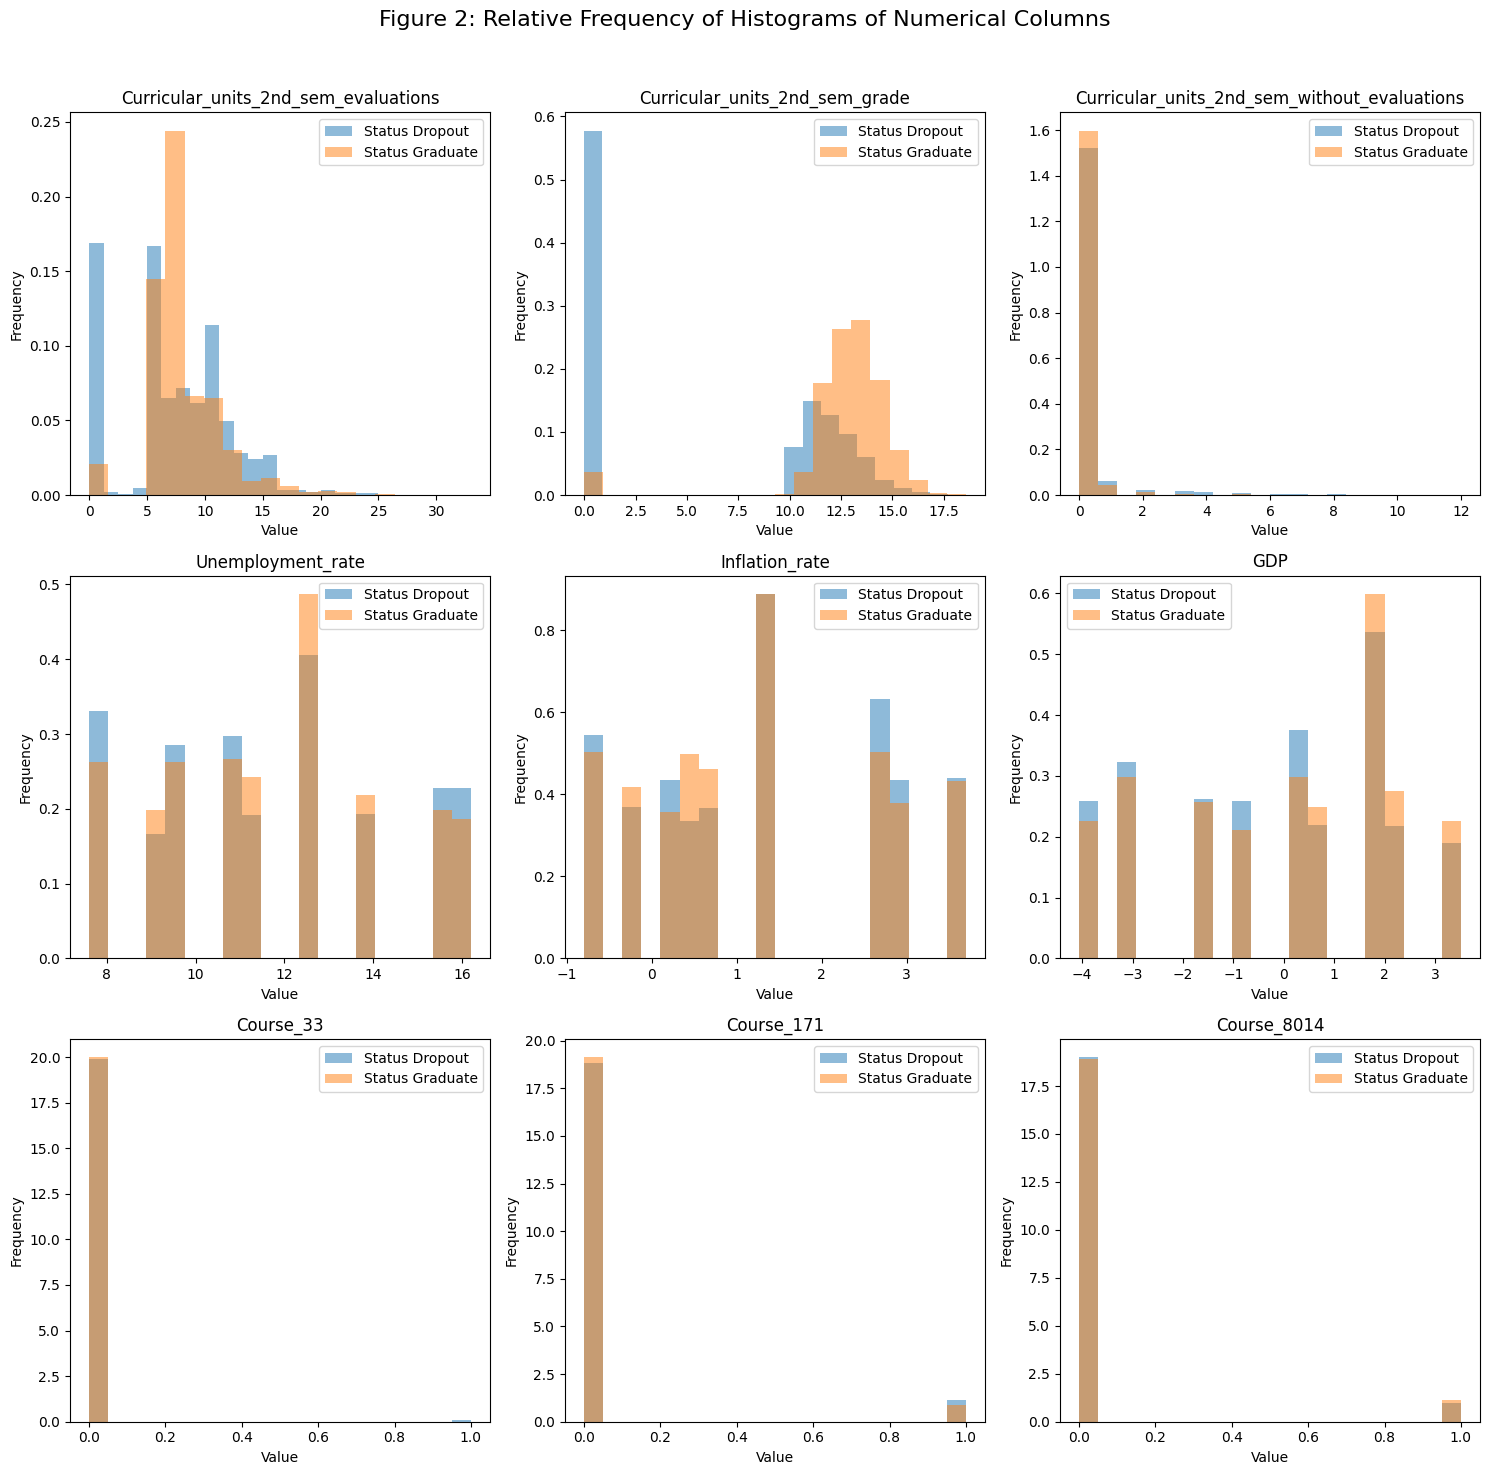

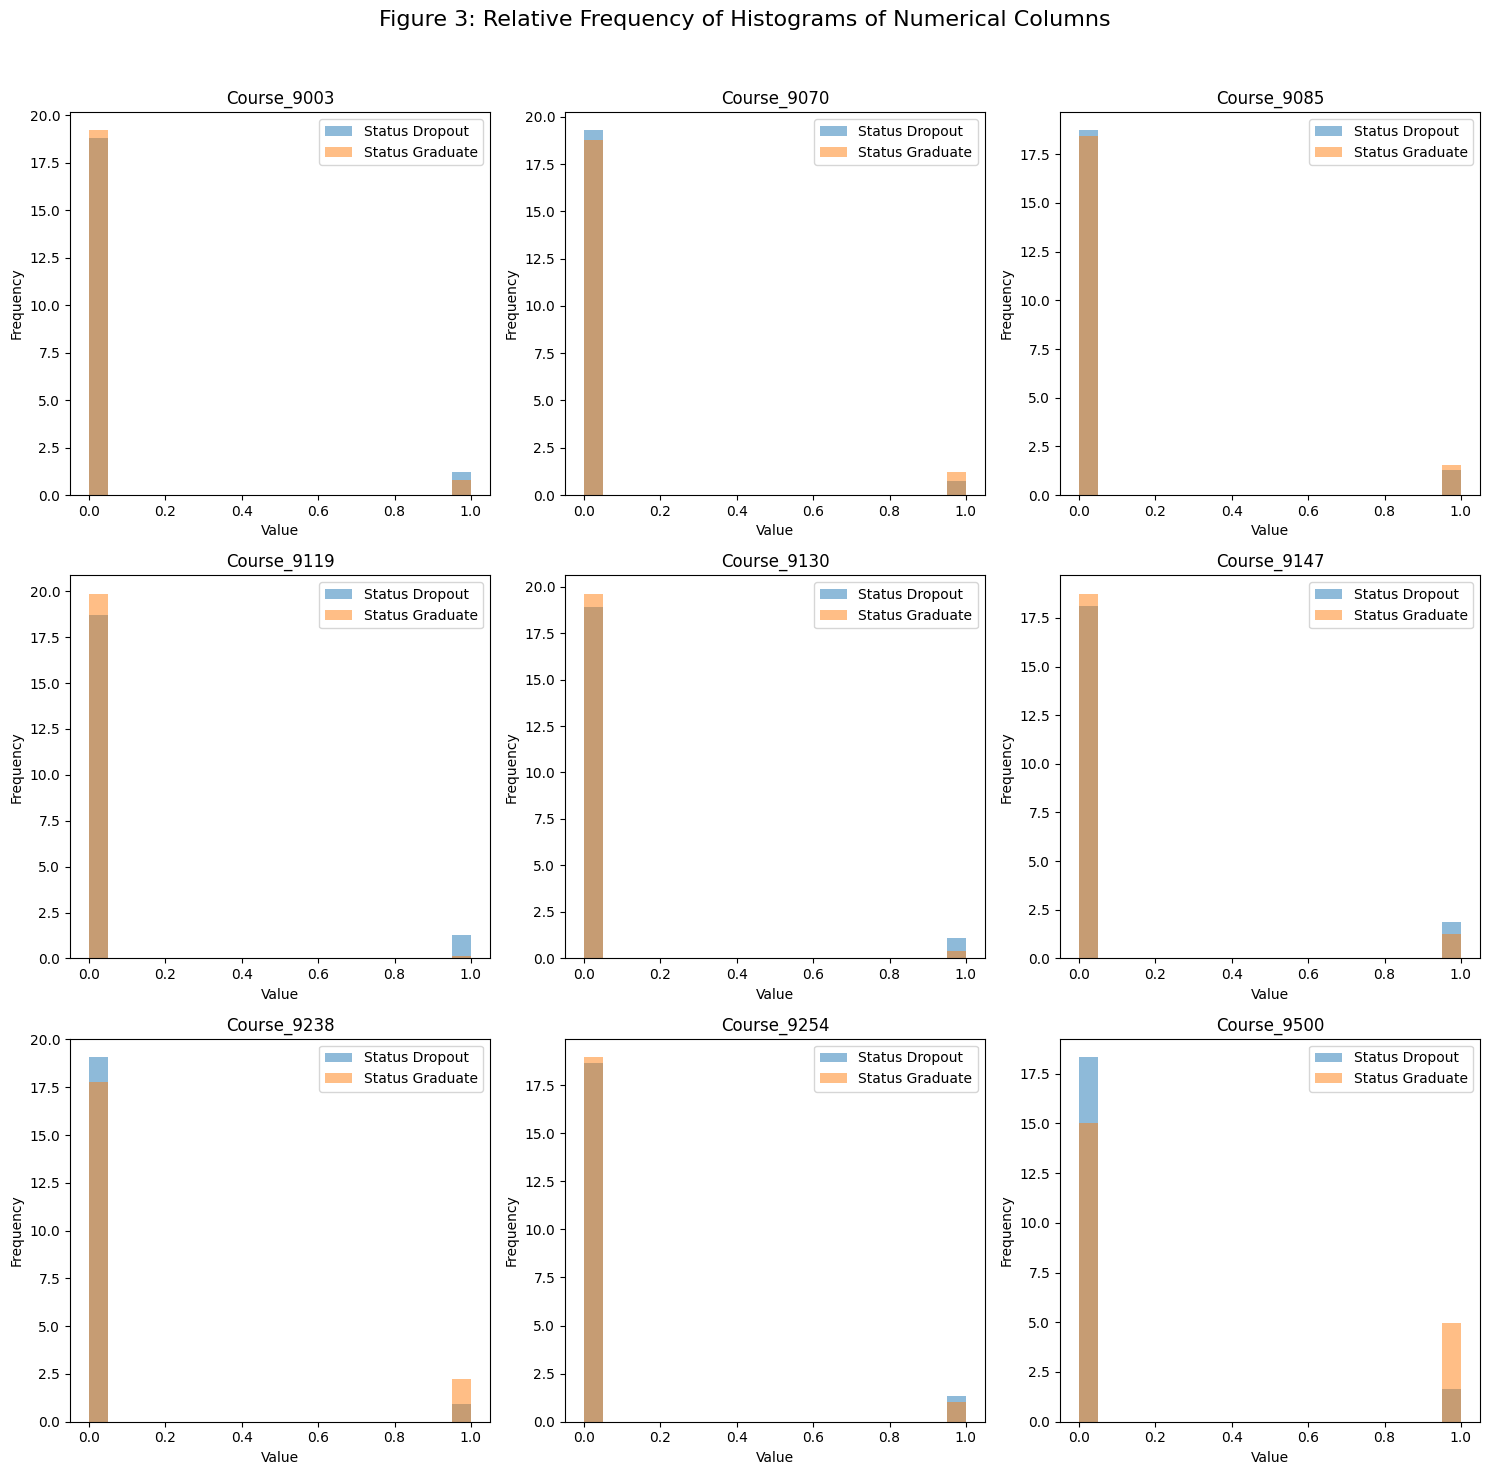

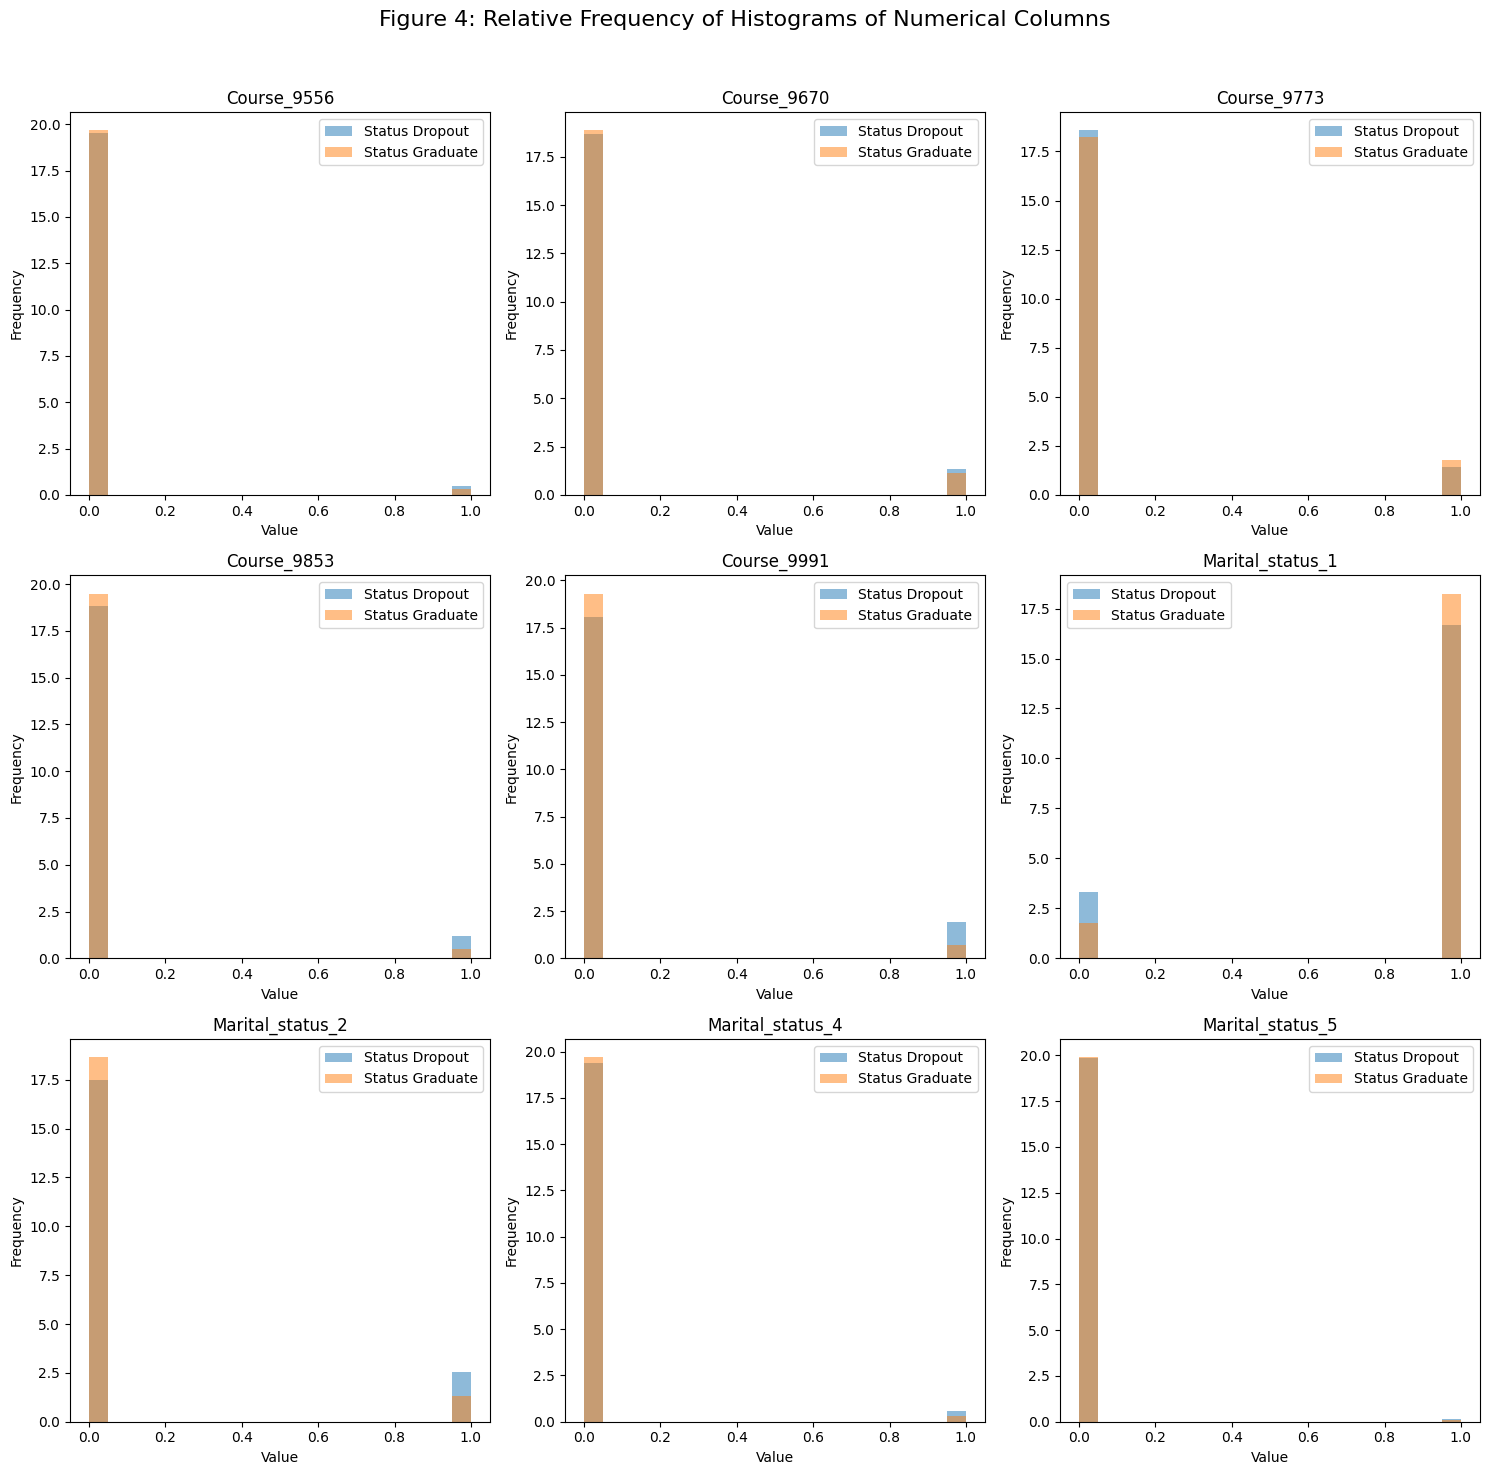

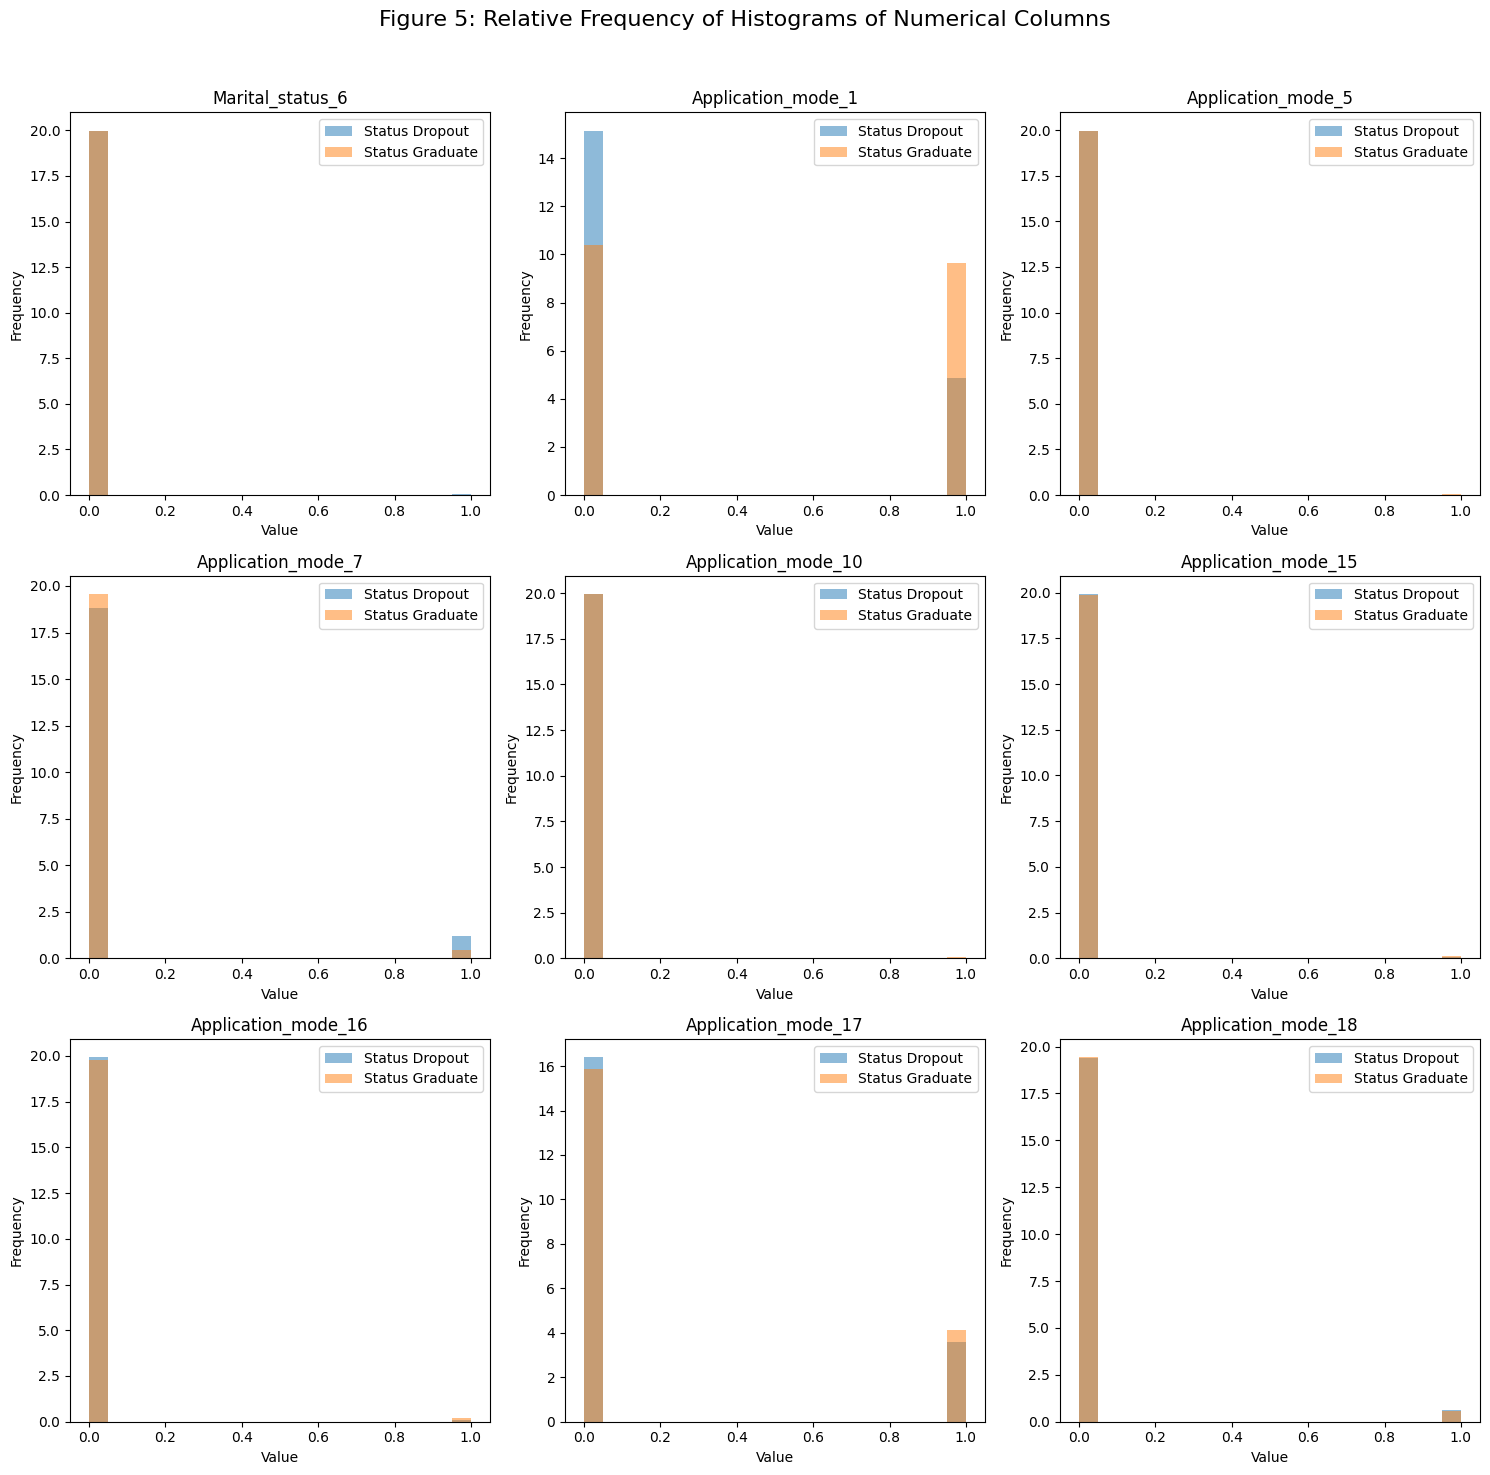

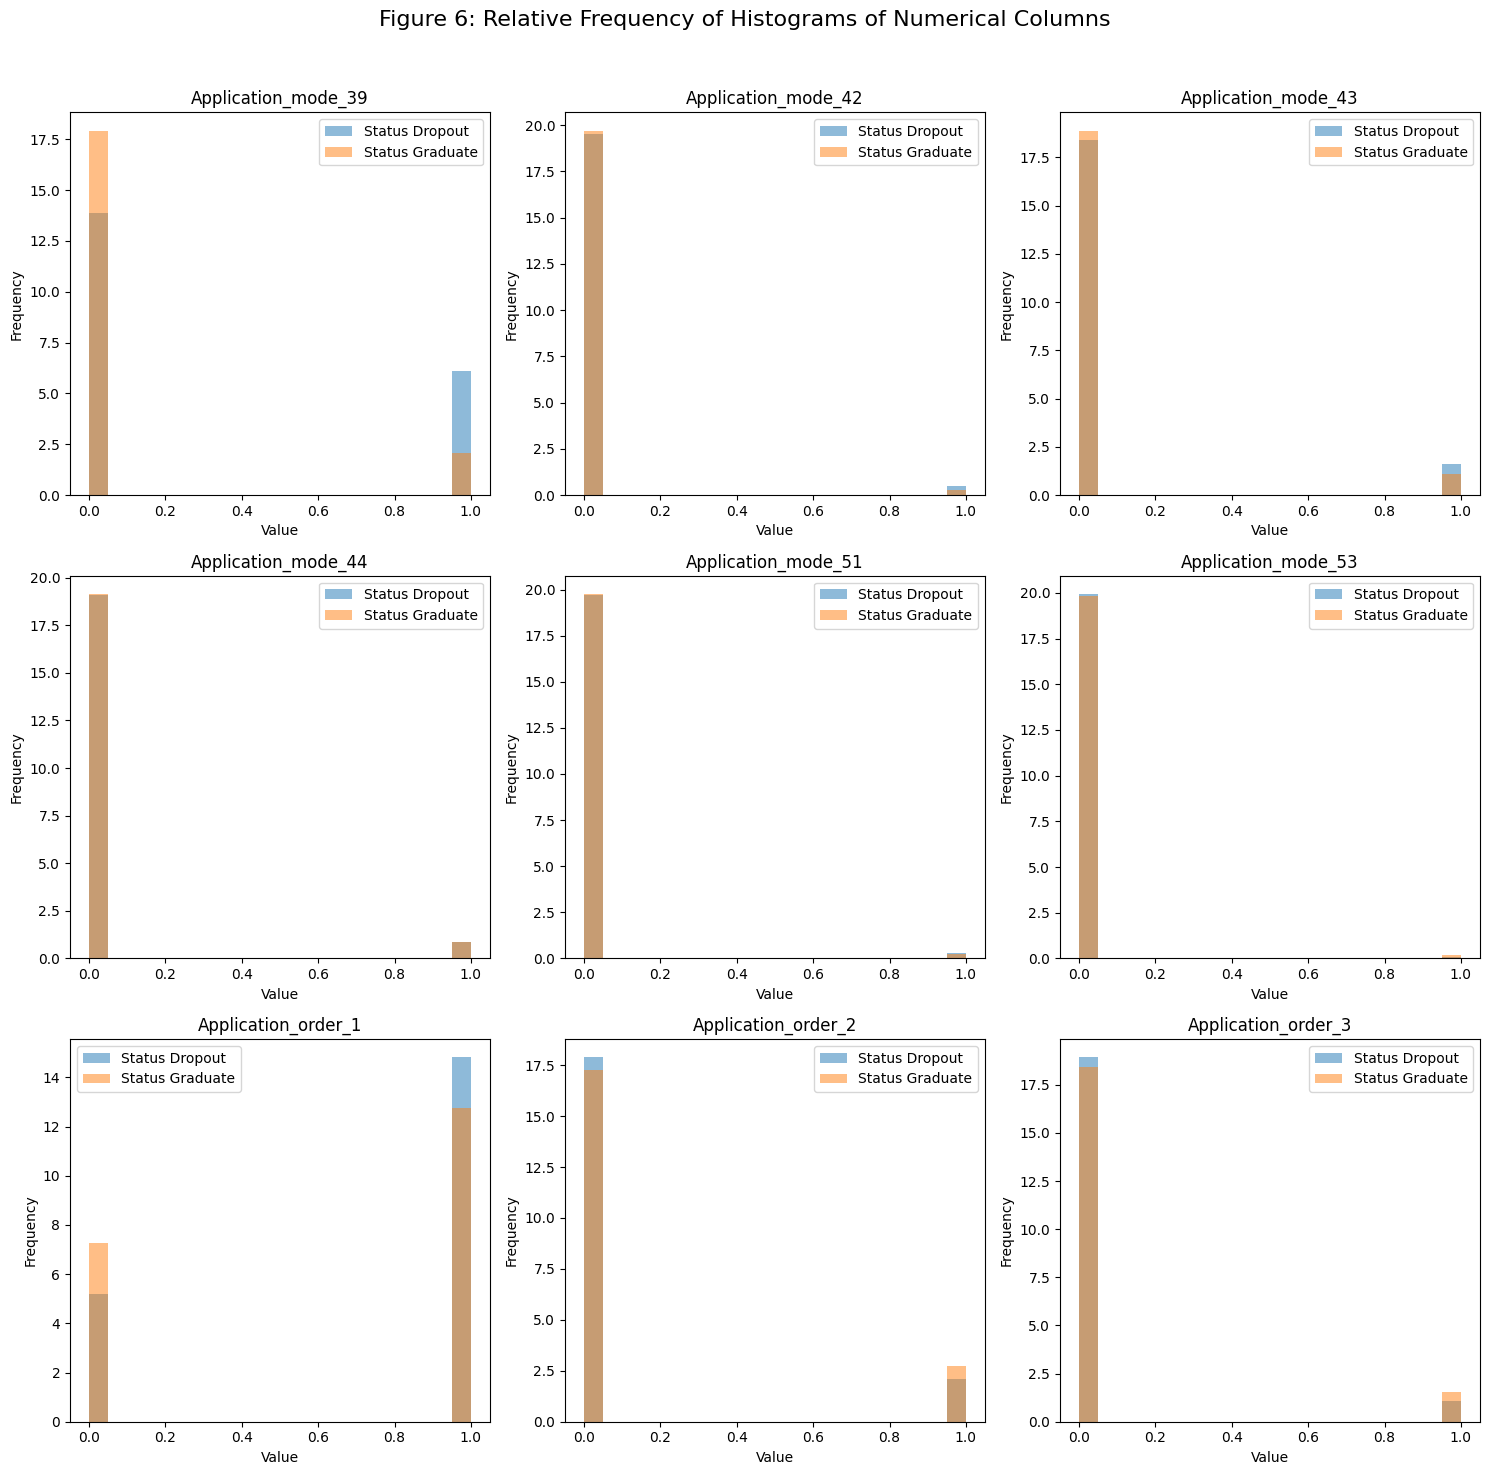

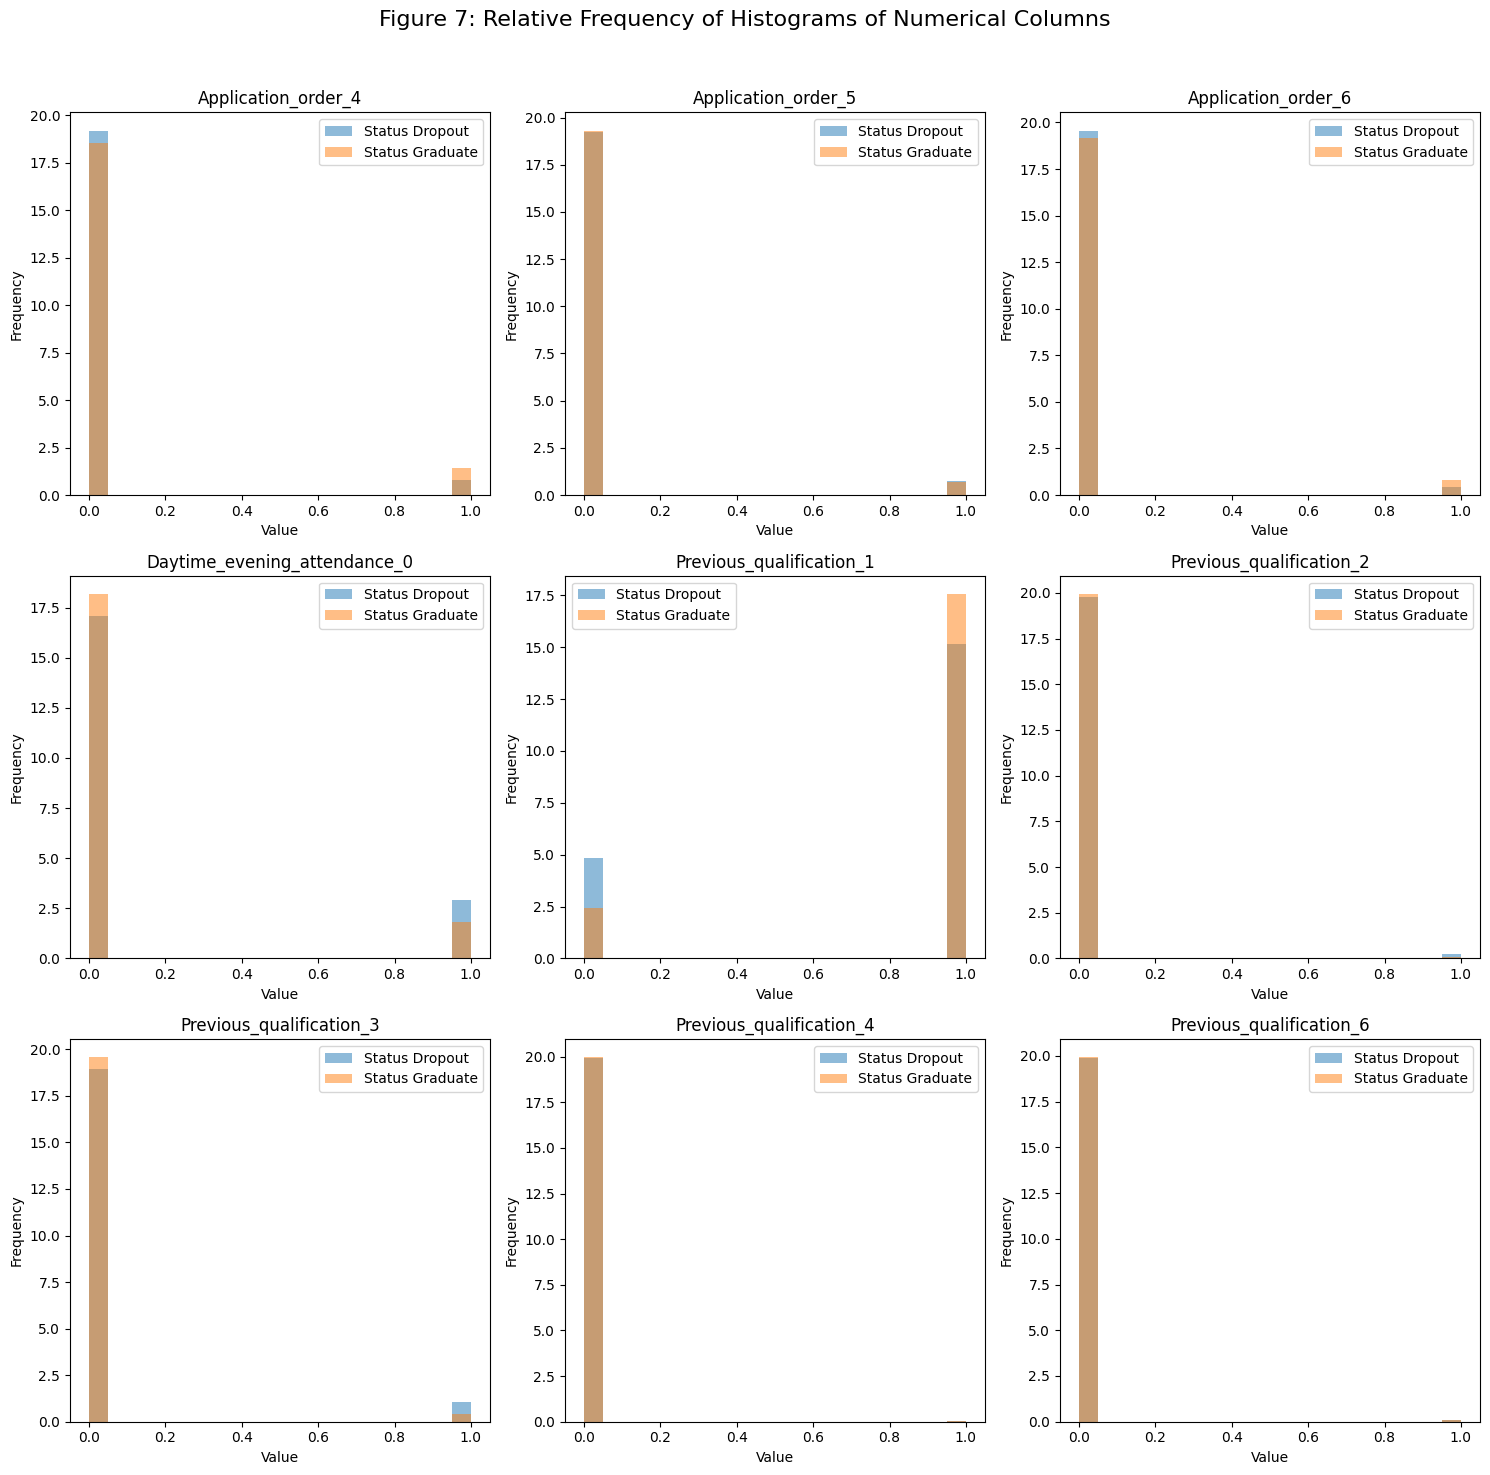

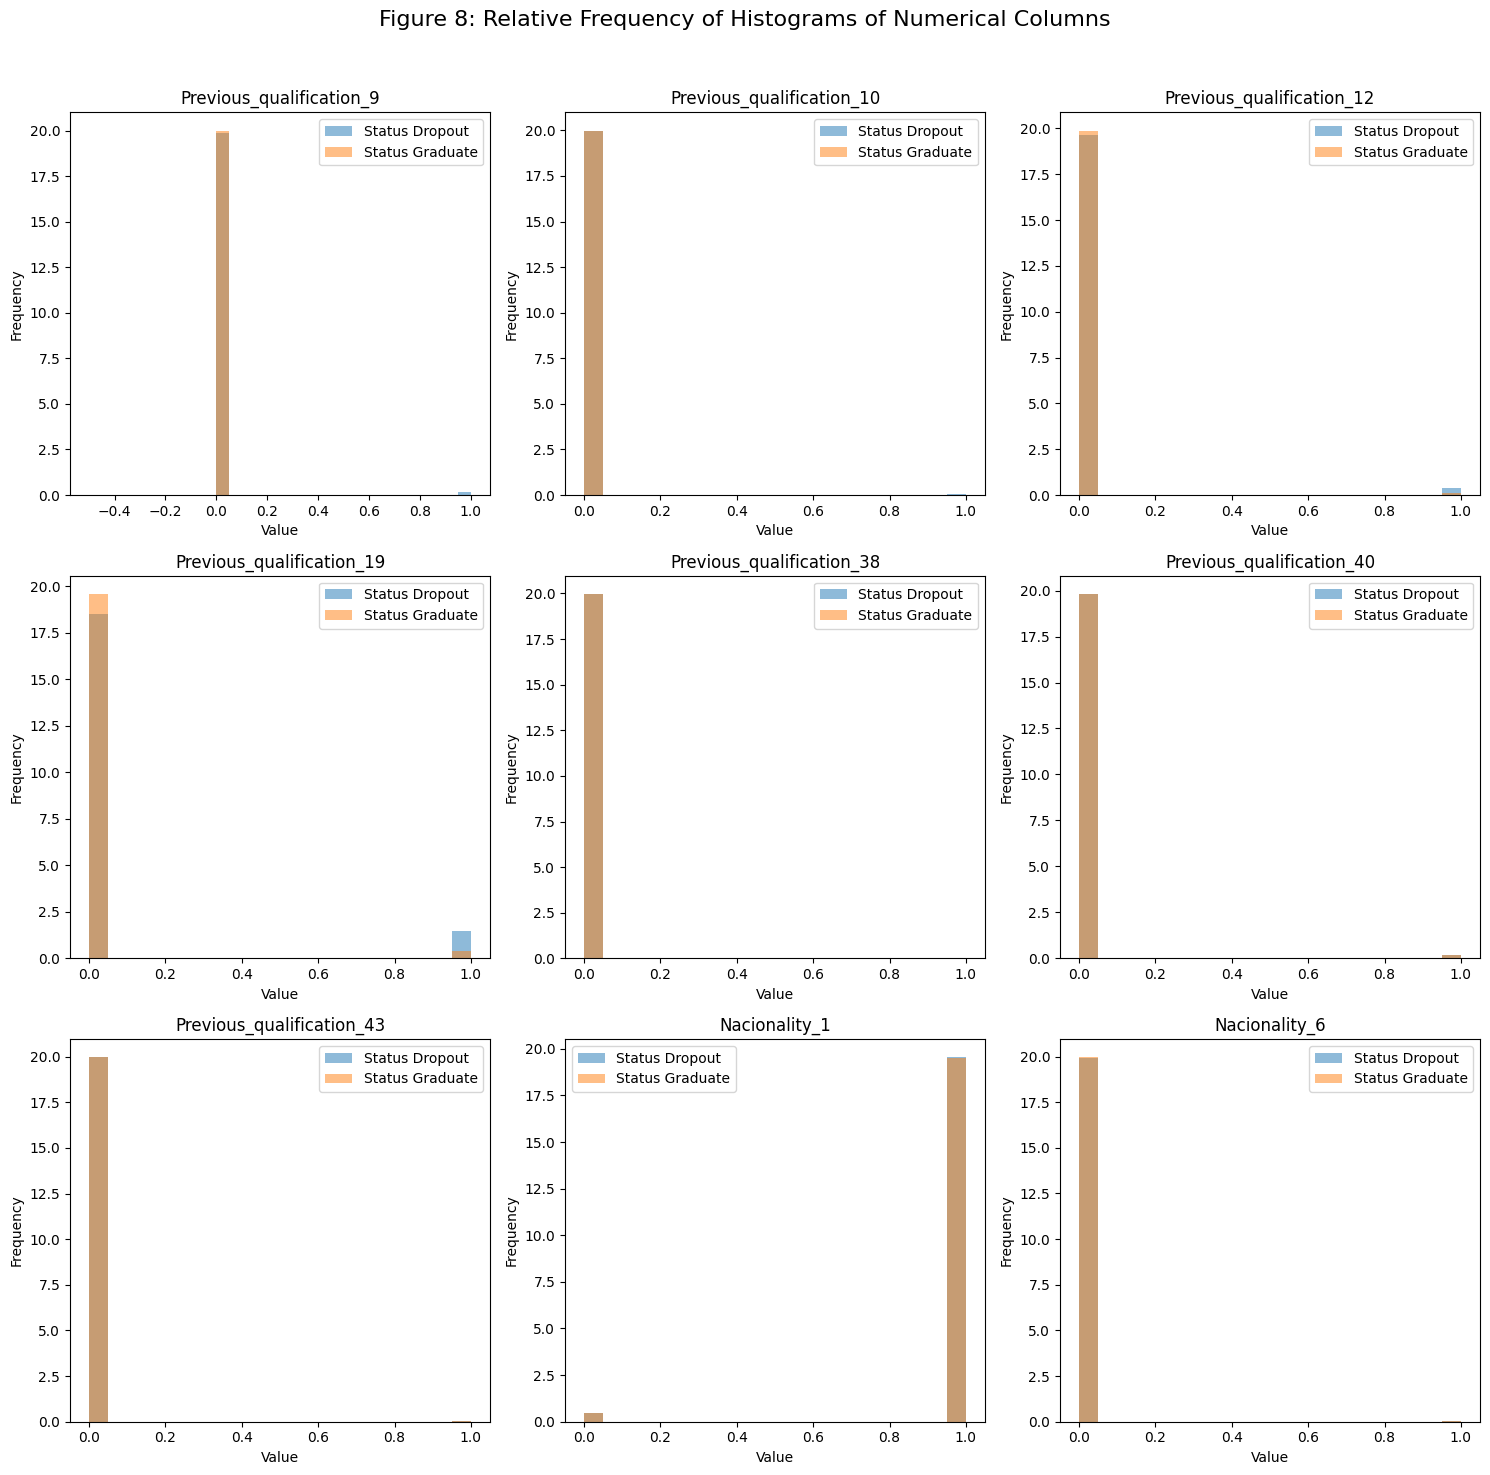

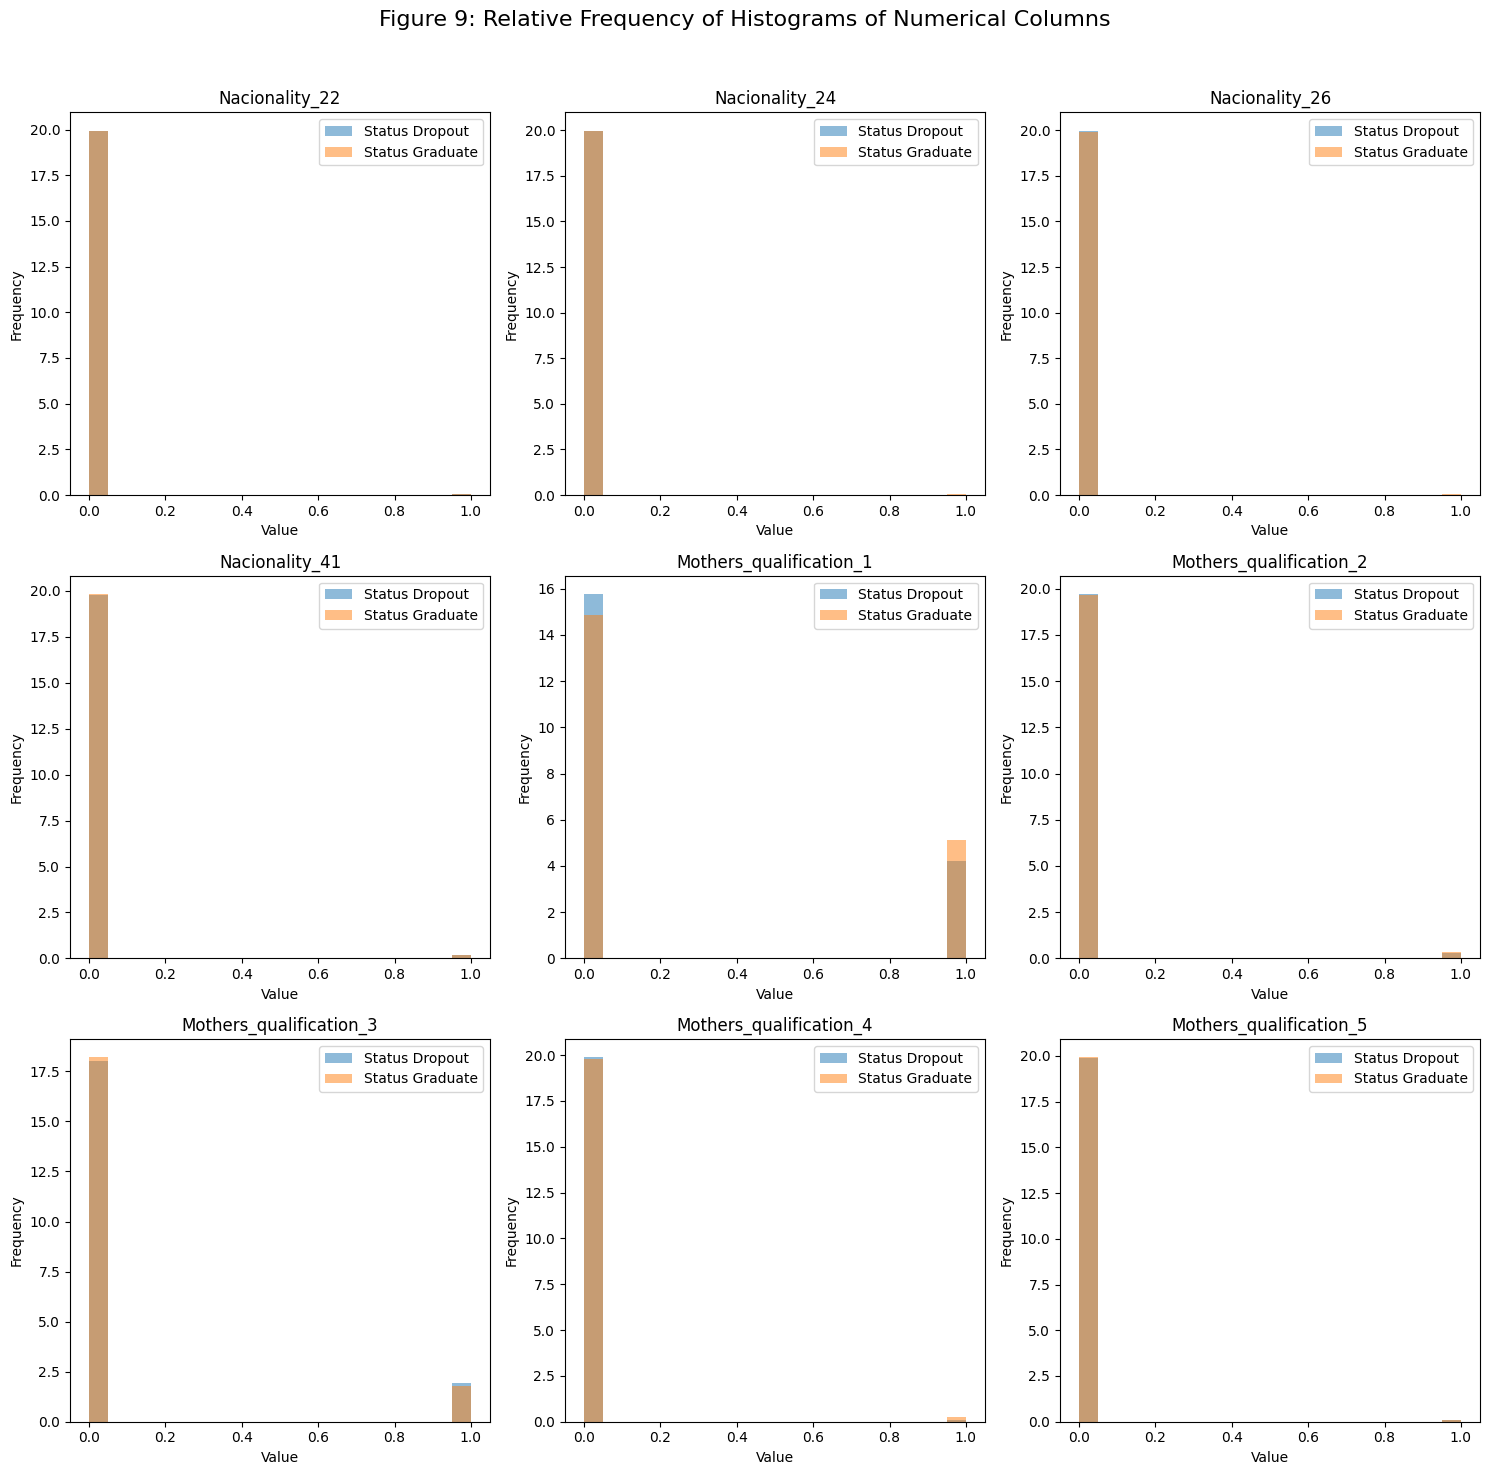

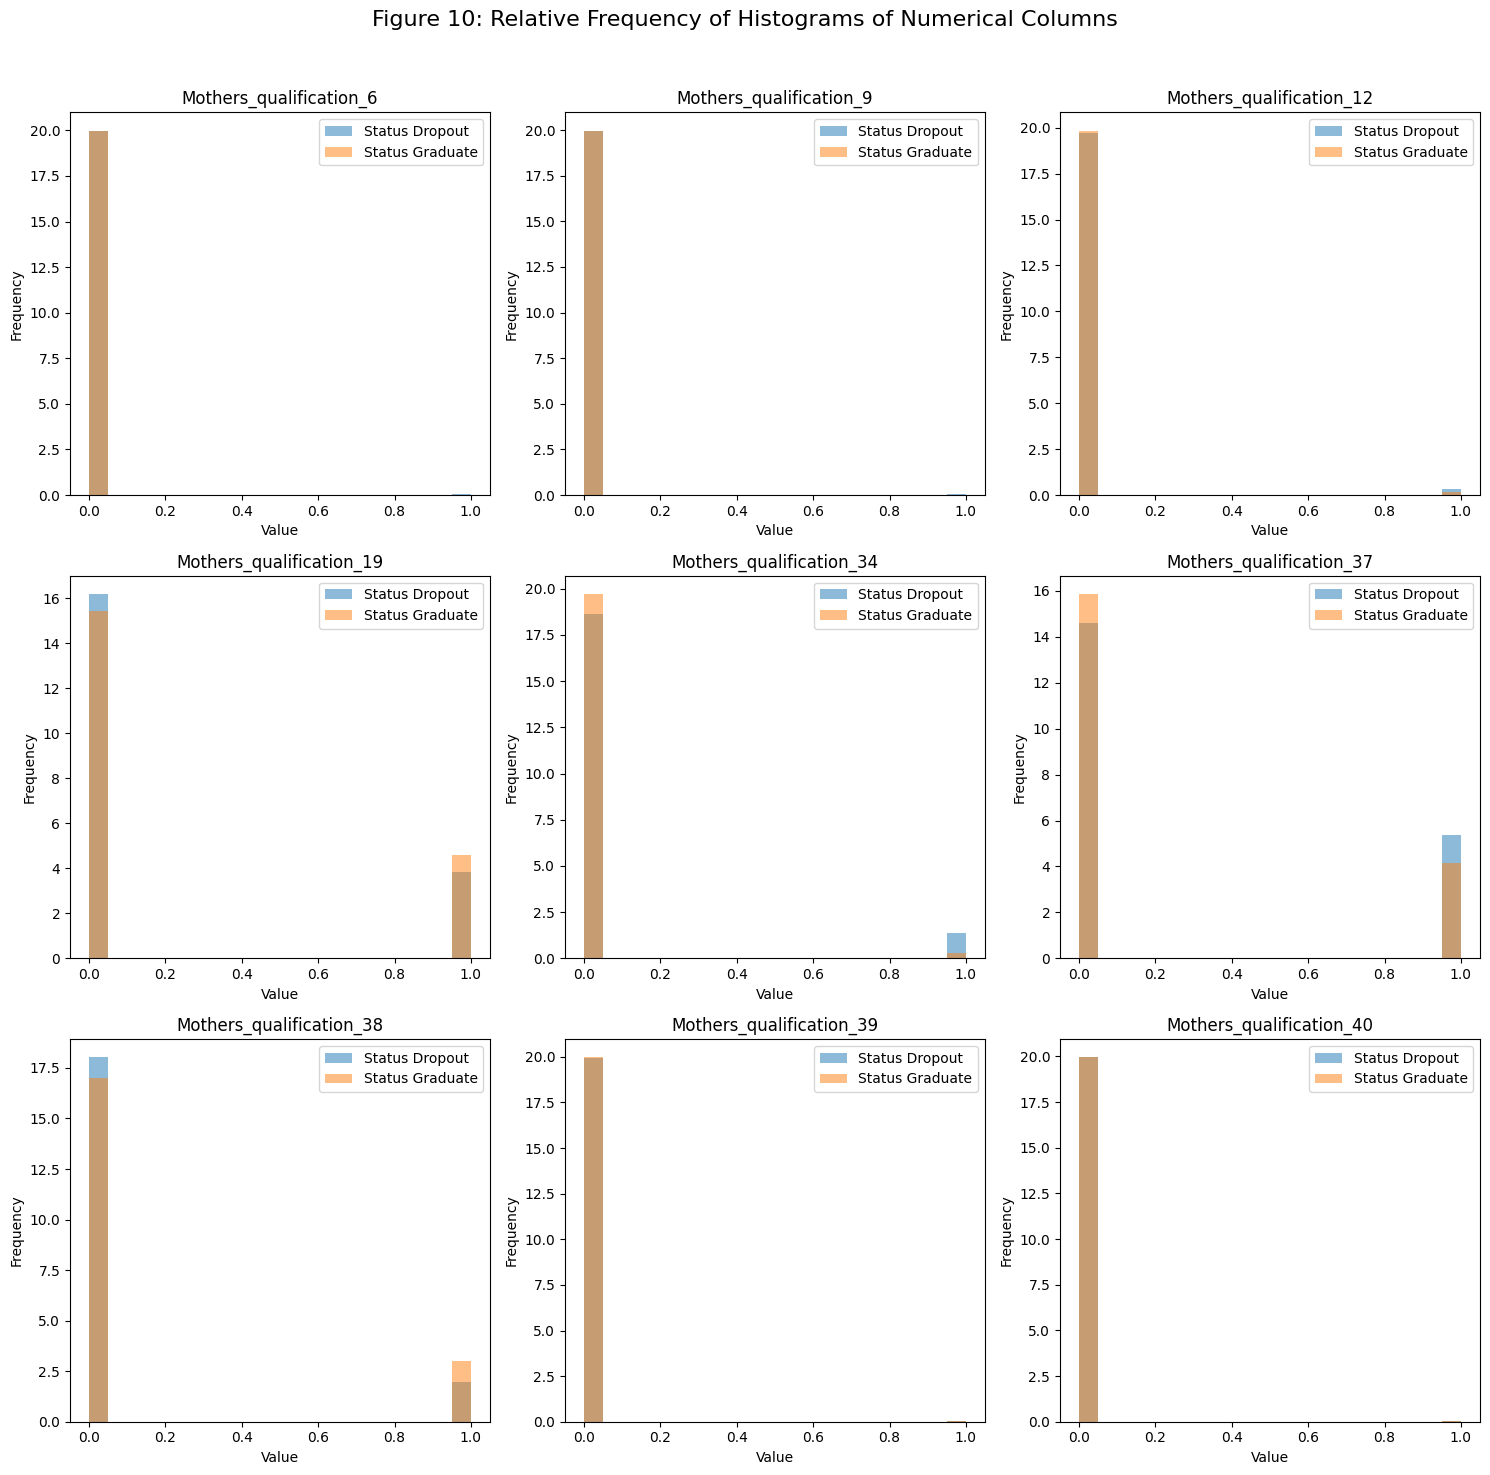

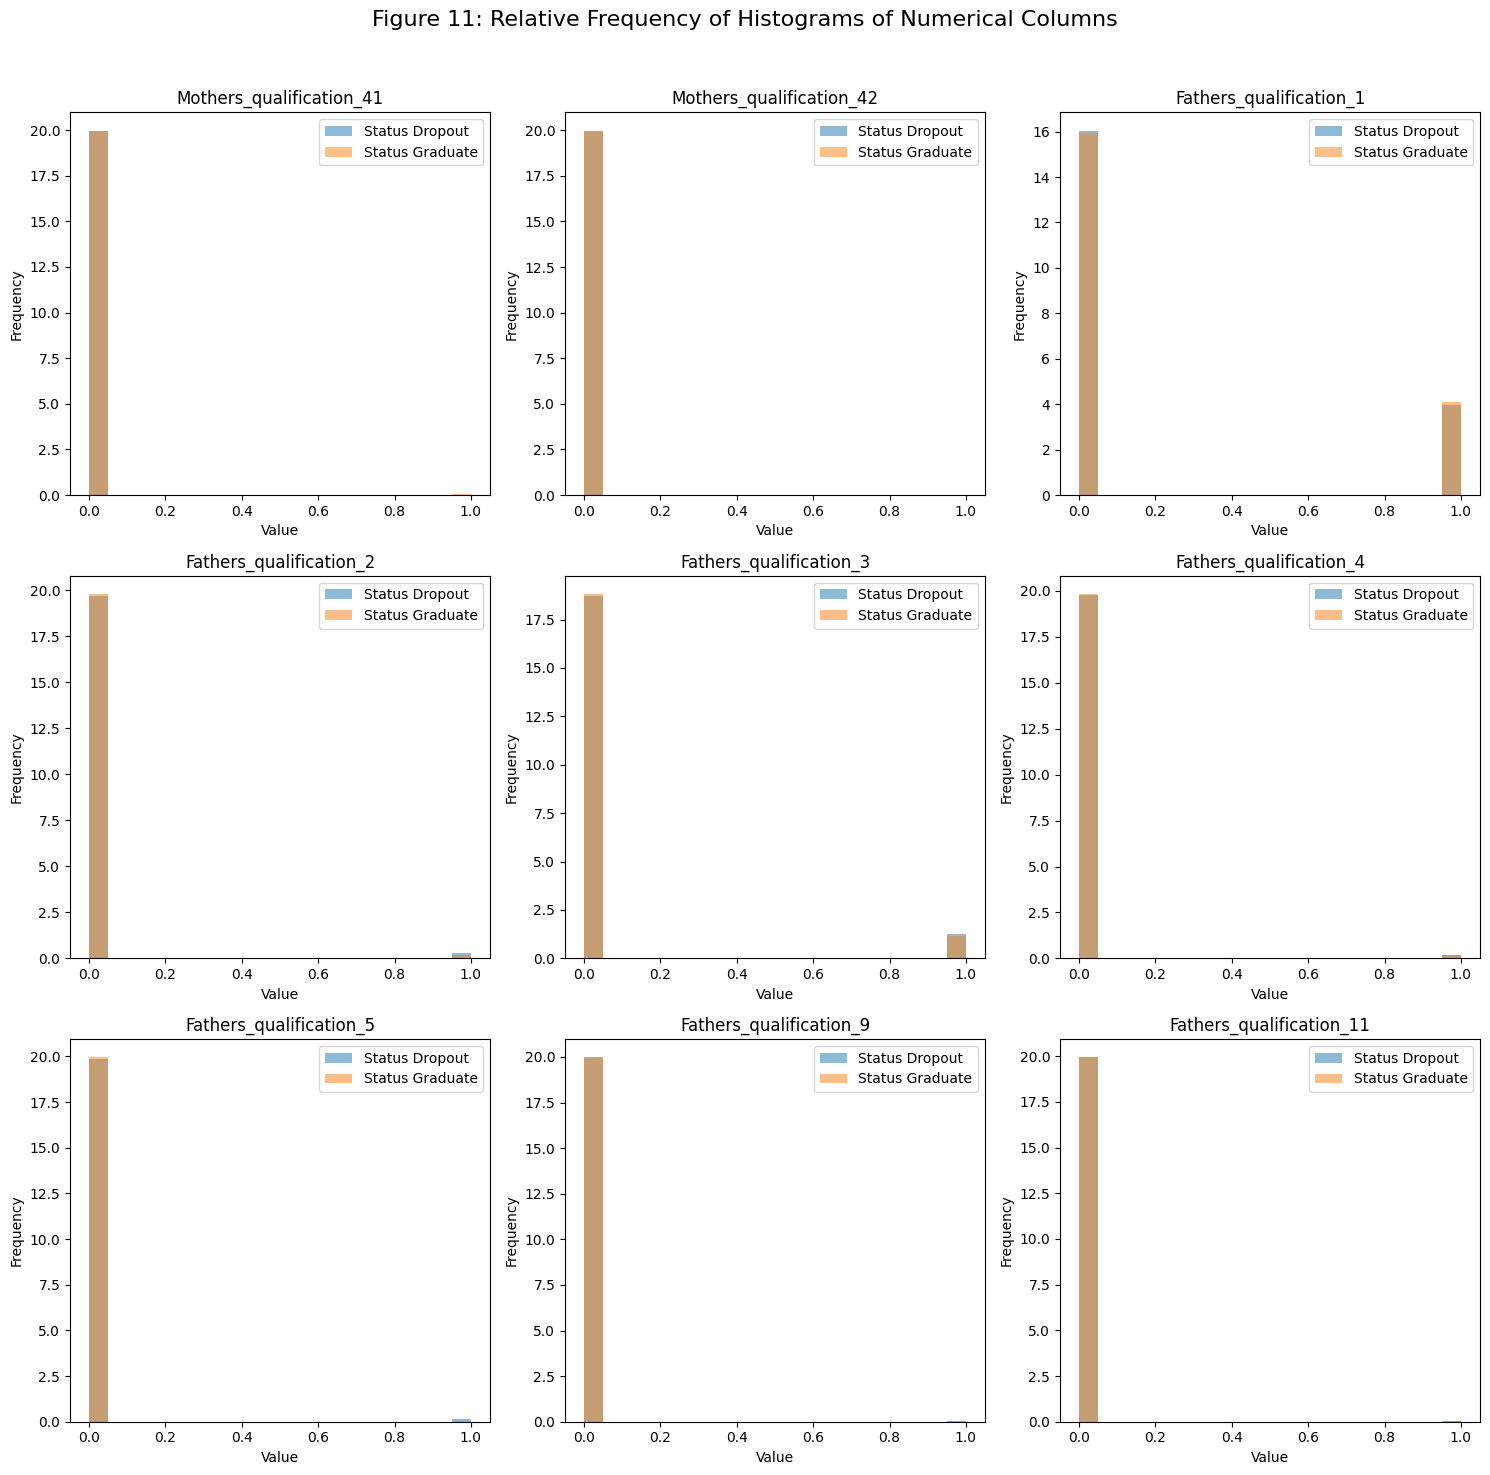

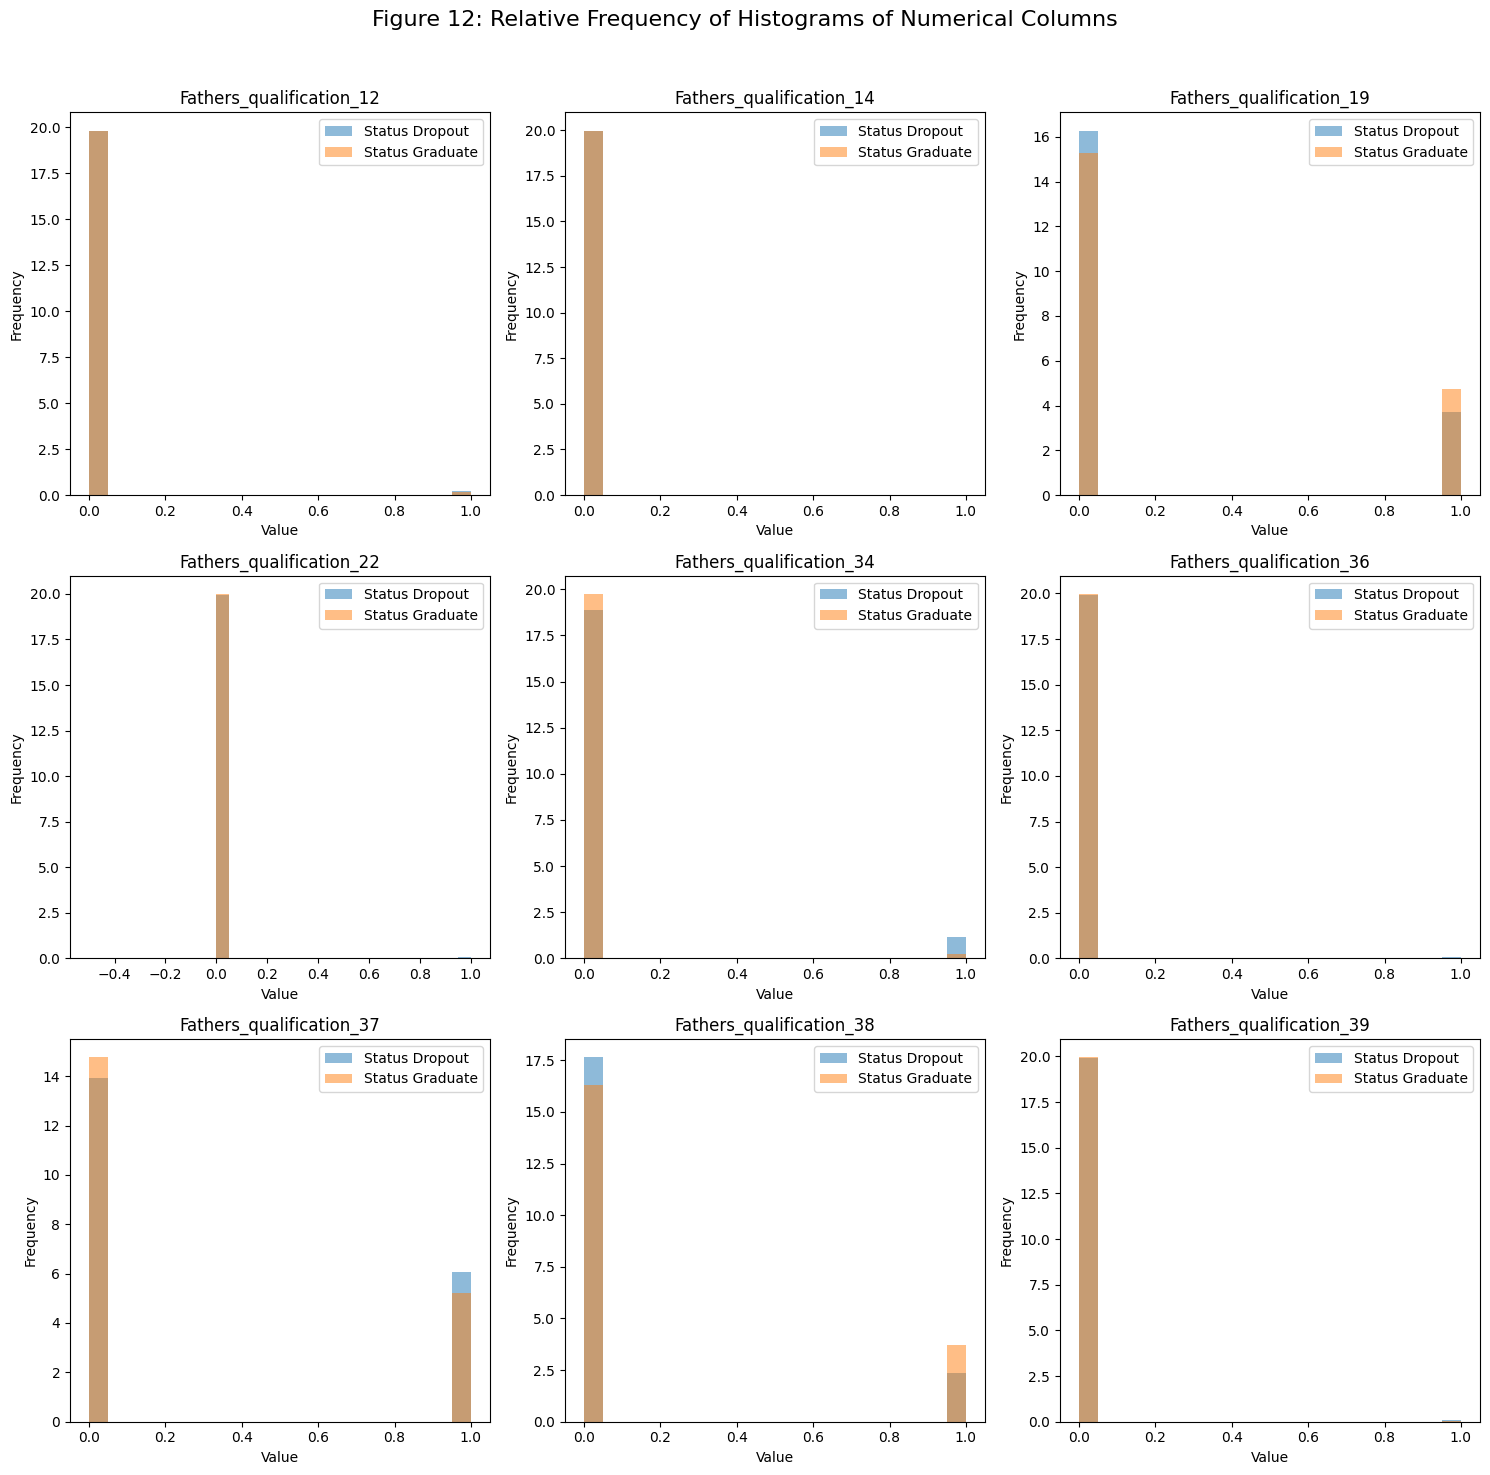

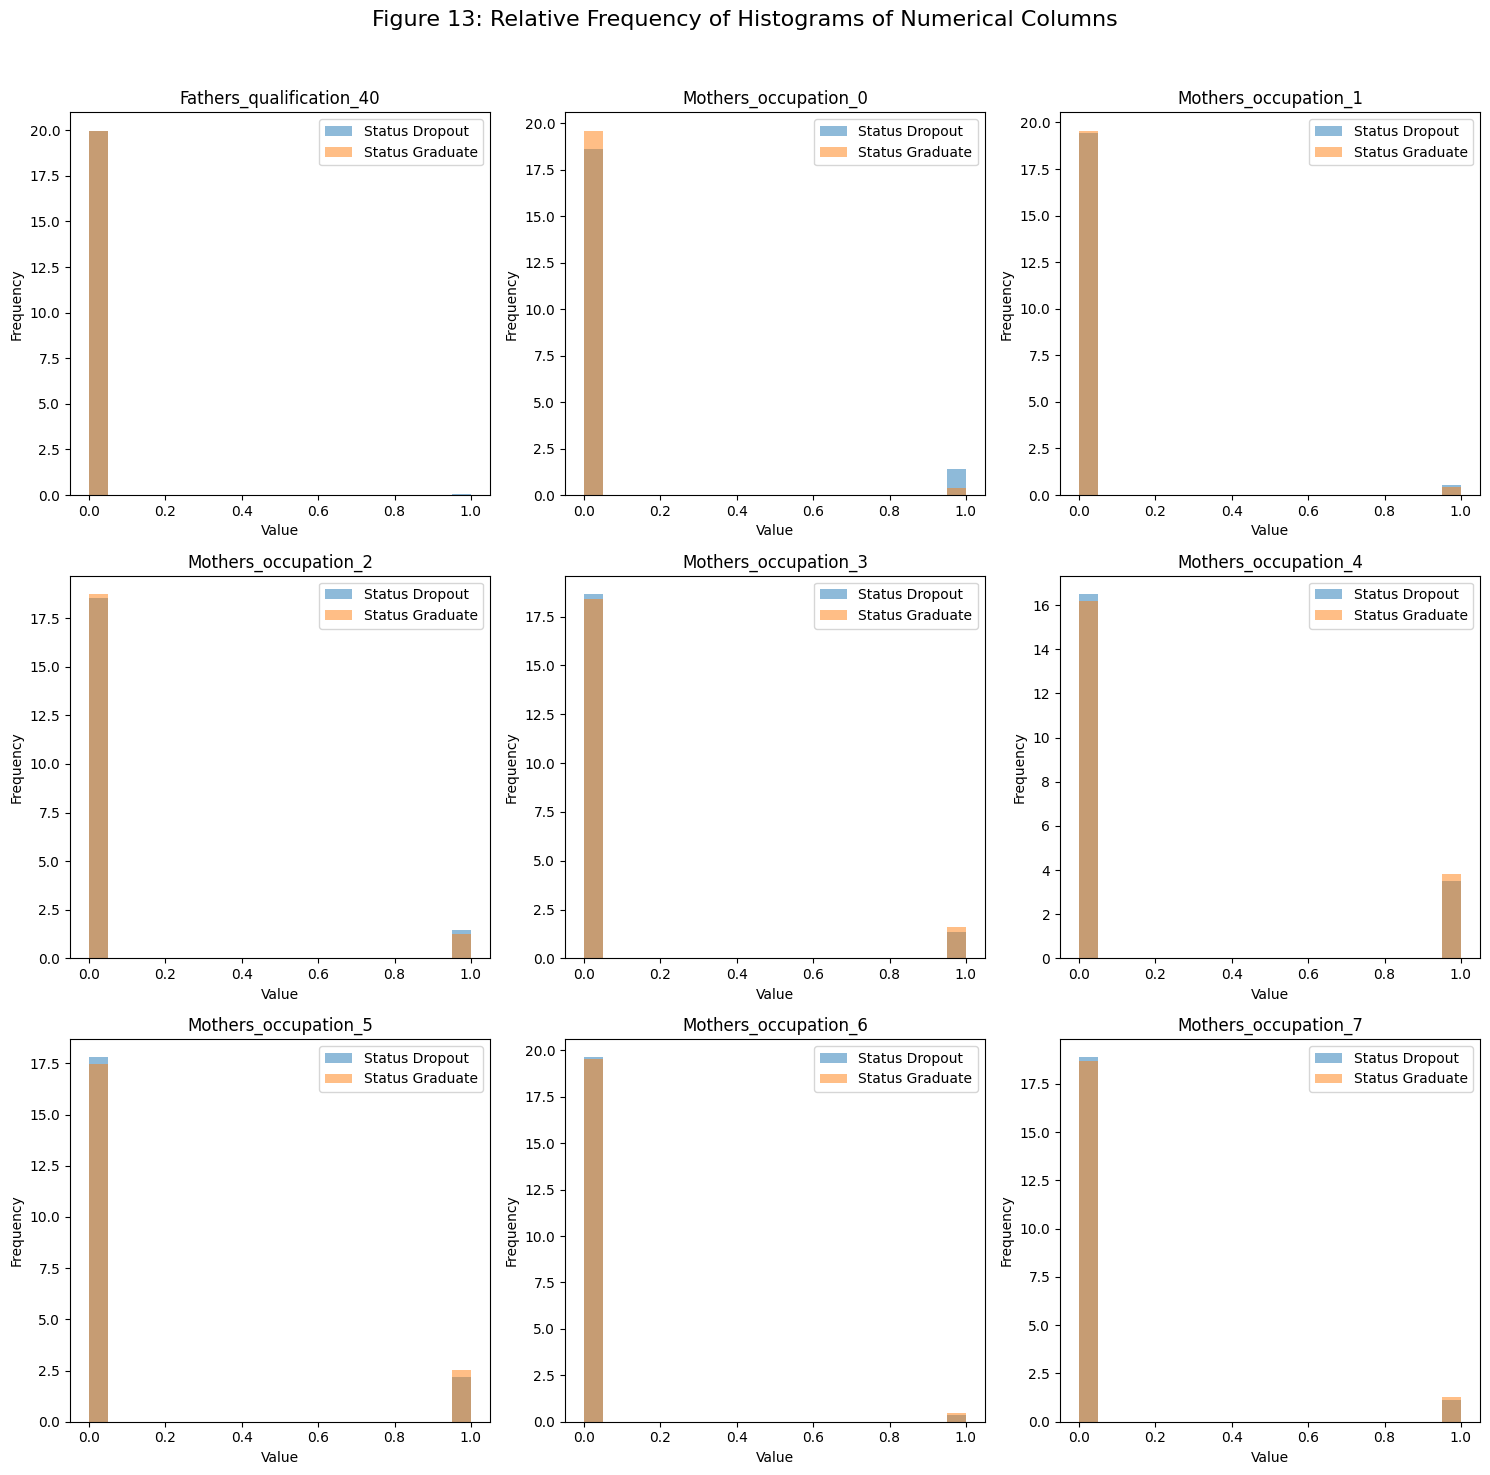

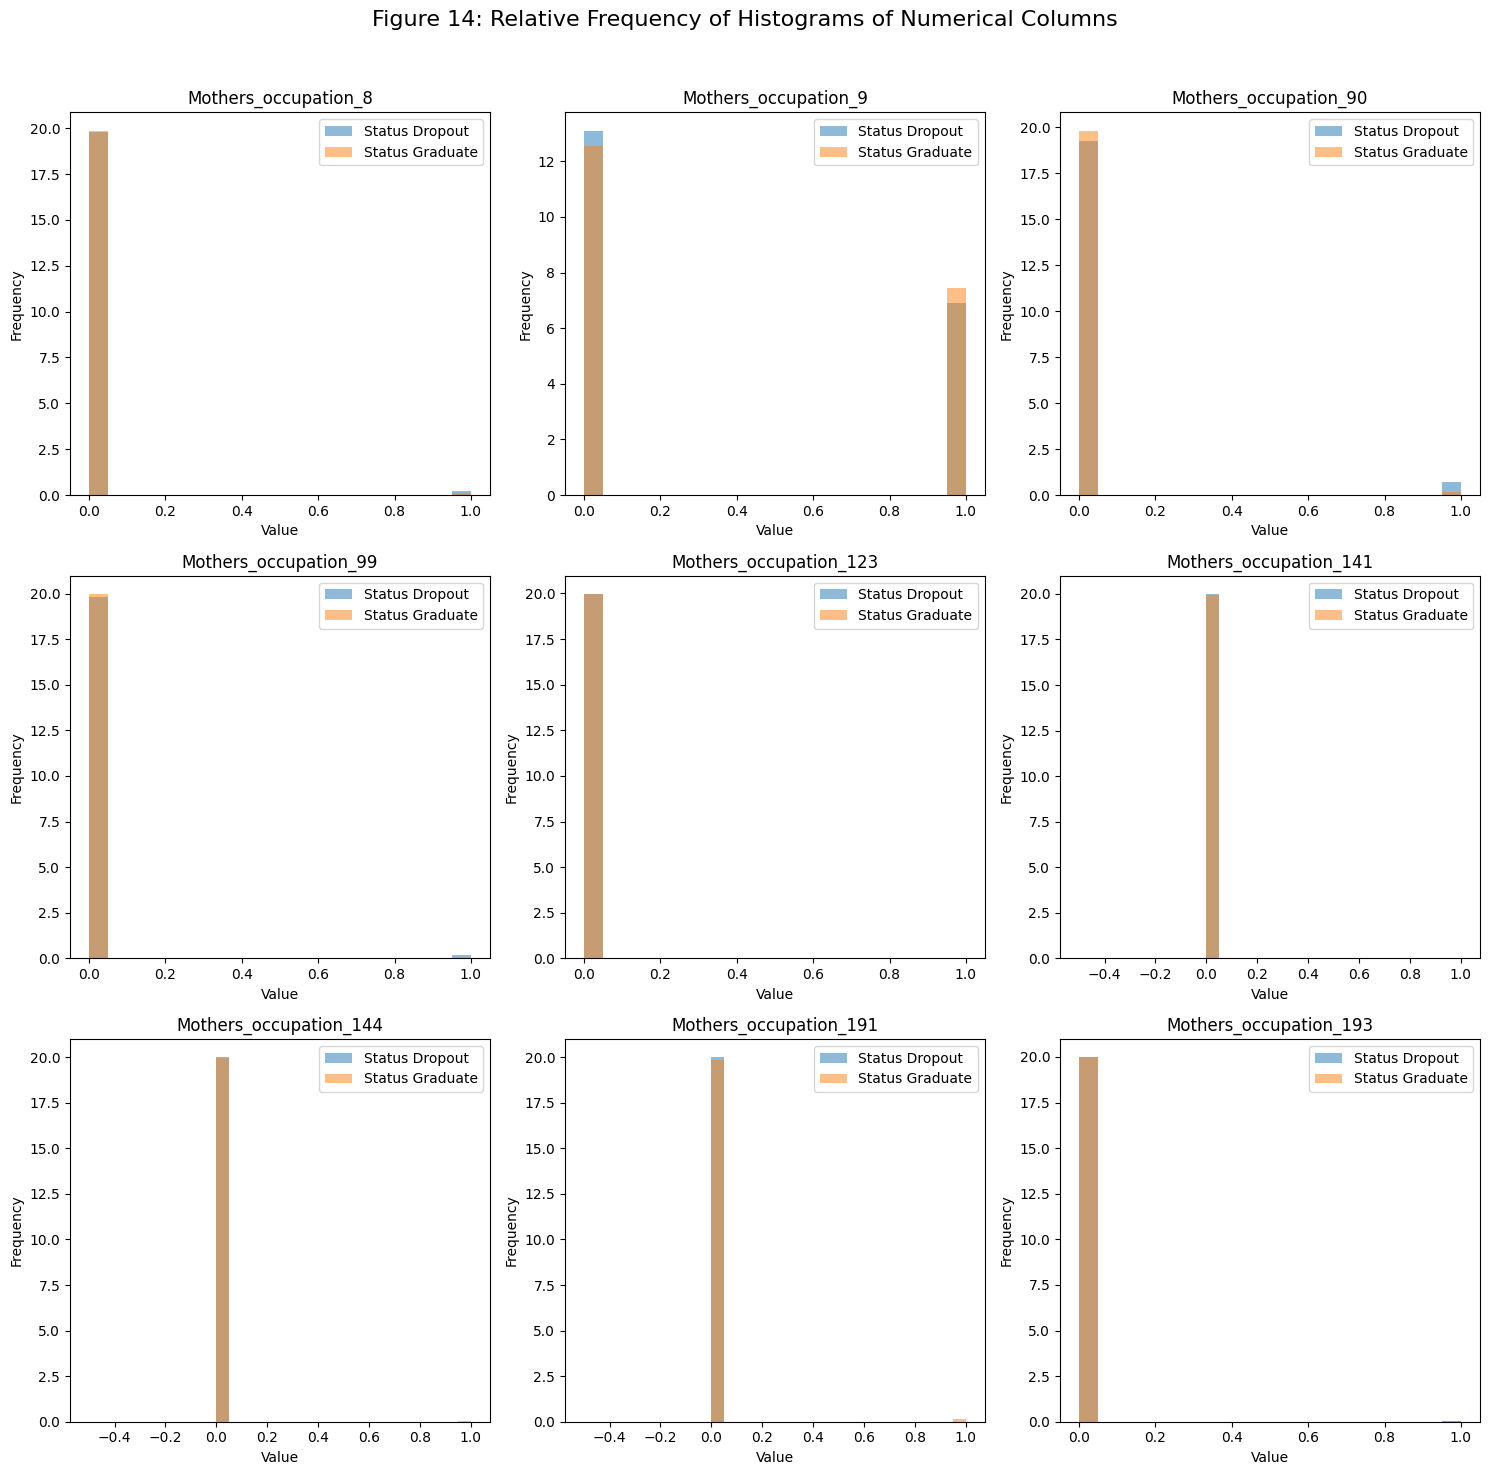

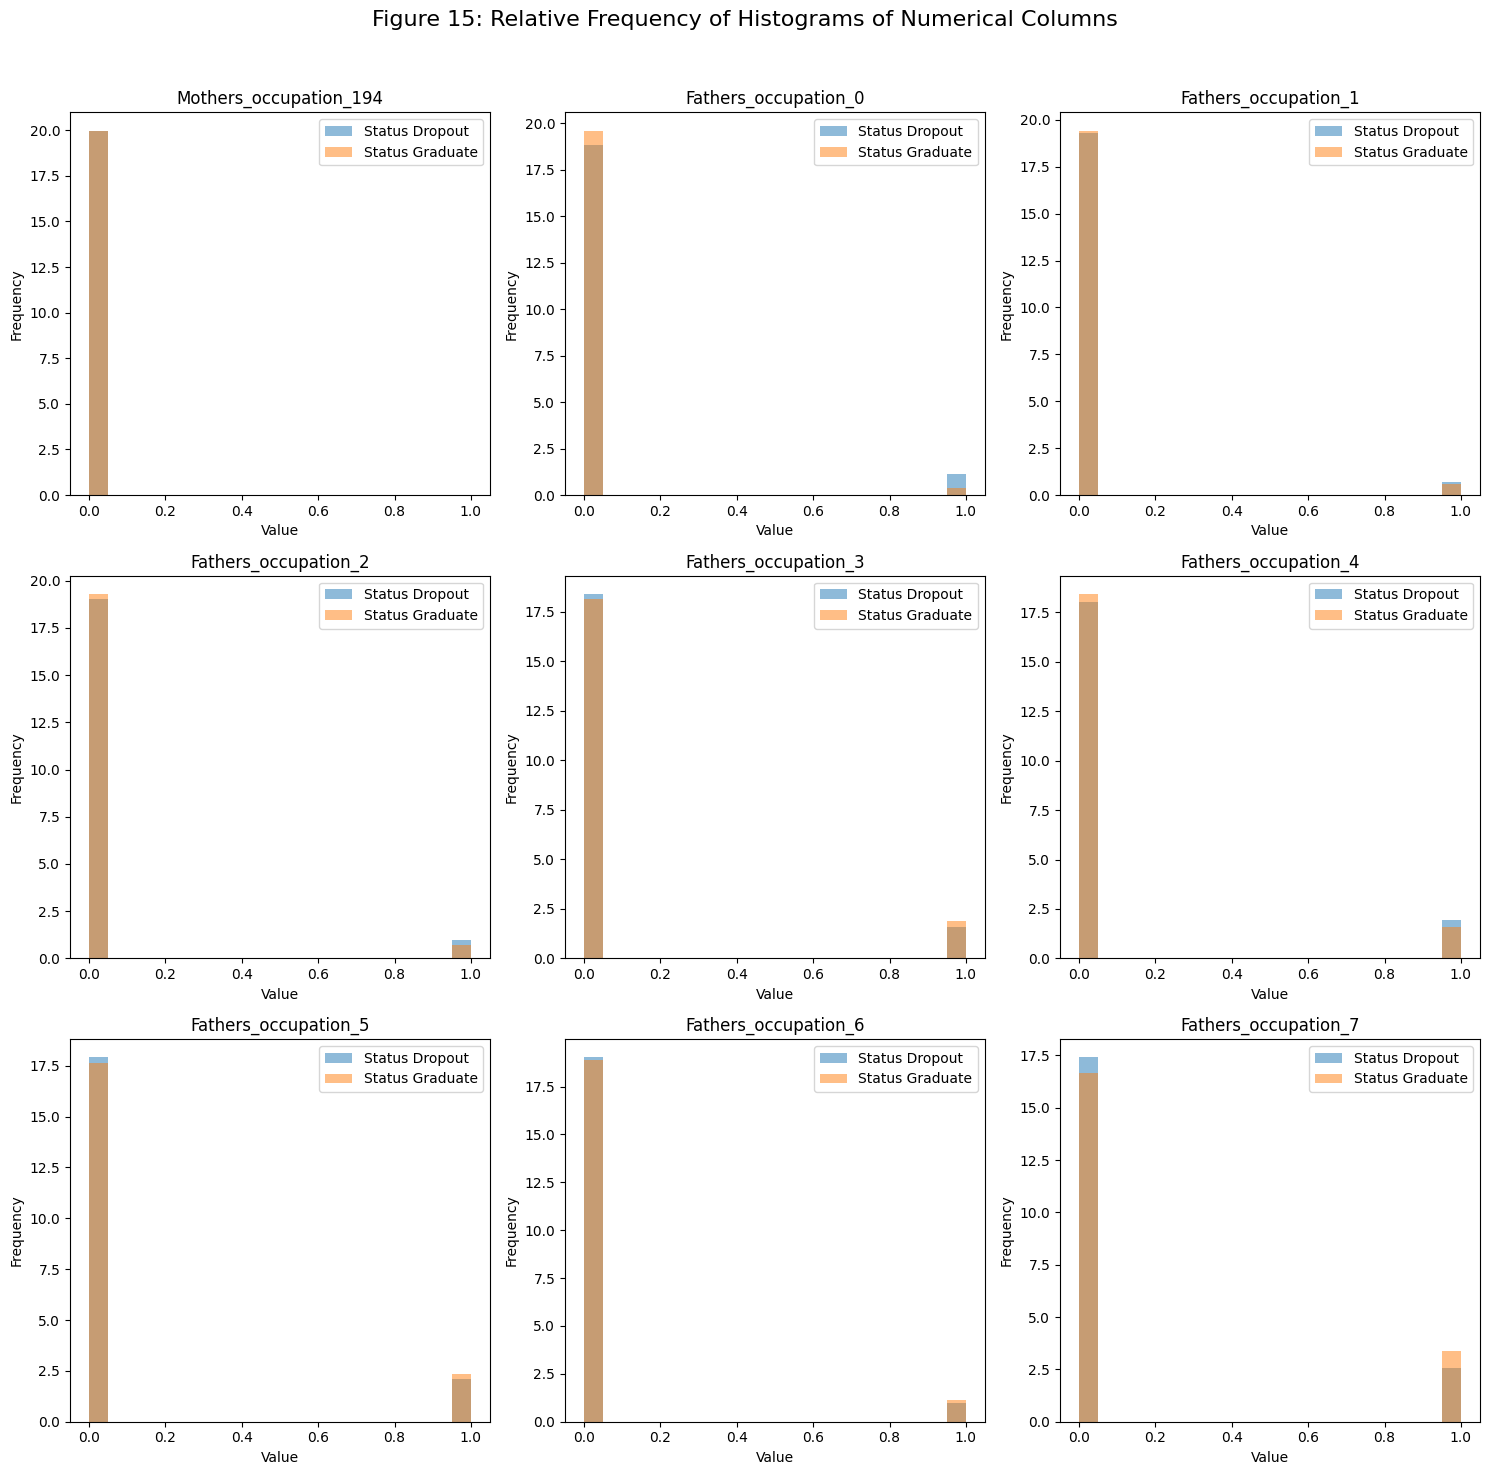

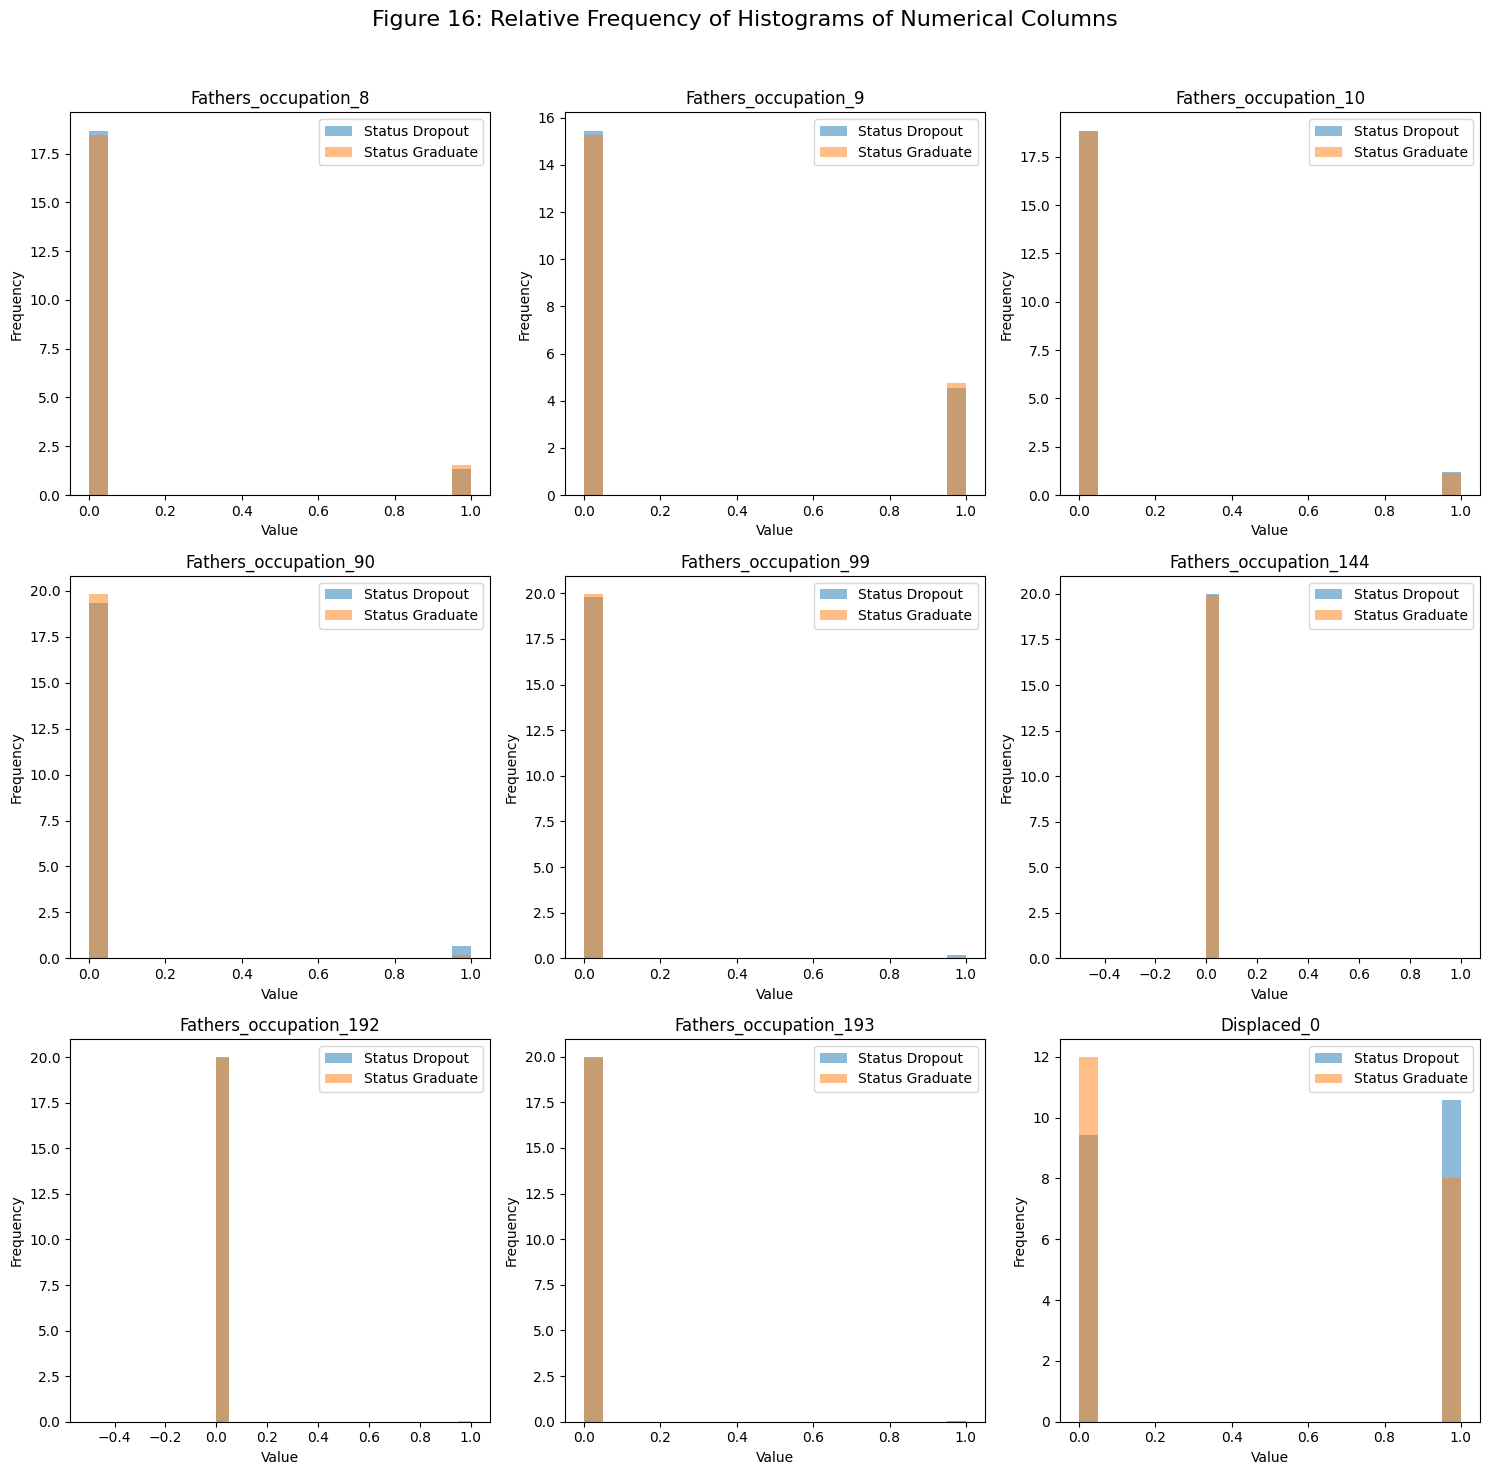

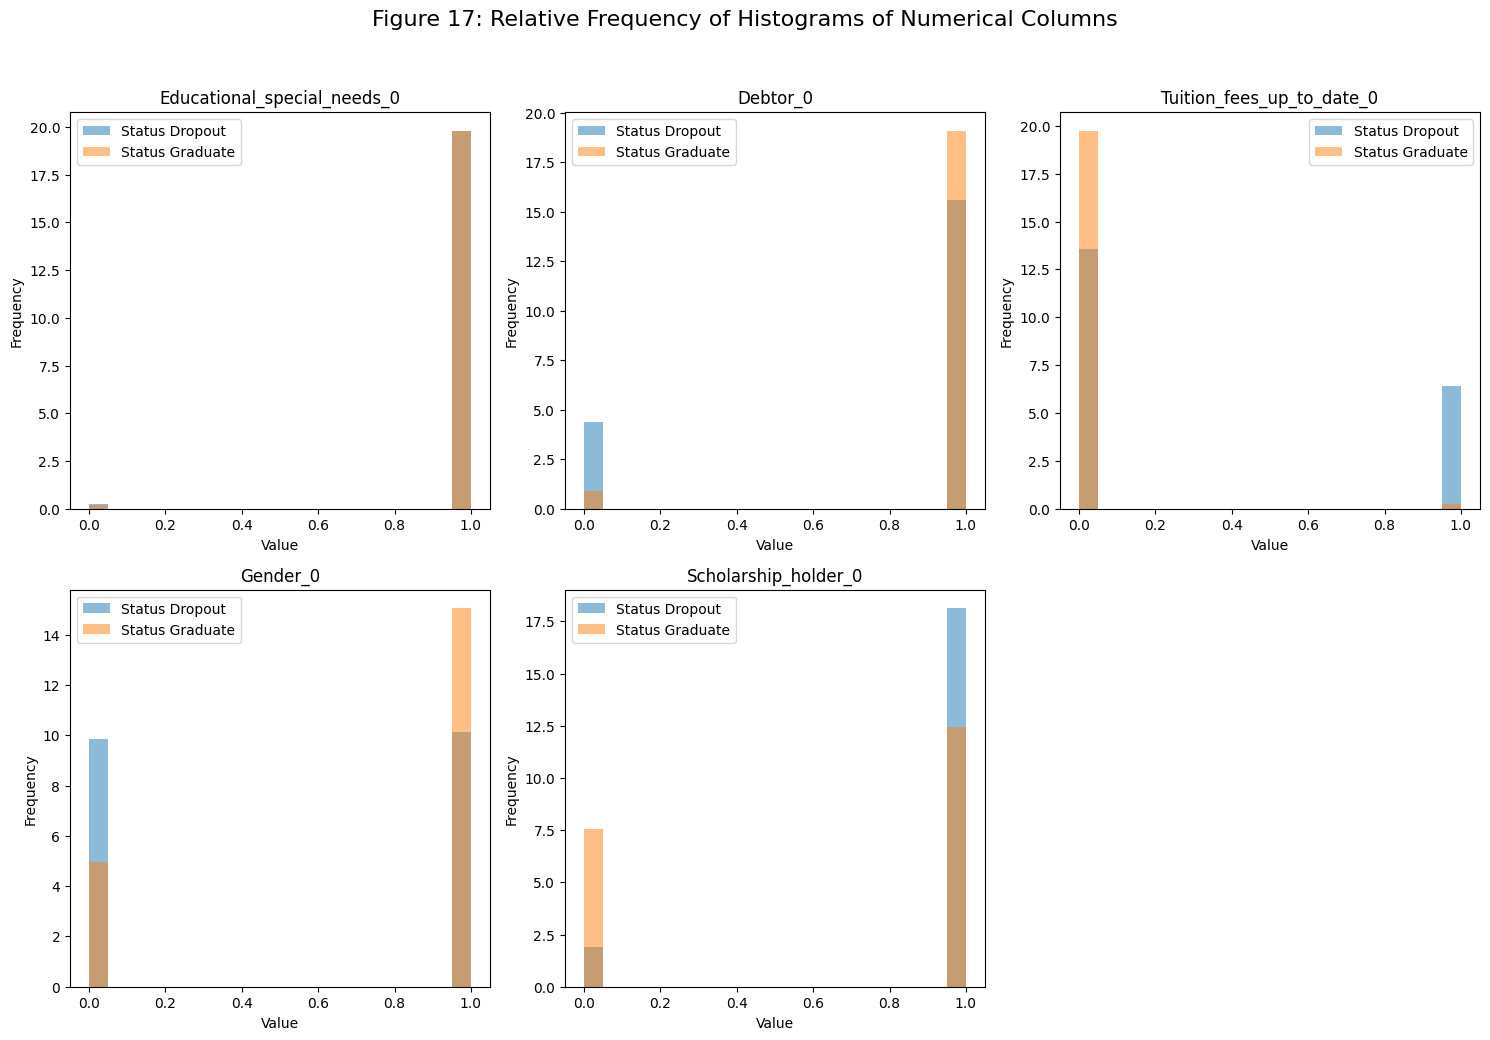

In [31]:
# Create a dummy dataframe
df_dummy = pd.concat([X, df['Status']], axis=1)

# Loop through each chunk and create a figure
for i, chunk in enumerate(chunks):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    fig.suptitle(f'Figure {i + 1}: Relative Frequency of Histograms of Numerical Columns', fontsize=16)
    
    # Flatten axes for easier iteration
    axes = axes.flatten()
    
    for j, column in enumerate(chunk):
        ax = axes[j]
        for status_value in df_dummy['Status'].cat.categories:
            subset = df_dummy[df_dummy['Status'] == status_value]
            ax.hist(subset[column], bins=20, alpha=0.5, label=f'Status {status_value}', density=True)
        
        ax.set_title(column)
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
        ax.legend()
    
    # Hide unused subplots
    for k in range(len(chunk), len(axes)):
        fig.delaxes(axes[k])
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()

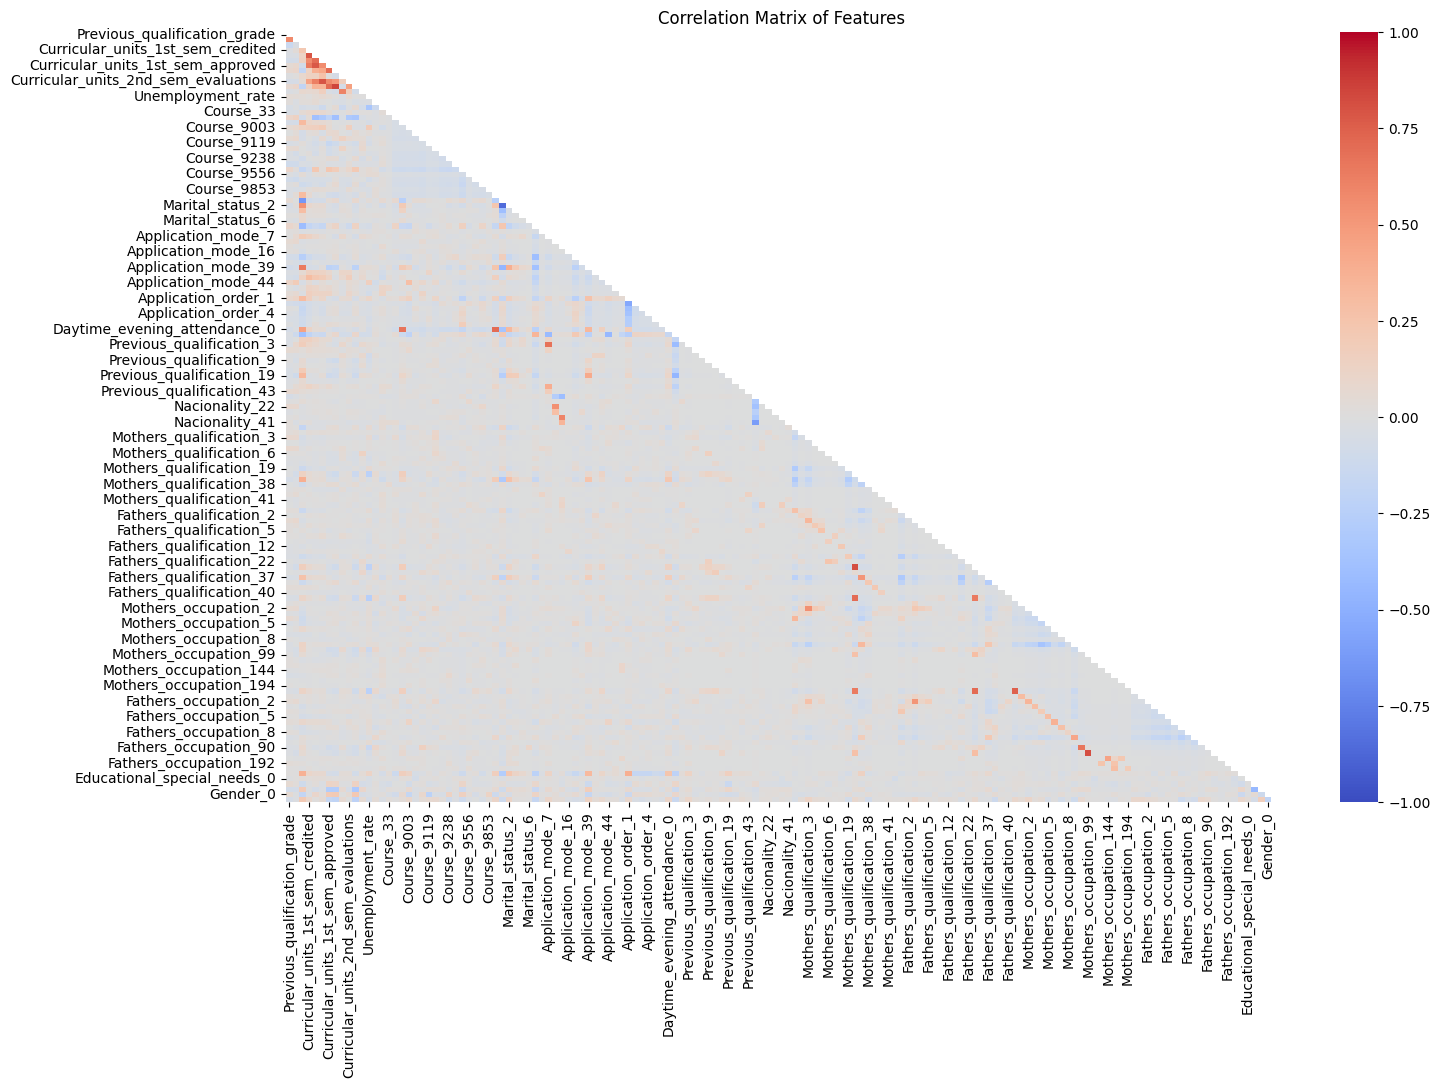

In [32]:
# Create a heatmap correlation matrix
correlation_matrix = X.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

## Modeling

In [33]:
# Visualize percentage of each class
y.value_counts() / y.count() * 100 

Status
Graduate    60.853994
Dropout     39.146006
Name: count, dtype: float64

In [34]:
y.cat.codes.value_counts() / y.count() * 100

1    60.853994
0    39.146006
Name: count, dtype: float64

In [35]:
# Change labels to 0 and 1
y = y.cat.codes
y = y.astype('int')

In [36]:
# Scale the data using RobustScaler
scaler = RobustScaler()

numeric_columns = X.columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

In [37]:
# Split the data into training and test sets
def split_data(X: pd.DataFrame, y: pd.Series) -> pd.DataFrame:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
    print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
    print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(X, y)

Training set shape: X_train=(2904, 149), y_train=(2904,)
Test set shape: X_test=(726, 149), y_test=(726,)


In [38]:
# Create models
def create_models(X_train, y_train):
    xgbs = XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        eta=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        seed=42
    )
    xgbs.fit(X_train, y_train)
    print('Creating XGBoost model done')
    return xgbs

print(f'{"-"*40}\nCreating models\n{"-"*40}')
xgbs = create_models(X_train, y_train)
models = {
    'XGBoost': xgbs,
}
print('done')

----------------------------------------
Creating models
----------------------------------------
Creating XGBoost model done
done


## Evaluation

In [39]:
# Evaluate the models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    cm = confusion_matrix(y_test, y_test_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1-Score': f1_score(y_test, y_test_pred),
        'MSE_train': mean_squared_error(y_train, y_train_pred),
        'MSE_test': mean_squared_error(y_test, y_test_pred)
    }
    
    return results

evaluations = {}
rows = []

print(f'{"-"*40}\nEvaluating models\n{"-"*40}')
for name, model in models.items():
    results = evaluate_model(model, X_train, y_train, X_test, y_test)
    evaluations[name] = results
    rows.append({
        'Model': name,
        'Accuracy': results['Accuracy'],
        'Precision': results['Precision'],
        'Recall': results['Recall'],
        'F1-Score': results['F1-Score'],
        'MSE_train': results['MSE_train'],
        'MSE_test': results['MSE_train']
    })
    print(f"Evaluating {name} model done")

# Convert the dictionary into a dataframe
summary_df = pd.DataFrame(rows)

----------------------------------------
Evaluating models
----------------------------------------
Evaluating XGBoost model done


----------------------------------------
Displaying confusion matrix with XGBoost model
----------------------------------------


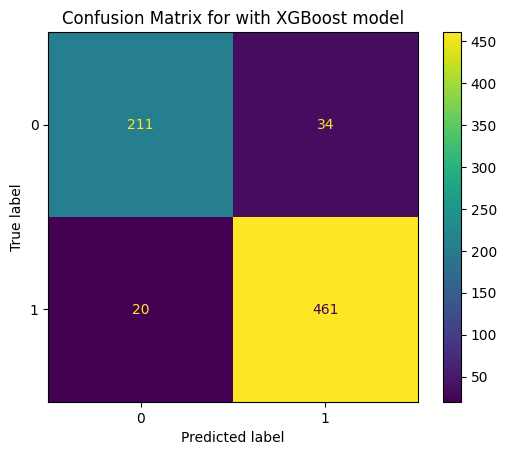

In [40]:
# Display confusion matrix
for name, model in models.items():
    print(f'{"-"*40}\nDisplaying confusion matrix with {name} model\n{"-"*40}')
    fig, ax = plt.subplots()
    cm = evaluations[name]['Confusion Matrix']
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax)
    ax.grid(False)

    ax.set_title(f'Confusion Matrix for with {name} model')
    plt.show()

In [41]:
# Display the performance matrix
summary_df

Model  Accuracy  Precision   Recall  F1-Score  MSE_train  MSE_test
0  XGBoost   0.92562   0.931313  0.95842  0.944672   0.026515  0.026515

--------------------------------------------------------------------------------
Learning curve with XGBoost model
--------------------------------------------------------------------------------


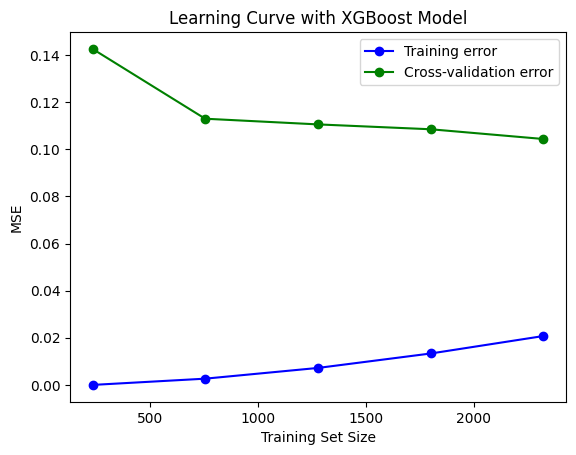

In [42]:
# Display learning curve graph
def show_learning_curve(name, model, X_train, y_train):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    train_mean = -np.mean(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training error")
    plt.plot(train_sizes, test_mean, 'o-', color="green", label="Cross-validation error")
    plt.title(f"Learning Curve with {name} Model")
    plt.xlabel("Training Set Size")
    plt.ylabel("MSE")
    plt.legend()
    plt.show()

for name, model in models.items():
    print(f'{"-"*80}\nLearning curve with {name} model\n{"-"*80}')
    results = show_learning_curve(name, model, X_train, y_train)

## Exporting Model and Data

In [43]:
# Export the model with 

joblib.dump(models['XGBoost'], './xgb_model.pkl')
joblib.dump(scaler, './scaler.pkl')

['./scaler.pkl']

In [44]:
# Save the columns
with open('columns.txt', 'w') as f:
    for column in X_train.columns:
        f.write(f"{column}\n")

In [45]:
# Create a copy of the data
df2 = data['data'].copy()

# Filter 'Enrolled' status
df2 = df2[df2['Status'] == 'Enrolled']

# Separate the 'Status' column from the rest of the DataFrame
X_predict = df2.drop(columns=['Status'])

In [46]:
# Create a text_columns list
text_columns = list(X_predict.select_dtypes(include=['object']).columns)

# Add label encoded columns to text_columns
label_encoded_columns =[    
    'Course', 'Marital_status', 'Application_mode', 'Application_order',
    'Daytime_evening_attendance', 'Previous_qualification', 'Nacionality',
    'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation',
    'Fathers_occupation', 'Displaced', 'Educational_special_needs', 'Debtor',
    'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International'
]

text_columns.extend(label_encoded_columns)

for col in text_columns:
    # Perform one-hot encoding on 'text' columns
    dummies = pd.get_dummies(X_predict[col].astype('object'), prefix=col).astype(int)

    # Concatenate the dummy variables to the original DataFrame
    X_predict = pd.concat([X_predict, dummies], axis=1)

    # Drop the original column
    X_predict.drop(col, axis=1, inplace=True)

# Preview the updated DataFrame
X_predict.head()

Previous_qualification_grade  Admission_grade  Age_at_enrollment  \
16                         137.0            137.4                 18   
19                         140.0            124.6                 18   
21                         127.0            121.8                 20   
25                         151.0            157.0                 18   
27                         138.0            131.0                 18   

    Curricular_units_1st_sem_credited  Curricular_units_1st_sem_enrolled  \
16                                  0                                  6   
19                                  0                                  7   
21                                  0                                  7   
25                                  0                                  6   
27                                  0                                  5   

    Curricular_units_1st_sem_evaluations  Curricular_units_1st_sem_approved  \
16                                    10                                  1   
19                                     7                                  6   
21                                    14                                  7   
25                                     8                                  5   
27                                     9                                  5   

    Curricular_units_1st_sem_grade  \
16                       12.000000   
19                       11.666667   
21                       11.437500   
25                       11.600000   
27                       12.666667   

    Curricular_units_1st_sem_without_evaluations  \
16                                             0   
19                                             0   
21                                             0   
25                                             0   
27                                             2   

    Curricular_units_2nd_sem_credited  ...  Debtor_0  Debtor_1  \
16                                  0  ...         1         0   
19                                  0  ...         1         0   
21                                  0  ...         1         0   
25                                  0  ...         0         1   
27                                  0  ...         1         0   

    Tuition_fees_up_to_date_0  Tuition_fees_up_to_date_1  Gender_0  Gender_1  \
16                          0                          1         1         0   
19                          0                          1         1         0   
21                          0                          1         1         0   
25                          0                          1         1         0   
27                          0                          1         1         0   

    Scholarship_holder_0  Scholarship_holder_1  International_0  \
16                     1                     0                1   
19                     1                     0                1   
21                     1                     0                1   
25                     0                     1                1   
27                     1                     0                1   

    International_1  
16                0  
19                0  
21                0  
25                0  
27                0  

[5 rows x 186 columns]

In [47]:
# Get the columns
with open('columns.txt', 'r') as f:
    columns = f.read().splitlines()

for col in columns:
    if col not in X_predict.columns:
        print(f"Column {col} not found in X_predict")
        # Add the column with default value 0
        X_predict[col] = 0
        
X_predict = X_predict[columns]

Column Application_mode_10 not found in X_predict
Column Previous_qualification_9 not found in X_predict
Column Previous_qualification_10 not found in X_predict
Column Previous_qualification_43 not found in X_predict
Column Nacionality_24 not found in X_predict
Column Mothers_qualification_6 not found in X_predict
Column Mothers_qualification_9 not found in X_predict
Column Mothers_qualification_41 not found in X_predict
Column Mothers_qualification_42 not found in X_predict
Column Fathers_qualification_9 not found in X_predict
Column Fathers_qualification_11 not found in X_predict
Column Fathers_qualification_14 not found in X_predict
Column Fathers_qualification_22 not found in X_predict
Column Fathers_qualification_36 not found in X_predict
Column Fathers_qualification_40 not found in X_predict
Column Mothers_occupation_90 not found in X_predict
Column Mothers_occupation_193 not found in X_predict
Column Fathers_occupation_90 not found in X_predict


In [48]:
# Apply scaling
scaler = joblib.load('./scaler.pkl')
X_predict= scaler.transform(X_predict)

In [49]:
# Predict unknown attrition
selected_model = joblib.load('./xgb_model.pkl')
y_predict = selected_model.predict(X_predict)
df2['Status'] = y_predict

In [50]:
df2['Status'].value_counts() / df2['Status'].count() * 100

Status
1    54.534005
0    45.465995
Name: count, dtype: float64

In [51]:
# Change labels to 'Dropout' and 'Graduate'
df2['Status'] = df2['Status'].replace({0: 'Dropout', 1: 'Graduate'})

# Save the predictions
df2.to_csv('predictions.csv', index=False)

{'Previous_qualification_grade': 241.0, 'Admission_grade': 213.0, 'Age_at_enrollment': 145.0, 'Curricular_units_1st_sem_credited': 47.0, 'Curricular_units_1st_sem_enrolled': 89.0, 'Curricular_units_1st_sem_evaluations': 87.0, 'Curricular_units_1st_sem_approved': 174.0, 'Curricular_units_1st_sem_grade': 207.0, 'Curricular_units_1st_sem_without_evaluations': 15.0, 'Curricular_units_2nd_sem_evaluations': 140.0, 'Curricular_units_2nd_sem_grade': 270.0, 'Curricular_units_2nd_sem_without_evaluations': 8.0, 'Unemployment_rate': 115.0, 'Inflation_rate': 88.0, 'GDP': 119.0, 'Course_171': 5.0, 'Course_8014': 17.0, 'Course_9003': 8.0, 'Course_9070': 9.0, 'Course_9085': 17.0, 'Course_9119': 12.0, 'Course_9130': 21.0, 'Course_9147': 13.0, 'Course_9238': 41.0, 'Course_9254': 7.0, 'Course_9500': 7.0, 'Course_9556': 2.0, 'Course_9670': 11.0, 'Course_9773': 9.0, 'Course_9853': 32.0, 'Course_9991': 3.0, 'Marital_status_1': 4.0, 'Marital_status_2': 3.0, 'Marital_status_4': 3.0, 'Application_mode_1': 37.0

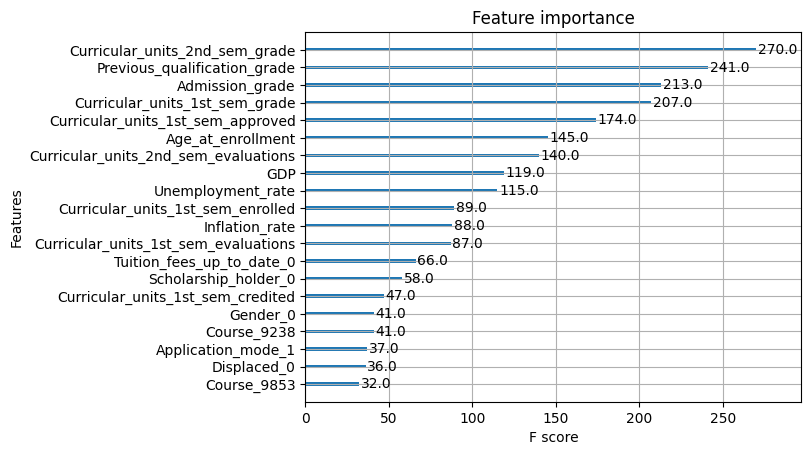

In [ ]:
# Get feature importance
importance = selected_model.feature_importances_

importance_dict = model.get_booster().get_score(importance_type='weight')
print(importance_dict)

# Plot feature importance
xgb.plot_importance(selected_model, max_num_features=20)
plt.show()

In [56]:
importance_df = pd.DataFrame(importance_dict.items(), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Save the feature importance to a CSV file
importance_df.to_csv('feature_importance.csv', index=False)